In [2]:
# Importing necessary libraries
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('imputed-data.csv')

# Display the first few rows of the DataFrame to check if it's loaded correctly
df.head()


date  county_fips     county_name  state_fips state_name  \
0  01/22/20         1003  Baldwin County           1    Alabama   
1  01/23/20         1003  Baldwin County           1    Alabama   
2  01/24/20         1003  Baldwin County           1    Alabama   
3  01/25/20         1003  Baldwin County           1    Alabama   
4  01/26/20         1003  Baldwin County           1    Alabama   

   covid_19_confirmed_cases  covid_19_deaths social_distancing_total_grade  \
0                       0.0              0.0                             F   
1                       0.0              0.0                             F   
2                       0.0              0.0                             F   
3                       0.0              0.0                             F   
4                       0.0              0.0                             F   

  social_distancing_encounters_grade social_distancing_travel_distance_grade  \
0                                  F                                       F   
1                                  F                                       F   
2                                  F                                       F   
3                                  F                                       F   
4                                  F                                       F   

   ...  age_45_49  age_50_54  age_55_59  age_60_64  age_65_69  age_70_74  \
0  ...          7          7          7          7          6          4   
1  ...          7          7          7          7          6          4   
2  ...          7          7          7          7          6          4   
3  ...          7          7          7          7          6          4   
4  ...          7          7          7          7          6          4   

   age_75_79  age_80_84  age_85_or_higher  immigrant_student_ratio  
0          3          2                 2                 0.021048  
1          3          2                 2                 0.021048  
2          3          2                 2                 0.021048  
3          3          2                 2                 0.021048  
4          3          2                 2                 0.021048  

[5 rows x 58 columns]

In [3]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562128 entries, 0 to 562127
Data columns (total 58 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     562128 non-null  object 
 1   county_fips                              562128 non-null  int64  
 2   county_name                              562128 non-null  object 
 3   state_fips                               562128 non-null  int64  
 4   state_name                               562128 non-null  object 
 5   covid_19_confirmed_cases                 562128 non-null  float64
 6   covid_19_deaths                          562128 non-null  float64
 7   social_distancing_total_grade            562128 non-null  object 
 8   social_distancing_encounters_grade       562128 non-null  object 
 9   social_distancing_travel_distance_grade  562128 non-null  object 
 10  daily_state_test                

In [4]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\sugan\AppData\Local\Temp\ipykernel_32140\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [5]:
death_counts = df['covid_19_deaths'].value_counts()
print(death_counts)

covid_19_deaths
0.0      516912
1.0       24446
2.0        7606
3.0        3825
4.0        2101
          ...  
232.0         1
222.0         1
102.0         1
172.0         1
464.0         1
Name: count, Length: 148, dtype: int64


In [6]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'F': 5}


df['social_distancing_encounters_grade'] = df['social_distancing_encounters_grade'].map(mapping)
df['social_distancing_travel_distance_grade'] = df['social_distancing_travel_distance_grade'].map(mapping)

In [7]:
mapping_social = {'A': 1, 'A-': 2, 'B': 3, 'B-': 4, 'B+': 5, 'C': 6, 'C-': 7, 'C+': 8, 'D': 9, 'D-': 10, 'D+': 11, 'F': 12}


df['social_distancing_total_grade'] = df['social_distancing_total_grade'].map(mapping_social)

In [8]:
df.dtypes

date                                       datetime64[ns]
county_fips                                         int64
county_name                                        object
state_fips                                          int64
state_name                                         object
covid_19_confirmed_cases                          float64
covid_19_deaths                                   float64
social_distancing_total_grade                       int64
social_distancing_encounters_grade                  int64
social_distancing_travel_distance_grade             int64
daily_state_test                                  float64
precipitation                                     float64
temperature                                       float64
virus_pressure                                    float64
total_population                                    int64
female_percent                                    float64
area                                              float64
population_den

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# List of columns to remove
columns_to_remove = [
    'age_0_4', 'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24',
    'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44', 'age_45_49',
    'age_50_54', 'age_55_59', 'age_60_64', 'age_65_69', 'age_70_74',
    'age_75_79', 'age_80_84', 'age_85_or_higher', 'county_name', 'covid_19_deaths' , 'state_name'
]

# Drop the specified columns
X = df.drop(columns=columns_to_remove)
y = df['covid_19_deaths']

In [11]:
X['date'] = (pd.to_datetime(X['date']) - pd.to_datetime('2020-01-20')).dt.days

In [12]:
X.tail()

date  county_fips  state_fips  covid_19_confirmed_cases  \
562123   236        56039          56                       3.0   
562124   237        56039          56                       5.0   
562125   238        56039          56                       6.0   
562126   239        56039          56                       2.0   
562127   240        56039          56                       3.0   

        social_distancing_total_grade  social_distancing_encounters_grade  \
562123                              6                                   1   
562124                              6                                   1   
562125                              6                                   1   
562126                              6                                   1   
562127                              6                                   1   

        social_distancing_travel_distance_grade  daily_state_test  \
562123                                        5              33.0   
562124                                        5              49.0   
562125                                        5            2569.0   
562126                                        5             739.0   
562127                                        5             224.0   

        precipitation  temperature  ...  Religious_congregation_ratio  \
562123            0.0         13.4  ...                          26.0   
562124            0.0         15.8  ...                          26.0   
562125            0.0         17.0  ...                          26.0   
562126            0.0         11.8  ...                          26.0   
562127            0.0         13.2  ...                          26.0   

        political_party  airport_distance  passenger_load_ratio  meat_plants  \
562123                0        209.542743               0.00117            2   
562124                0        209.542743               0.00117            2   
562125                0        209.542743               0.00117            2   
562126                0        209.542743               0.00117            2   
562127                0        209.542743               0.00117            2   

        median_household_income  percent_insured  deaths_per_100000  \
562123                    99087        83.965483              342.3   
562124                    99087        83.965483              342.3   
562125                    99087        83.965483              342.3   
562126                    99087        83.965483              342.3   
562127                    99087        83.965483              342.3   

        gdp_per_capita  immigrant_student_ratio  
562123           93.95                      0.0  
562124           93.95                      0.0  
562125           93.95                      0.0  
562126           93.95                      0.0  
562127           93.95                      0.0  

[5 rows x 37 columns]

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 8.88955708494782
R-squared: 0.26046871010144945


In [15]:
from sklearn.linear_model import Ridge

# Create the Ridge Regression model with regularization parameter alpha
ridge_model = Ridge(alpha=30)  # You can adjust alpha
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error (Ridge):", mse)
print("R-squared (Ridge):", r_squared)


Mean Squared Error (Ridge): 8.89024835337128
R-squared (Ridge): 0.2604112027786456


## Unsuperivesd Learning

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_features = ['covid_19_confirmed_cases', 'covid_19_deaths', 'population_density', 'hospital_beds_ratio']
X_USL = df[selected_features]

# Step 3: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_USL)

# Step 4: K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(X_scaled)

# Step 5: Analyzing Clusters
df['cluster'] = clusters

# Check the characteristics of each cluster
cluster_summary = df.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         covid_19_confirmed_cases  covid_19_deaths  population_density  \
cluster                                                                  
0                        8.281375         0.213129          220.429713   
1                     1070.862286        40.311431         3852.728141   
2                      136.369748        11.882353        71340.385460   

         hospital_beds_ratio  
cluster                       
0                   0.002521  
1                   0.002169  
2                   0.005353  


Overall Interpretation:
Cluster 0: Low COVID-19 impact areas with moderate population density and limited hospital bed capacity.
Cluster 1: High COVID-19 impact areas with high population density and limited hospital bed capacity.
Cluster 2: Moderate COVID-19 impact areas with extremely high population density but relatively better hospital bed capacity.

  These interpretations are based on the average characteristics of each cluster. Actual interpretations might vary based on the context of the dataset and the specific regions or areas represented by each cluster. Further analysis and domain expertise are typically needed to fully understand the implications of the clustering results for outbreak detection and other purposes.



Cluster with Highest COVID-19 Cases and Deaths:
   cluster  covid_19_confirmed_cases  covid_19_deaths  population_density  \
0        1               1070.862286        40.311431         3852.728141   

   hospital_beds_ratio  total_cases_deaths  
0             0.002169         1111.173717  


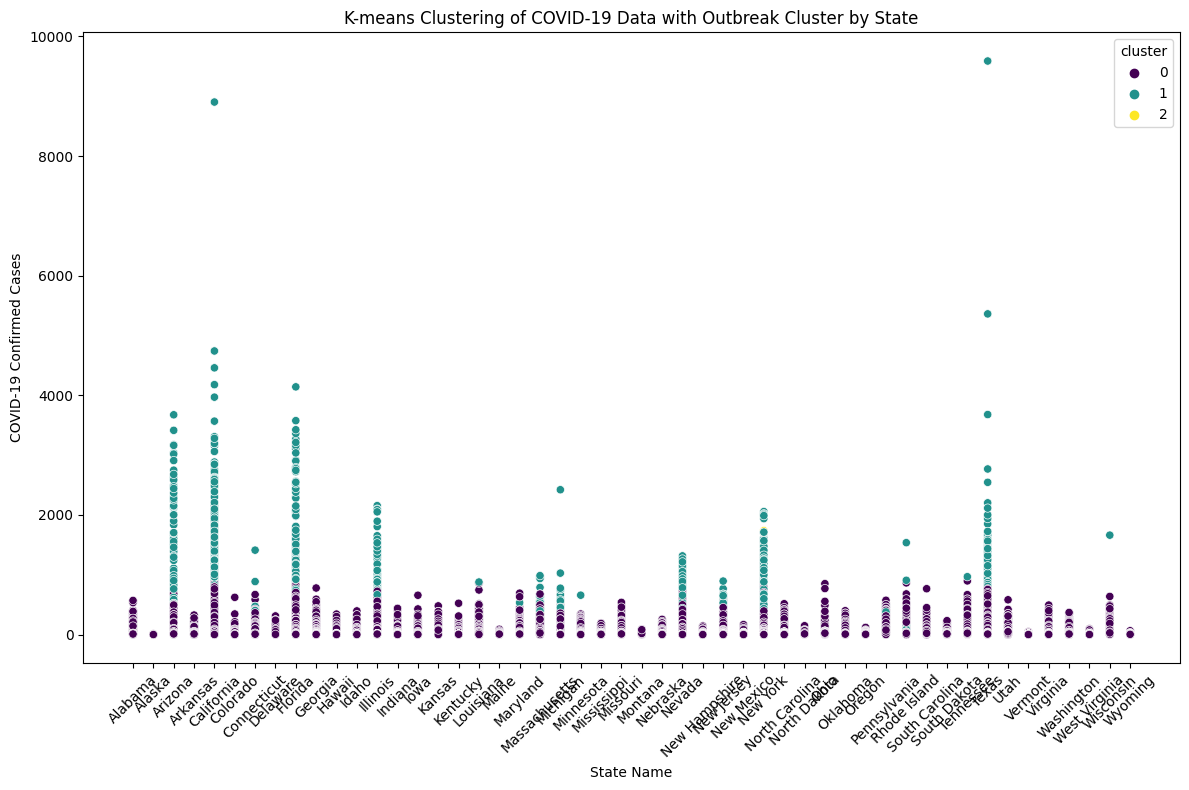

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 6: Identifying Clusters with High COVID-19 Cases or Deaths
# Find the cluster with the highest COVID-19 cases and deaths
cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary['covid_19_deaths']
outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
outbreak_cluster = outbreak_cluster.reset_index()

# Print the cluster with highest cases and deaths
print("\nCluster with Highest COVID-19 Cases and Deaths:")
print(outbreak_cluster)

# Step 7: Visualize Clusters Based on 'state_name'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='state_name', y='covid_19_confirmed_cases', hue='cluster', data=df, palette='viridis', legend='full')

# Adding labels and title
plt.title('K-means Clustering of COVID-19 Data with Outbreak Cluster by State')
plt.xlabel('State Name')
plt.ylabel('COVID-19 Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


# Isolation Forest

In [20]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Selected Features for Isolation Forest
selected_features = [
    'covid_19_confirmed_cases', 'covid_19_deaths', 'hospital_beds_ratio',
    'icu_beds_ratio', 'ventilator_capacity_ratio', 'daily_state_test',
    'social_distancing_total_grade', 'percent_smokers', 'percent_diabetes',
    'percent_insured', 'political_party', 'passenger_load_ratio', 'meat_plants'
]

# Create the dataset with selected features
X_iforest = df[selected_features]

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model and predict outliers
df['is_outlier'] = isolation_forest.fit_predict(X_iforest)

# Filter out the outliers
outliers = df[df['is_outlier'] == -1]

# Display the outliers
print("Outlier Examples:")
print(outliers)

# Selected Features After Isolation Forest (excluding outliers)
selected_features_iforest = [feat for feat in selected_features if feat != 'is_outlier']

print("\nSelected Features After Isolation Forest:")
print(selected_features_iforest)


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Examples:
             date  county_fips       county_name  state_fips  state_name  \
7360   2020-07-30         1073  Jefferson County           1     Alabama   
7390   2020-08-29         1073  Jefferson County           1     Alabama   
14652  2020-04-04         4013   Maricopa County           4     Arizona   
14670  2020-04-22         4013   Maricopa County           4     Arizona   
14671  2020-04-23         4013   Maricopa County           4     Arizona   
...           ...          ...               ...         ...         ...   
527460 2020-09-04        53033       King County          53  Washington   
527465 2020-09-09        53033       King County          53  Washington   
550067 2020-05-29        55079  Milwaukee County          55   Wisconsin   
550122 2020-07-23        55079  Milwaukee County          55   Wisconsin   
550176 2020-09-15        55079  Milwaukee County          55   Wisconsin   

        covid_19_confirmed_cases  covid_19_deaths  \
7360            

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create the dataset with selected features
X_selected = df[selected_features_iforest]

# Step 3: Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 4: K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

# Step 5: Analyzing Clusters
df['cluster'] = clusters

# Check the characteristics of each cluster
cluster_summary = df.groupby('cluster')[selected_features_iforest].mean()
print("Cluster Summary:")
print(cluster_summary)

# Step 6: Identifying Clusters with High COVID-19 Cases or Deaths
# Find the cluster with the highest COVID-19 cases and deaths
cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary['covid_19_deaths']
outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
outbreak_cluster = outbreak_cluster.reset_index()

# Print the cluster with highest cases and deaths
print("\nCluster with Highest COVID-19 Cases and Deaths:")
print(outbreak_cluster)

# Step 7: Visualize Clusters on a Map (using latitude and longitude)
# Plotting the clusters on a map
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df, palette='viridis', legend='full')

# Plot the outbreak cluster from the original DataFrame
outbreak_cluster_indices = df[df['cluster'] == outbreak_cluster.index[0]].index
outbreak_cluster_data = df.loc[outbreak_cluster_indices]
plt.scatter(outbreak_cluster_data['longitude'], outbreak_cluster_data['latitude'], color='red', marker='*', s=200, label='Outbreak Cluster')

# Adding labels and title
plt.title('K-means Clustering of COVID-19 Data with Outbreak Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


## Interpretation:
Cluster 1 appears to be the most affected by COVID-19, with higher cases and deaths.
Factors such as healthcare resources, testing rates, social distancing measures, health behaviors, insurance coverage, and political affiliation may play roles in the outbreak severity.
## Recommendations:
Allocate more resources (hospital beds, ICU beds, ventilators) to Cluster 1.
Increase testing and public health interventions in Cluster 1.
Monitor social distancing compliance and consider targeted measures.
Explore reasons behind higher meat plant presence in Cluster 1.
This detailed overview of the cluster summary and the cluster with the highest cases and deaths provides valuable insights for understanding the COVID-19 outbreak patterns, assessing healthcare system impacts, and guiding targeted interventions and resource allocation. You can present these findings along with visualizations for a comprehensive analysis.

## Cluster for each day

In [23]:
for date in df['date'].unique():
    # Filter the data for the current date
    df_date = df[df['date'] == date]
    
    # Create the dataset with selected features
    X_selected = df_date[selected_features_iforest]

    # Scaling the Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # K-means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Analyzing Clusters
    df_date['cluster'] = clusters
    cluster_summary = df_date.groupby('cluster')[selected_features_iforest].mean()

    # Identifying Clusters with High COVID-19 Cases or Deaths
    cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary['covid_19_deaths']
    outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
    outbreak_cluster = outbreak_cluster.reset_index()

    # Print or store the cluster summary for the current date
    print(f"Cluster Summary for Date {date}:")
    print(cluster_summary)
    
    # Additional visualization or analysis for each date can be done here


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0              0.00190   
1                        0.000883              0.0              0.00192   
2                        0.000000              0.0              0.00821   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227               0.0   
1              0.000224                   0.000222               0.0   
2              0.001041                   0.001113               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.887745        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.001032                   0.001103          0.022772   
2              0.000229                   0.000229          0.001284   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0             0.001900   
1                        0.000882              0.0             0.001922   
2                        0.000000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227               0.0   
1              0.000225                   0.000223               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.891795        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001843   
1                             0.0              0.0             0.007750   
2                             1.0              0.0             0.001760   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000216               0.0   
1              0.000977                   0.001041               0.0   
2              0.000260                   0.000264               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        17.224666        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000913              0.0             0.001864   
1                        0.000000              0.0             0.001947   
2                        0.000000              0.0             0.008131   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.000229                   0.000229          0.001284   
2              0.001032                   0.001103          0.022772   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000913              0.0             0.001864   
1                        0.000000              0.0             0.001947   
2                        0.000000              0.0             0.008131   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.000229                   0.000229          0.001284   
2              0.001032                   0.001103          0.022772   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-01-31 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0             0.001900   
1                        0.000882              0.0             0.001922   
2                        0.000000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227               0.0   
1              0.000225                   0.000223               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.891795        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0             0.001904   
1                        0.000000              0.0             0.001923   
2                        0.004425              0.0             0.008234   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227               0.0   
1              0.000225                   0.000223               0.0   
2              0.001044                   0.001117               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.889634        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.001826              0.0             0.001864   
1                        0.000000              0.0             0.001947   
2                        0.000000              0.0             0.008131   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.459434   
1              0.000229                   0.000229          0.003852   
2              0.001032                   0.001103          0.068317   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.306290   
1              0.001032                   0.001103          0.045545   
2              0.000229                   0.000229          0.002568   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0         0.000913             0.001864   
1                             0.0         0.000000             0.001947   
2                             0.0         0.000000             0.008131   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.000229                   0.000229          0.001284   
2              0.001032                   0.001103          0.022772   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.001032                   0.001103          0.022772   
2              0.000229                   0.000229          0.001284   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.001032                   0.001103          0.022772   
2              0.000229                   0.000229          0.001284   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000877              0.0             0.001928   
1                        0.000000              0.0             0.001893   
2                        0.000000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224               0.0   
1              0.000226                   0.000226               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.754451        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.001032                   0.001103          0.022772   
2              0.000229                   0.000229          0.001284   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000877              0.0             0.001928   
1                        0.000000              0.0             0.001893   
2                        0.000000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224               0.0   
1              0.000226                   0.000226               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.754451        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0         0.000877             0.001928   
1                             0.0         0.000000             0.001893   
2                             0.0         0.000000             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224               0.0   
1              0.000226                   0.000226               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.754451        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000877              0.0             0.001928   
1                        0.000000              0.0             0.001893   
2                        0.000000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224               0.0   
1              0.000226                   0.000226               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.754451        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001864   
1                             0.0              0.0             0.008131   
2                             0.0              0.0             0.001947   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.153145   
1              0.001032                   0.001103          0.022772   
2              0.000229                   0.000229          0.001284   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.771271        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                         0.00000              0.0             0.001902   
1                         0.00265              0.0             0.001921   
2                         0.00000              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227               0.0   
1              0.000224                   0.000223               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.878077        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001922   
1                             0.0              0.0             0.001900   
2                             0.0              0.0             0.008223   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223               0.0   
1              0.000227                   0.000227               0.0   
2              0.001042                   0.001115               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.760252        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0             0.001886   
1                        0.000000              0.0             0.007862   
2                        0.000916              0.0             0.001881   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000224                   0.000223          0.002388   
1              0.000999                   0.001067          0.020596   
2              0.000219                   0.000217          0.312317   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.978196        18.815385        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001879   
1                             0.0              0.0             0.001883   
2                             0.0              0.0             0.007974   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218               0.0   
1              0.000225                   0.000225               0.0   
2              0.001003                   0.001071               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.118386        15.790853        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.001797              0.0             0.001873   
1                        0.000000              0.0             0.001885   
2                        0.000000              0.0             0.007922   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217               0.0   
1              0.000225                   0.000225               0.0   
2              0.001000                   0.001068               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.065588        15.785423        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                         0.00089              0.0             0.001887   
1                         0.00000              0.0             0.001875   
2                         0.00000              0.0             0.007974   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219               0.0   
1              0.000224                   0.000224               0.0   
2              0.001003                   0.001071               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.108541        15.775475        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.001825              0.0             0.001887   
1                        0.000000              0.0             0.001871   
2                        0.000000              0.0             0.007890   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          0.304565   
1              0.000224                   0.000223          0.002398   
2              0.000997                   0.001064          0.020596   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.177920        15.719201        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-02-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.002976              0.0             0.001748   
1                        5.000000              1.0             0.001823   
2                        0.000000              0.0             0.007175   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205          3.213141   
1              0.000291                   0.000300         42.000000   
2              0.000890                   0.000944          2.571090   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.122024        17.233346        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.004517              0.0             0.001878   
1                        0.000000              0.0             0.001881   
2                        0.004032              0.0             0.007967   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218          3.807551   
1              0.000225                   0.000224          2.196932   
2              0.001002                   0.001070          1.861214   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.963866        15.733242        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.012397         0.000826             0.001702   
1                        0.001753         0.000000             0.003390   
2                        5.000000         4.000000             0.001823   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000202                   0.000200          8.539431   
1              0.000413                   0.000428          1.568155   
2              0.000291                   0.000300        188.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.056198        15.860917        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.007634              0.0             0.001758   
1                        0.002560              0.0             0.003290   
2                        7.000000              1.0             0.001823   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203         11.676686   
1              0.000404                   0.000419          1.907393   
2              0.000291                   0.000300        226.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.042409        15.862651        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000         0.000000             0.007164   
1                       10.000000         3.000000             0.001823   
2                        0.012444         0.000498             0.001731   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000881                   0.000934          2.268862   
1              0.000291                   0.000300        251.000000   
2              0.000207                   0.000204          5.605287   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.222222        16.911955        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.036832              0.0             0.002593   
1                        0.003953              0.0             0.002459   
2                       20.000000              1.0             0.001823   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000298                   0.000302         23.883654   
1              0.000310                   0.000318          1.250370   
2              0.000291                   0.000300        374.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.868324        16.214410        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.013903         0.000993             0.001748   
1                        0.014881         0.000000             0.007157   
2                        8.000000         1.500000             0.001645   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205         13.661813   
1              0.000888                   0.000943          5.127327   
2              0.000269                   0.000281        259.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.184211        17.227764        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.098189          0.00286             0.001832   
1                        0.022642          0.00000             0.007799   
2                        0.009634          0.00000             0.001870   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000214         25.081030   
1              0.000973                   0.001039          7.226415   
2              0.000223                   0.000222          3.985549   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.149666        15.780306        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.005693         0.000000             0.001898   
1                        0.031373         0.000000             0.007896   
2                        0.093960         0.002876             0.001836   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000226                   0.000226          1.989564   
1              0.000990                   0.001058          6.447059   
2              0.000216                   0.000213         27.393097   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.643264        18.654474        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.085378         0.000491             0.001775   
1                       25.000000         2.500000             0.001645   
2                        0.067308         0.000000             0.007401   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209         34.949460   
1              0.000269                   0.000281        647.500000   
2              0.000915                   0.000972         15.221154   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.942591        17.228827        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.075809              0.0             0.001820   
1                       24.666667              1.0             0.002295   
2                        0.107914              0.0             0.007745   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000215         46.705939   
1              0.000532                   0.000598        612.666667   
2              0.000954                   0.001017         24.291367   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.965717        17.232946        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.051793              0.0             0.001736   
1                       23.250000              1.5             0.001553   
2                        0.038235              0.0             0.007168   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205         70.888944   
1              0.000230                   0.000238       1284.500000   
2              0.000883                   0.000937         34.361765   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.086653        17.231743        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.039149              0.0             0.003284   
1                       25.666667              1.0             0.003190   
2                        0.201022              0.0             0.001756   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000403                   0.000417         21.982128   
1              0.000476                   0.000503       2540.333333   
2              0.000206                   0.000203        164.837308   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.280851        18.489201        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.199402         0.000997             0.001732   
1                        0.133333         0.000000             0.007110   
2                       58.000000         5.000000             0.001823   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204        205.501496   
1              0.000878                   0.000932         77.982609   
2              0.000291                   0.000300       4326.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.818046        17.212566        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.580803         0.004897             0.001875   
1                        0.072080         0.000912             0.001902   
2                        0.059574         0.000000             0.008214   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219        174.127326   
1              0.000231                   0.000230         23.740876   
2              0.001015                   0.001083         70.212766   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.329089        15.967058        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.444788         0.006192             0.001874   
1                        0.044974         0.000000             0.001879   
2                        0.116466         0.000000             0.007963   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000215        308.757482   
1              0.000227                   0.000227         43.218695   
2              0.000998                   0.001066         83.325301   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.692466        15.849471        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.685541         0.018200             0.001853   
1                        0.390438         0.000000             0.007908   
2                        0.068345         0.005396             0.001899   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000214                   0.000211        817.052578   
1              0.000997                   0.001066        145.235060   
2              0.000229                   0.000228         49.421763   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.733064        15.913117        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.408903         0.011387             0.001880   
1                        0.101133         0.000872             0.001910   
2                        0.301255         0.000000             0.008044   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219        719.860248   
1              0.000227                   0.000226        226.465562   
2              0.001016                   0.001085        275.138075   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.682195        15.743790        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.807811         0.024666             0.001863   
1                        0.299578         0.008439             0.008058   
2                        0.230298         0.002627             0.001933   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000214                   0.000211       1078.867420   
1              0.001023                   0.001093        300.084388   
2              0.000233                   0.000233        244.556918   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.366906        16.197401        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.159274         0.023185             0.001848   
1                        0.873518         0.035573             0.007894   
2                        0.307136         0.004517             0.001896   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000215                   0.000213       1133.502016   
1              0.000994                   0.001061        253.703557   
2              0.000227                   0.000226        178.967480   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.731855        15.545262        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.410546         0.001883             0.001896   
1                        1.208333         0.029167             0.008071   
2                        3.241905         0.026667             0.001884   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000223                   0.000221        587.853107   
1              0.001014                   0.001083        514.370833   
2              0.000225                   0.000224       1466.326667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.870998        19.220395        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.111413         0.032609             0.001883   
1                        0.380619         0.001998             0.001879   
2                        1.425101         0.048583             0.007974   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000220       1482.673007   
1              0.000223                   0.000223        884.133866   
2              0.001005                   0.001073        510.469636   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.518116        15.635321        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.538172         0.081998             0.001859   
1                        0.767531         0.010567             0.001896   
2                        1.528000         0.024000             0.007937   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217       2013.732328   
1              0.000225                   0.000224        647.463977   
2              0.000999                   0.001067        563.180000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.974552        15.673891        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.731022         0.010309             0.001880   
1                        1.682927         0.024390             0.008009   
2                        6.678537         0.126083             0.001880   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000224                   0.000223       1020.371134   
1              0.001005                   0.001074        977.113821   
2              0.000222                   0.000220       2020.322425   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.022493        18.857604        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.381262         0.143785             0.001861   
1                        1.363281         0.015625             0.001908   
2                        2.264000         0.044000             0.007880   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000214       3175.859926   
1              0.000227                   0.000227        896.243164   
2              0.001000                   0.001068       1169.456000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.924861        16.012263        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.117904         0.049976             0.001819   
1                      486.500000         7.416667             0.002588   
2                        4.530466         0.035842             0.007705   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000215                   0.000214       2737.945657   
1              0.000421                   0.000434      10639.416667   
2              0.000958                   0.001021       1748.060932   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.291606        17.243338        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.486695         0.085837             0.003170   
1                        1.256410         0.034188             0.001872   
2                      381.588235         8.882353             0.002730   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000384                   0.000396       2839.504721   
1              0.000223                   0.000223       1424.482051   
2              0.000462                   0.000485       9593.705882   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.574249        15.411312        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.336792         0.029245             0.001897   
1                        4.396761         0.068826             0.007963   
2                       12.577990         0.300478             0.001868   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000224                   0.000223       2276.234906   
1              0.001004                   0.001072       1430.425101   
2              0.000221                   0.000220       2759.461244   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.156604        19.025788        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.683440         0.023788             0.001900   
1                        3.016194         0.044534             0.007979   
2                       12.422925         0.147233             0.001860   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224       1054.585544   
1              0.001005                   0.001073        903.441296   
2              0.000220                   0.000218       2513.773715   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.095151        18.890649        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.334334         0.043043             0.001930   
1                        6.526316         0.250000             0.008212   
2                       12.248000         0.219556             0.001893   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000232                   0.000232       3694.074074   
1              0.001038                   0.001111       1913.600813   
2              0.000220                   0.000218       2655.248918   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.825826        18.972722        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-03-31 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.293551         0.159769             0.001841   
1                      786.142857        23.142857             0.002277   
2                       11.561798         0.314607             0.007821   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000218                   0.000216       2905.617902   
1              0.000344                   0.000338      10639.714286   
2              0.000978                   0.001043       1837.333333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.987488        17.230822        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.419382         0.099415             0.003114   
1                        8.056818         0.256993             0.001899   
2                      692.090909        31.181818             0.002698   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000385                   0.000398       2213.373434   
1              0.000219                   0.000218       2904.209790   
2              0.000401                   0.000405       9859.818182   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.663325        18.490442        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.577569         0.167490             0.001768   
1                        7.102564         0.182692             0.007397   
2                      672.375000        21.125000             0.002721   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000208       2798.820158   
1              0.000913                   0.000971       1541.086538   
2              0.000444                   0.000460       9582.375000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.865613        17.260318        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.594435         0.352445             0.003164   
1                     1103.375000        33.375000             0.002661   
2                        2.796200         0.070812             0.001861   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000384                   0.000396       3330.052277   
1              0.000415                   0.000421      14019.750000   
2              0.000222                   0.000222       2774.566494   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.129005        15.407976        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.420247         0.201481             0.001775   
1                      861.916667        45.583333             0.002598   
2                       12.790476         0.203175             0.007313   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000209                   0.000207       5907.787654   
1              0.000385                   0.000390      19874.083333   
2              0.000916                   0.000975       2247.533333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.359012        17.227540        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.399902         0.222332             0.001768   
1                      990.666667       162.000000             0.003268   
2                        5.145570         0.278481             0.007362   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000208       3131.062961   
1              0.000471                   0.000486      18659.000000   
2              0.000911                   0.000970       1772.408228   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.022135        17.216556        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.082137         0.317384             0.003113   
1                      866.250000        49.375000             0.002661   
2                        3.229358         0.133945             0.001839   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000370                   0.000381       2904.921850   
1              0.000415                   0.000421      11660.750000   
2              0.000228                   0.000229       5242.186239   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.496013        15.534895        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.723425         0.347763             0.001858   
1                      746.461538        52.461538             0.002619   
2                       12.511538         0.446154             0.007822   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217       3516.125541   
1              0.000405                   0.000407      12324.769231   
2              0.000988                   0.001057       1842.919231   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.638288        17.244446        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.929383         0.301235             0.001777   
1                        8.709265         0.421725             0.007332   
2                      786.571429        56.785714             0.002600   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000209                   0.000207       3735.822222   
1              0.000918                   0.000977       2195.715655   
2              0.000417                   0.000421      13055.428571   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.672593        17.236345        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.669198         0.600844             0.003132   
1                      956.444444        67.333333             0.002688   
2                        3.018998         0.142487             0.001894   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000379                   0.000390       4371.963713   
1              0.000409                   0.000415      18967.555556   
2              0.000227                   0.000228       3728.935233   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.414346        15.387769        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.499758         0.399516             0.001826   
1                        8.880000         0.440000             0.007735   
2                      839.416667        69.916667             0.002584   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000216                   0.000215       4089.199516   
1              0.000962                   0.001027       2507.738182   
2              0.000411                   0.000418      14706.916667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.260048        17.256622        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.998507         0.320896             0.001750   
1                      794.272727        53.090909             0.002631   
2                        8.009063         0.353474             0.007201   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000204       3354.702321   
1              0.000408                   0.000414      14122.545455   
2              0.000895                   0.000951       1875.435045   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.861692        17.248645        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.025853         0.009307             0.001927   
1                        6.495575         0.141593             0.008232   
2                       14.325280         0.299396             0.001903   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000233                   0.000233       4234.603865   
1              0.001041                   0.001114       1958.216814   
2              0.000220                   0.000219       2743.991372   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.708376        19.058727        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.396694         0.567331             0.001812   
1                      611.500000       117.857143             0.002520   
2                        5.818505         0.886121             0.007709   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000215                   0.000213       4023.116675   
1              0.000454                   0.000478      12422.571429   
2              0.000953                   0.001015       2805.103203   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.988819        17.247221        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.132988         0.163212             0.001821   
1                      681.812500        52.437500             0.002587   
2                        8.108659         0.753820             0.003209   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000218       2448.894646   
1              0.000449                   0.000471      13377.750000   
2              0.000387                   0.000399       3820.990662   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.054404        18.970516        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.701786         0.469643             0.001866   
1                        4.031405         0.169421             0.003128   
2                      577.227273        48.772727             0.002474   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000216                   0.000215       4934.016071   
1              0.000384                   0.000397       2707.655372   
2              0.000432                   0.000454      11304.409091   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.115179        15.736993        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.868408         0.369618             0.001839   
1                        8.133829         0.434944             0.007758   
2                      609.500000        37.062500             0.002585   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000215       4012.436381   
1              0.000971                   0.001037       2509.289963   
2              0.000425                   0.000440      12612.562500   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.723270        17.248176        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       16.394222         1.609506             0.001880   
1                        2.774715         0.061787             0.001955   
2                        7.330396         0.286344             0.008173   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217       4415.956711   
1              0.000232                   0.000232       3436.875334   
2              0.001042                   0.001115       1986.522029   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.463187        15.700231        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.182315         0.335320             0.001764   
1                      655.461538        48.307692             0.002432   
2                        7.030675         0.374233             0.007199   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205       3588.799305   
1              0.000380                   0.000399      10802.076923   
2              0.000903                   0.000961       2200.966258   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.821162        17.257556        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.985805         0.631424             0.001775   
1                        8.788079         0.933775             0.007573   
2                      678.000000        90.571429             0.002391   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000213                   0.000211       4342.655409   
1              0.000925                   0.000985       2709.178808   
2              0.000383                   0.000384      10305.571429   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.231522        17.237373        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.767677         0.367003             0.001857   
1                        8.099617         0.555556             0.007800   
2                      707.250000        57.000000             0.002671   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000218                   0.000216       8596.809043   
1              0.000986                   0.001053       2747.402299   
2              0.000443                   0.000462      27837.583333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.810486        17.236526        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.375113         0.121731             0.001917   
1                        8.043825         0.458167             0.007889   
2                       21.900202         1.208669             0.001839   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000229                   0.000229       3904.526281   
1              0.000997                   0.001065       2429.990490   
2              0.000214                   0.000211       6103.017950   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.534716        18.733918        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.345481         0.489796             0.001826   
1                        5.781022         0.295620             0.007749   
2                      673.450000        62.300000             0.002391   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000216                   0.000214       6652.848882   
1              0.000962                   0.001026       3861.766423   
2              0.000400                   0.000416      17040.350000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.996599        17.250854        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.173946         0.617625             0.003008   
1                        3.460271         0.106589             0.001904   
2                      639.933333        53.800000             0.002630   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000356                   0.000366       5474.117241   
1              0.000236                   0.000237       8951.030039   
2              0.000501                   0.000534      24509.866667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.881226        15.751469        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.386808         0.380293             0.003129   
1                        2.424079         0.054807             0.001848   
2                      617.727273        35.181818             0.002742   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000378                   0.000390       5275.530945   
1              0.000221                   0.000221       4720.607367   
2              0.000483                   0.000511      18698.363636   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.694625        15.557769        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.744573         0.240787             0.001713   
1                      386.176471        29.764706             0.002366   
2                        5.036723         0.302260             0.007051   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000200       5400.253407   
1              0.000403                   0.000421      13798.470588   
2              0.000869                   0.000924       3094.474576   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.692580        17.256253        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.545865         0.453634             0.001739   
1                        4.693215         0.374631             0.007128   
2                      361.500000        46.666667             0.002454   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203       5296.359398   
1              0.000884                   0.000940       3029.286136   
2              0.000419                   0.000436      12646.166667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.807519        17.257723        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       19.110572         1.933075             0.001868   
1                        2.837058         0.336127             0.001909   
2                        7.461538         0.821862             0.007908   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217       7664.310378   
1              0.000225                   0.000224       5045.027933   
2              0.001005                   0.001074       3424.850202   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.394762        15.474018        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-04-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       19.107004         1.506809             0.001836   
1                        8.131086         0.471910             0.007707   
2                        3.289499         0.157994             0.001877   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000214                   0.000211       7427.685798   
1              0.000970                   0.001036       3879.104869   
2              0.000225                   0.000224       6004.393567   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.000973        15.616053        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.341667         0.708333             0.008124   
1                       20.507092         1.088652             0.001874   
2                        3.948171         0.158537             0.001896   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.001014                   0.001083       4832.020833   
1              0.000219                   0.000217       7344.238475   
2              0.000230                   0.000230       8644.681911   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.566667        16.681796        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.068323         1.114463             0.001895   
1                        3.581560         0.131712             0.001896   
2                        7.147059         0.247899             0.008079   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218       7362.862467   
1              0.000229                   0.000228       7966.260385   
2              0.001018                   0.001088       4621.789916   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.993789        15.651711        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.623734         0.350217             0.001833   
1                     1155.333333        52.666667             0.001913   
2                        8.039855         0.315217             0.007696   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000215       5799.017366   
1              0.000324                   0.000345      25653.333333   
2              0.000965                   0.001030       3233.815217   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.821032        17.224536        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.675508         0.557029             0.001908   
1                        3.555894         0.079268             0.001890   
2                        6.156118         0.270042             0.008068   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000222                   0.000219       6452.862953   
1              0.000227                   0.000227       7150.587398   
2              0.001020                   0.001093       4081.341772   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.308576        15.723020        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.774908         0.191882             0.001801   
1                       11.567930         1.375197             0.003138   
2                     1553.000000        88.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000216                   0.000215       7996.375461   
1              0.000380                   0.000392       6498.323855   
2              0.000423                   0.000455      22583.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.678044        19.045988        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.290155         2.148187             0.001848   
1                        2.790656         0.168913             0.001841   
2                        6.901460         0.894161             0.007655   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000215                   0.000213       8759.084974   
1              0.000221                   0.000220       5755.265948   
2              0.000959                   0.001022       4029.525547   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.366839        15.554594        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.663709         0.151730             0.001878   
1                        5.144531         0.371094             0.007856   
2                       18.957688         1.527348             0.001860   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000227                   0.000227       5468.645075   
1              0.000987                   0.001055       4329.363281   
2              0.000214                   0.000211      10623.578947   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.478261        18.186436        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.852663         0.503733             0.001748   
1                        7.353982         0.421829             0.007105   
2                      909.000000        81.500000             0.002285   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204       9081.609882   
1              0.000887                   0.000942       5692.381064   
2              0.000398                   0.000409      23116.750000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.529119        17.223028        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.399080         0.240675             0.001713   
1                        4.863248         0.230769             0.007051   
2                      231.818182        18.431818             0.002315   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000201                   0.000199       7621.941853   
1              0.000870                   0.000924       4476.592593   
2              0.000388                   0.000401      14683.340909   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.572305        17.309710        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.600802         0.701103             0.001875   
1                        3.495968         0.149194             0.007944   
2                        2.146341         0.058717             0.001888   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218       8570.521565   
1              0.001002                   0.001070       3936.556452   
2              0.000224                   0.000224       5440.227642   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.158475        15.490432        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.141505         0.293473             0.001739   
1                      790.250000        30.500000             0.001938   
2                        3.856305         0.299120             0.007132   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203       8844.171400   
1              0.000499                   0.000560      18181.000000   
2              0.000884                   0.000938       5197.624633   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.440458        17.224199        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.748797         0.898941             0.001856   
1                        3.968726         0.241800             0.003049   
2                     1505.500000        66.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000213                   0.000210      10355.461983   
1              0.000377                   0.000390       6071.778032   
2              0.000423                   0.000455      35369.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.188643        15.962754        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.405808         0.167190             0.003109   
1                       11.103160         1.084572             0.001825   
2                     1092.000000        93.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000382                   0.000395       6550.363422   
1              0.000213                   0.000211       9997.001859   
2              0.000423                   0.000455      24945.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.200942        18.357163        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.306122         1.035714             0.001676   
1                        4.126065         0.237649             0.003368   
2                     1476.000000        68.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000198                   0.000195      10952.859694   
1              0.000411                   0.000426       8728.538330   
2              0.000423                   0.000455      30868.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.534864        15.806337        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.553159         0.525577             0.001717   
1                        6.314607         0.435393             0.007028   
2                     1189.000000        66.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000201      10283.181984   
1              0.000868                   0.000922       6924.941011   
2              0.000423                   0.000455      27910.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.808425        17.223147        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.986453         0.414451             0.001713   
1                     1175.500000        45.000000             0.002343   
2                        8.935574         0.498599             0.007034   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000201      10294.170597   
1              0.000423                   0.000455      34133.500000   
2              0.000868                   0.000922       6340.288515   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.664827        17.225202        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.431149         0.578348             0.001882   
1                        3.064257         0.112450             0.007906   
2                        2.267619         0.059048             0.001885   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218      10614.297246   
1              0.001001                   0.001069       5247.658635   
2              0.000224                   0.000223       8673.509524   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.055081        15.582877        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.377655         0.696214             0.001876   
1                        3.115573         0.080313             0.001886   
2                        4.705645         0.237903             0.007953   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217      10670.192982   
1              0.000226                   0.000226       9831.284035   
2              0.001002                   0.001069       6176.455645   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.099723        15.717847        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.800728         0.155596             0.001787   
1                       10.395683         0.784173             0.003166   
2                     1061.500000        82.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000210      10234.074613   
1              0.000387                   0.000398       9794.316547   
2              0.000423                   0.000455      32543.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.707006        19.042770        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.384161         0.545991             0.001774   
1                     1403.000000        75.500000             0.002343   
2                        7.337539         0.438486             0.007314   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000208      11095.196262   
1              0.000423                   0.000455      30916.500000   
2              0.000911                   0.000969       6687.331230   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.699459        17.223152        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.550877         0.468672             0.001712   
1                        7.571831         0.422535             0.007068   
2                     1259.000000        43.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      11461.815038   
1              0.000868                   0.000922       6181.884507   
2              0.000423                   0.000455      35157.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.774937        17.206606        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.229549         0.450174             0.001753   
1                     1206.500000        53.000000             0.002343   
2                        6.036036         0.468468             0.007174   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000208                   0.000206      10314.847298   
1              0.000423                   0.000455      35379.500000   
2              0.000891                   0.000946       5769.468468   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.002479        17.235548        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.320467         0.591562             0.001766   
1                        4.545307         0.171521             0.003202   
2                     1235.500000        50.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000201       13505.89258   
1              0.000395                   0.000409        8718.14143   
2              0.000423                   0.000455       36823.50000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.698384        15.765976        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.825843         0.351124             0.001810   
1                        3.856474         0.070983             0.003114   
2                     1263.000000        36.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000208                   0.000205      12547.426091   
1              0.000385                   0.000398       5248.831800   
2              0.000423                   0.000455      46556.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.635768        15.796511        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.677291         0.220618             0.001731   
1                        4.239766         0.134503             0.007159   
2                     1058.500000        16.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      12808.712151   
1              0.000881                   0.000935       8707.058480   
2              0.000423                   0.000455      41500.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.703187        17.219748        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.467333         0.097617             0.003089   
1                        7.835081         0.358437             0.001817   
2                     1263.000000        28.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000380                   0.000393       5424.886458   
1              0.000211                   0.000208      10434.271687   
2              0.000423                   0.000455      34762.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.300538        18.284405        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.749787         0.730213             0.001670   
1                        3.895319         0.178723             0.003372   
2                      790.000000        76.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000196                   0.000194      12356.564755   
1              0.000413                   0.000427       9336.959990   
2              0.000423                   0.000455      28838.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.748936        15.816300        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.027833         0.419483             0.001751   
1                        5.221893         0.266272             0.007105   
2                      929.500000        55.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      11015.029826   
1              0.000889                   0.000945       5598.567334   
2              0.000423                   0.000455      39829.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.820577        17.225424        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.429000         0.441500             0.001721   
1                     1374.000000        50.000000             0.002343   
2                        6.817143         0.608571             0.007094   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203      13274.021500   
1              0.000423                   0.000455      33357.500000   
2              0.000871                   0.000925       7959.637143   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.986000        17.209525        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.809309         0.294795             0.001721   
1                        4.278409         0.255682             0.007061   
2                     1471.000000        40.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      12574.060829   
1              0.000873                   0.000927       7598.196846   
2              0.000423                   0.000455      39230.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.708208        17.220253        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-05-31 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.843954         0.193678             0.001717   
1                        4.921569         0.131653             0.007010   
2                     1075.500000        31.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000201      11443.983944   
1              0.000869                   0.000923       6122.408964   
2              0.000423                   0.000455      38703.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.365278        17.216095        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.444667         0.161743             0.001725   
1                        4.460870         0.197101             0.007141   
2                      479.500000        22.500000             0.002136   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      10283.641719   
1              0.000875                   0.000929       5222.350725   
2              0.000380                   0.000400      26500.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.836755        17.241533        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.604895         0.455544             0.001719   
1                        4.390805         0.278736             0.007135   
2                     1164.000000        74.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203      10913.435065   
1              0.000875                   0.000929       6657.637931   
2              0.000423                   0.000455      37719.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.617882        17.218882        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.624891         0.528285             0.001715   
1                        3.965029         0.135720             0.003293   
2                      823.500000        50.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000201                   0.000198      14856.011314   
1              0.000403                   0.000418       8998.879267   
2              0.000423                   0.000455      42087.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.866841        15.814907        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.775948         0.330339             0.001726   
1                        5.312139         0.312139             0.007127   
2                      962.500000        54.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203      13400.255489   
1              0.000879                   0.000934       7778.710983   
2              0.000423                   0.000455      37109.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.835828        17.222593        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.139273         0.510381             0.001719   
1                        5.833054         0.166946             0.003299   
2                     1224.750000        57.750000             0.002569   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000199                   0.000196      15068.250865   
1              0.000406                   0.000421       8970.761745   
2              0.000409                   0.000411      25047.750000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.736159        15.791900        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.537083         0.280239             0.001728   
1                      936.500000        44.000000             0.002343   
2                        5.703812         0.184751             0.007195   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000204      13995.429567   
1              0.000423                   0.000455      45496.000000   
2              0.000881                   0.000935       7402.190616   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.828771        17.220219        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.058419         0.221649             0.001735   
1                     1004.500000        28.000000             0.002343   
2                        4.102024         0.040472             0.003293   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000201                   0.000198      12367.984536   
1              0.000423                   0.000455      37309.000000   
2              0.000406                   0.000420       7545.641653   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.301546        15.809199        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.606491         0.327586             0.001855   
1                        3.254025         0.086762             0.001900   
2                        3.770161         0.165323             0.007968   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000218      14292.290061   
1              0.000225                   0.000224       7663.511628   
2              0.000999                   0.001067       6353.431452   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.866126        15.542529        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.742273         0.337488             0.001723   
1                      815.000000        51.500000             0.002343   
2                        4.848837         0.215116             0.007178   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      12175.523928   
1              0.000423                   0.000455      37682.000000   
2              0.000877                   0.000930       6553.779070   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.837986        17.209323        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.634510         0.296867             0.001739   
1                        4.690265         0.241888             0.007159   
2                      778.000000        52.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      11270.308802   
1              0.000886                   0.000941       6442.247788   
2              0.000423                   0.000455      37686.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.773744        17.211493        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.173287         0.299901             0.001736   
1                     1102.000000        51.500000             0.002343   
2                        4.675595         0.252976             0.007230   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      14290.391606   
1              0.000423                   0.000455      39587.000000   
2              0.000886                   0.000941       8404.456960   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.905164        17.217053        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.687968         0.274588             0.001720   
1                        6.149856         0.167147             0.007144   
2                      936.000000        35.000000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204       15125.92661   
1              0.000873                   0.000926        8026.07781   
2              0.000423                   0.000455       44761.00000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.074388        17.216796        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.636727         0.268962             0.001724   
1                        6.342939         0.126801             0.007127   
2                     1547.000000        58.000000             0.001901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      14240.733200   
1              0.000874                   0.000928       8314.372213   
2              0.000256                   0.000265      62135.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.115269        17.205950        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.743884         0.112332             0.001723   
1                        4.244957         0.048991             0.007131   
2                      660.000000        16.500000             0.002343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      13690.545681   
1              0.000874                   0.000927       7005.547550   
2              0.000423                   0.000455      49821.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.952072        17.214581        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.592850         0.266137             0.001879   
1                        6.436000         0.108000             0.007919   
2                        4.544292         0.047489             0.001879   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000223                   0.000221      13995.747766   
1              0.000995                   0.001063       6427.879212   
2              0.000222                   0.000221       8992.004759   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.987090        15.631930        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.490566         0.249255             0.001739   
1                        5.226866         0.188060             0.007223   
2                      730.333333        33.666667             0.002345   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      13007.094061   
1              0.000888                   0.000942       7207.731397   
2              0.000437                   0.000468      39475.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.862463        17.217487        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.281159         0.272464             0.007105   
1                     1307.333333        31.333333             0.002154   
2                        8.288423         0.248004             0.001732   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000879                   0.000933       7988.843478   
1              0.000375                   0.000393      34026.333333   
2              0.000206                   0.000203      13149.175649   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.124638        16.995472        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.695869         0.225485             0.001738   
1                        5.243323         0.219585             0.007198   
2                      666.333333        27.500000             0.002148   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      15315.004992   
1              0.000885                   0.000938       8380.053893   
2              0.000510                   0.000558      30363.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.947237        17.213431        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.443523         0.413472             0.001880   
1                        6.141129         0.294355             0.008042   
2                       11.517120         0.190518             0.001862   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000216      21784.705699   
1              0.000994                   0.001062       8079.528226   
2              0.000227                   0.000227       8735.907814   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.166839        16.199552        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.007956         0.181999             0.001739   
1                     1311.200000        21.400000             0.002176   
2                        5.589286         0.125000             0.007205   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      15721.379933   
1              0.000406                   0.000428      37124.800000   
2              0.000885                   0.000939       9134.203417   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.184983        17.215448        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        7.826700         0.108624             0.001773   
1                      977.666667        10.333333             0.001989   
2                        8.563158         0.032456             0.003315   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000204      15533.844113   
1              0.000359                   0.000377      48576.000000   
2              0.000408                   0.000423      15089.528947   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.804312        15.859317        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.390702         0.212661             0.001879   
1                        6.340386         0.057038             0.001882   
2                        7.366142         0.102362             0.007812   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219      15667.563798   
1              0.000221                   0.000220       9481.351426   
2              0.000994                   0.001062       7099.318898   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.925816        15.637372        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.969533         0.239803             0.001780   
1                     1084.285714        25.142857             0.002020   
2                        7.806452         0.180645             0.007395   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      14747.642082   
1              0.000365                   0.000375      33935.142857   
2              0.000919                   0.000976       9117.200000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.831450        17.223087        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.972514         0.228386             0.001726   
1                      883.500000        25.500000             0.002081   
2                        9.455072         0.191304             0.007138   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203      14893.565717   
1              0.000379                   0.000399      48416.500000   
2              0.000878                   0.000932       9132.373913   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.879560        17.224361        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.773956         0.206388             0.001775   
1                     1376.400000        17.400000             0.002176   
2                        9.426282         0.141026             0.007390   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      17170.662899   
1              0.000406                   0.000428      45904.800000   
2              0.000916                   0.000972       8978.842949   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.912039        17.221476        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.548322         0.201803             0.001714   
1                       11.608571         0.165714             0.007130   
2                     1487.400000        17.800000             0.002176   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000203      16975.952929   
1              0.000871                   0.000924      10321.354286   
2              0.000406                   0.000428      41861.800000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.098648        17.211013        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       24.405278         1.971725             0.001858   
1                        7.719697         0.136364             0.007834   
2                       10.796495         0.114898             0.001841   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000219      17852.372290   
1              0.000974                   0.001037       7654.719697   
2              0.000219                   0.000218      13537.023369   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.124411        15.588066        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.899649         0.067235             0.001719   
1                        7.948718         0.045584             0.007084   
2                     1205.250000         9.000000             0.002091   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      16895.211239   
1              0.000872                   0.000926      10105.857550   
2              0.000353                   0.000367      50502.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.914200        17.218506        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.333333         0.086826             0.001726   
1                       11.459302         0.087209             0.007154   
2                     1244.500000        22.750000             0.002262   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      16450.184132   
1              0.000878                   0.000931      10577.395349   
2              0.000584                   0.000653      41247.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.741018        17.225064        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-06-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       25.771218         0.798893             0.001896   
1                       13.266601         0.134787             0.001822   
2                       10.057915         0.324324             0.007860   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000220      18662.804428   
1              0.000220                   0.000219      16653.256690   
2              0.000983                   0.001049      10108.474903   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.982472        15.618719        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.004613         0.156827             0.001794   
1                     1553.800000        24.800000             0.002201   
2                       19.426762         0.251781             0.003146   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000213                   0.000212      18632.313653   
1              0.000387                   0.000404      45078.400000   
2              0.000383                   0.000394      17273.530483   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.845018        19.068893        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.871514         0.204681             0.001726   
1                       10.590643         0.149123             0.007190   
2                     2232.000000        35.000000             0.002125   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      19528.703685   
1              0.000878                   0.000931      11088.409357   
2              0.000360                   0.000379      68185.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.033865        17.206566        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.777288         0.214391             0.001790   
1                     1407.166667        19.333333             0.002217   
2                       12.996700         0.158416             0.007459   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000212                   0.000211      19421.895047   
1              0.000406                   0.000430      49640.666667   
2              0.000924                   0.000982      11525.429043   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.142927        17.237566        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.238262         0.082917             0.001736   
1                       10.347059         0.032353             0.007147   
2                     1176.600000         4.700000             0.002404   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      18989.281268   
1              0.000883                   0.000938      10416.867647   
2              0.000420                   0.000449      58407.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.577922        17.241743        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.292776         0.083650             0.007817   
1                        9.934870         0.033066             0.001810   
2                       23.414299         0.125573             0.001895   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000979                   0.001043      11325.889734   
1              0.000218                   0.000218      18973.558116   
2              0.000221                   0.000219      20205.167736   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.072243        16.598520        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.869154         0.116915             0.001735   
1                       10.967742         0.085044             0.007156   
2                     8903.000000        80.000000             0.001901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      14258.480597   
1              0.000883                   0.000937       8622.099707   
2              0.000256                   0.000265     113215.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.919900        17.216028        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.894630         0.267477             0.001855   
1                       29.313446         0.465717             0.001911   
2                       14.566116         1.231405             0.008069   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000223                   0.000223      18328.227964   
1              0.000224                   0.000222      18159.130899   
2              0.001008                   0.001077      10536.933884   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.740628        18.998580        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.696955         0.282908             0.001779   
1                     1988.800000        23.800000             0.002176   
2                       16.726688         0.205788             0.007386   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      18110.558939   
1              0.000406                   0.000428      46650.800000   
2              0.000917                   0.000974      10449.016077   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.892436        17.222090        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       19.266932         0.307769             0.001735   
1                     1535.750000        25.500000             0.002049   
2                       15.389881         0.163690             0.007231   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      18914.024402   
1              0.000343                   0.000361      52979.250000   
2              0.000886                   0.000940      11115.151786   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.874004        17.230431        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       24.380120         0.262238             0.001719   
1                       18.231214         0.251445             0.007163   
2                     2190.750000        32.250000             0.002202   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      24182.717782   
1              0.000875                   0.000928      15646.676301   
2              0.000397                   0.000418      52669.750000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.030969        17.210008        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.310241         0.187249             0.001717   
1                     1601.666667        22.444444             0.002165   
2                       17.082621         0.188034             0.007091   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      19724.956304   
1              0.000389                   0.000414      52654.333333   
2              0.000872                   0.000926      10836.179487   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.028112        17.227586        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.050349         0.125125             0.001743   
1                     2113.000000        17.000000             0.002217   
2                       11.861765         0.105882             0.007120   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      22031.945663   
1              0.000406                   0.000430      73754.333333   
2              0.000886                   0.000940      11638.926471   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.832004        17.227920        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.416205         0.080523             0.001730   
1                      665.035714         5.535714             0.002478   
2                       12.468843         0.071217             0.007186   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000202      19777.356316   
1              0.000445                   0.000479      56450.785714   
2              0.000882                   0.000937      12850.643917   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.908405        17.261176        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       23.314229         0.285079             0.001758   
1                       15.175385         0.230769             0.007281   
2                     3095.000000        54.000000             0.002008   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000209                   0.000207      21611.264822   
1              0.000899                   0.000954      12561.529231   
2              0.000333                   0.000343      65258.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.898715        17.210515        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       22.855217         0.308537             0.001727   
1                       17.274566         0.260116             0.007124   
2                     2488.666667        49.333333             0.002008   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      21530.003994   
1              0.000876                   0.000930      12912.797688   
2              0.000333                   0.000343      61016.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.950574        17.215878        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.173789         0.210826             0.007099   
1                       23.080241         0.275326             0.001716   
2                     3151.571429        28.571429             0.002273   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000871                   0.000924      13329.643875   
1              0.000204                   0.000202      23659.454363   
2              0.000432                   0.000462      64740.571429   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.156695        16.940023        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       19.671522         0.235560             0.001719   
1                     1342.916667        21.833333             0.002234   
2                       19.429799         0.174785             0.007108   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      24641.633350   
1              0.000401                   0.000418      60388.000000   
2              0.000873                   0.000927      15452.532951   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.085886        17.220491        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       16.271293         0.190852             0.003113   
1                       19.945014         0.291705             0.001826   
2                     1595.000000        26.818182             0.002163   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000372                   0.000383      20109.752579   
1              0.000224                   0.000224      25031.040075   
2              0.000395                   0.000423      75125.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.686120        15.654232        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.102642         0.076981             0.002980   
1                     2553.000000        22.666667             0.002008   
2                       26.297852         0.179688             0.001929   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000352                   0.000361      17299.800755   
1              0.000333                   0.000343      68091.666667   
2              0.000243                   0.000245      28776.159180   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.470189        15.813935        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       34.417870         0.261733             0.001929   
1                       12.205589         0.061876             0.001842   
2                       14.367769         0.070248             0.008044   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000228                   0.000226      21159.803249   
1              0.000219                   0.000218      19265.567864   
2              0.001009                   0.001079      13698.144628   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.972022        15.640643        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       23.673611         0.347718             0.001740   
1                       17.369369         0.306306             0.007253   
2                     2475.666667        45.666667             0.002008   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000208                   0.000206      22016.361607   
1              0.000890                   0.000945      12382.060060   
2              0.000333                   0.000343      61466.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.874504        17.224191        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       21.045249         0.322775             0.001708   
1                       17.143662         0.284507             0.007089   
2                     1609.875000        26.500000             0.002052   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      22980.989442   
1              0.000866                   0.000920      14096.478873   
2              0.000368                   0.000383      59613.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.874811        17.219483        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.142352         0.315650             0.003408   
1                     1081.187500        19.312500             0.002172   
2                       17.762656         0.231535             0.001693   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000415                   0.000430      20334.628647   
1              0.000378                   0.000400      64812.062500   
2              0.000200                   0.000197      22743.098755   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.469496        18.586579        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       21.795710         0.357508             0.001825   
1                       19.083333         0.212121             0.007850   
2                       35.651939         0.615870             0.001867   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000220                   0.000220      25971.549540   
1              0.000972                   0.001035      15407.083333   
2              0.000220                   0.000218      26181.345356   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.001021        19.010135        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.668327         0.209163             0.001742   
1                       15.529586         0.159763             0.007155   
2                     2171.333333        19.833333             0.002217   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      23022.094622   
1              0.000887                   0.000941      13700.591716   
2              0.000406                   0.000430      64010.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.096116        17.216930        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.067103         0.083470             0.001727   
1                       18.655694         0.196619             0.003386   
2                     1540.333333        13.333333             0.002217   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000202                    0.00020      24266.869067   
1              0.000415                    0.00043      21985.716192   
2              0.000406                    0.00043      55884.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.837152        15.867599        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       27.419355         0.275090             0.001891   
1                       18.159639         1.217871             0.001892   
2                       13.925000         0.095833             0.008062   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219      21475.742370   
1              0.000228                   0.000227      21116.775309   
2              0.001012                   0.001082      11689.464355   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.824373        15.795379        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       30.845173         0.262295             0.001851   
1                       13.770115         0.015326             0.007895   
2                       20.519637         0.022155             0.001849   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000217      21471.726776   
1              0.000975                   0.001039      10822.417625   
2              0.000223                   0.000222      20077.244713   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.014572        15.700633        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.915725         0.984361             0.003406   
1                       21.590643         0.573935             0.001671   
2                     2389.250000        61.250000             0.002276   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000416                   0.000430      20821.678540   
1              0.000197                   0.000195      25100.760234   
2              0.000438                   0.000467      61673.750000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.415291        18.511126        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       22.143784         0.352471             0.001724   
1                     1578.875000        40.500000             0.002206   
2                       18.656891         0.246334             0.007213   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      24263.251123   
1              0.000416                   0.000439      52565.125000   
2              0.000880                   0.000934      14100.436950   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.094858        17.225215        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-07-31 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       21.731959         0.476681             0.001781   
1                       17.032258         0.270968             0.007386   
2                     2025.200000        54.800000             0.002176   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      25498.747177   
1              0.000919                   0.000975      15048.267742   
2              0.000406                   0.000428      71349.600000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.997545        17.226528        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.885965         0.201754             0.007186   
1                     1381.000000        35.000000             0.002208   
2                       18.989005         0.317841             0.001725   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000879                   0.000932      13697.900585   
1              0.000412                   0.000444      60288.777778   
2              0.000206                   0.000204      23195.478761   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.122807        16.954614        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.517741         0.121439             0.001715   
1                       12.612069         0.120690             0.007156   
2                     1179.666667        17.000000             0.002345   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000203      17079.554723   
1              0.000872                   0.000926       7559.511494   
2              0.000437                   0.000468      76629.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.060970        17.207901        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.971187         0.160954             0.001759   
1                     1320.111111        22.111111             0.002118   
2                       11.169697         0.090909             0.007182   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      22312.668157   
1              0.000372                   0.000385      78632.555556   
2              0.000897                   0.000953      15753.669697   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.955787        17.220202        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       16.498528         0.416585             0.001789   
1                     1082.857143        37.142857             0.002123   
2                       18.583062         0.276873             0.007389   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      20060.257115   
1              0.000370                   0.000384      60520.285714   
2              0.000923                   0.000980      11995.289902   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.995584        17.238527        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        17.91097         0.468203             0.003208   
1                      1380.00000        43.600000             0.002176   
2                        16.92011         0.325987             0.001729   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000394                   0.000407      12470.612083   
1              0.000406                   0.000428      43693.200000   
2              0.000201                   0.000199      22786.749311   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.348967        18.257106        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.359116         0.384229             0.001707   
1                       14.087571         0.220339             0.007108   
2                     1284.000000        34.571429             0.002124   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000202      20961.003516   
1              0.000866                   0.000919      11468.759887   
2              0.000393                   0.000419      49871.857143   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.004520        17.225792        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.460887         0.440957             0.001725   
1                       14.882353         0.317647             0.007227   
2                     1510.400000        37.000000             0.002176   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      22833.999502   
1              0.000879                   0.000932      14159.194118   
2              0.000406                   0.000428      49583.200000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.163428        17.212097        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.064567         0.344882             0.003157   
1                     1161.571429        33.285714             0.002175   
2                       14.915349         0.197209             0.001772   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000390                   0.000403      11286.429134   
1              0.000418                   0.000438      35648.714286   
2              0.000203                   0.000200      23898.122791   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.470079        18.266254        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.238806         0.202488             0.001769   
1                      685.529412        13.352941             0.002193   
2                       13.904615         0.166154             0.007187   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      18019.091542   
1              0.000383                   0.000402      46950.529412   
2              0.000903                   0.000959       9233.141538   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.897015        17.253141        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.627621         0.097187             0.001763   
1                        9.809091         0.100000             0.007138   
2                      252.611940         2.761194             0.001888   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000207                   0.000205      16270.519182   
1              0.000897                   0.000954      12093.472727   
2              0.000237                   0.000228     148673.328358   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.982609        17.393640        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.921765         0.372618             0.001753   
1                       12.066465         0.302115             0.007187   
2                      722.518519        15.962963             0.002030   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      18383.306921   
1              0.000894                   0.000949       9039.429003   
2              0.000356                   0.000376      95165.481481   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.931795        17.273416        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.372482         0.547420             0.001780   
1                     3265.000000        41.000000             0.002125   
2                       18.650794         0.396825             0.007311   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000208      18203.562303   
1              0.000360                   0.000379      77746.000000   
2              0.000914                   0.000971      10042.497307   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.846192        17.221338        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.682927         0.204336             0.001871   
1                       13.270270         0.235521             0.007980   
2                       86.165323         2.467742             0.001660   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000216                   0.000214      17282.837940   
1              0.000977                   0.001045      13241.772201   
2              0.000260                   0.000259     121366.919355   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.962602        17.596769        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.551315         0.480916             0.003347   
1                       21.310522         0.313088             0.001689   
2                     1524.750000        38.500000             0.002276   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000409                   0.000424      19856.242578   
1              0.000198                   0.000196      25411.437981   
2              0.000438                   0.000467      62600.750000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.563189        18.478304        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.465128         0.307577             0.001719   
1                      946.636364        25.818182             0.002087   
2                       11.750000         0.224138             0.007126   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000202      21002.491721   
1              0.000376                   0.000395      57767.272727   
2              0.000874                   0.000928      10930.071839   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.138986        17.224714        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-16 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.237687         0.144540             0.001897   
1                       57.315574         1.000000             0.007744   
2                       10.696763         0.080068             0.001932   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000224                   0.000223      32027.579229   
1              0.000995                   0.001066      19481.536885   
2              0.000225                   0.000223      20293.810051   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.806210        19.067904        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-17 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.270337         0.102679             0.001762   
1                     1289.000000        18.111111             0.002130   
2                        9.186544         0.159021             0.007213   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000208                   0.000205      17473.893353   
1              0.000387                   0.000412      66339.444444   
2              0.000901                   0.000957      11194.737003   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.924603        17.231153        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-18 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.623932         0.497436             0.003386   
1                       14.184524         0.286565             0.001663   
2                      923.666667        34.500000             0.002170   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000413                   0.000427      13429.214530   
1              0.000196                   0.000194      19332.396259   
2              0.000398                   0.000421      56635.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.394017        18.468709        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-19 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.608187         0.374269             0.007131   
1                      956.285714        40.857143             0.002208   
2                       14.580130         0.452322             0.001735   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000882                   0.000937      10072.342105   
1              0.000408                   0.000432      32288.000000   
2              0.000206                   0.000203      18534.783224   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.064327        16.926624        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-20 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.978852         0.300604             0.001723   
1                       12.794872         0.242165             0.007061   
2                      573.933333        23.866667             0.002018   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000204                   0.000201      19067.344914   
1              0.000873                   0.000927      10090.082621   
2              0.000365                   0.000386      43379.400000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.831823        17.244259        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-21 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.985294         0.355882             0.007152   
1                       16.550075         0.380668             0.001738   
2                     1181.600000        26.800000             0.002173   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000883                   0.000937      11503.408824   
1              0.000206                   0.000204      20200.447932   
2              0.000419                   0.000436      44598.400000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.097059        16.900599        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-22 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.340102         0.193739             0.001753   
1                       14.175862         0.343966             0.003307   
2                      768.200000        28.700000             0.002121   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000201      23340.618443   
1              0.000407                   0.000422      18585.143966   
2              0.000380                   0.000404      64562.400000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.756345        15.830193        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-23 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.747398         0.113529             0.001825   
1                        8.580295         0.152832             0.003093   
2                      827.333333        10.500000             0.002287   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      25007.030274   
1              0.000380                   0.000393      12988.011183   
2              0.000417                   0.000443      44489.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.858089        15.853882        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-24 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.298656         0.132404             0.001753   
1                       14.604167         0.086310             0.007124   
2                      821.142857        14.714286             0.002085   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      15500.607381   
1              0.000892                   0.000947      10733.502222   
2              0.000380                   0.000404      58630.857143   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.797412        17.228517        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-25 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.312500         0.279762             0.007224   
1                       13.867727         0.393834             0.001736   
2                      664.400000        30.000000             0.002173   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000886                   0.000940      10820.488095   
1              0.000207                   0.000205      18599.492790   
2              0.000419                   0.000436      45307.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.083333        16.909115        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-26 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.099656         0.439372             0.001782   
1                      746.142857        41.285714             0.002435   
2                       16.847403         0.363636             0.007412   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      18508.286696   
1              0.000459                   0.000483      34761.571429   
2              0.000921                   0.000978      11797.298701   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.718213        17.235798        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-27 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.311545         0.392190             0.003391   
1                       16.400858         0.265236             0.001645   
2                      697.111111        26.333333             0.002147   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000415                   0.000430      13939.346350   
1              0.000192                   0.000189      24082.866953   
2              0.000373                   0.000390      40609.555556   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.166384        18.442562        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-28 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.165183         0.282888             0.001846   
1                       16.995425         0.499543             0.001918   
2                       14.842742         0.225806             0.007930   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000213                   0.000210      26919.707221   
1              0.000231                   0.000231      17783.035682   
2              0.001001                   0.001070      12981.233871   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.694362        15.925601        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-29 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.203248         0.304134             0.001777   
1                       12.384615         0.166667             0.007380   
2                      717.000000        20.250000             0.001975   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000209      21860.852362   
1              0.000916                   0.000972      12351.560897   
2              0.000381                   0.000397      55522.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.837598        17.225383        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-30 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.270230         0.143357             0.001736   
1                       11.147399         0.109827             0.007069   
2                      988.500000         8.250000             0.002276   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000202      20038.136364   
1              0.000880                   0.000934       9994.459538   
2              0.000438                   0.000467      53507.250000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.623377        17.223094        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-08-31 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.527273         0.128747             0.001783   
1                      798.142857        15.571429             0.001943   
2                       11.200000         0.148387             0.007380   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      18092.384767   
1              0.000343                   0.000357      95150.714286   
2              0.000920                   0.000979      11022.751613   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.426536        17.232273        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-01 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.553097         0.346116             0.001774   
1                     1451.000000        72.500000             0.002125   
2                       13.281646         0.310127             0.007329   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000210                   0.000208      21791.552603   
1              0.000360                   0.000379      78859.000000   
2              0.000912                   0.000969      12688.892134   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.610128        17.216301        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-02 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.820000         0.260000             0.007064   
1                      722.166667        26.333333             0.002177   
2                       12.976954         0.337675             0.001726   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000875                   0.000929      10709.031429   
1              0.000407                   0.000421      38822.666667   
2              0.000204                   0.000202      18193.397796   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.160000        16.963213        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-03 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.620707         0.338077             0.001785   
1                      605.833333        36.000000             0.002210   
2                       13.785714         0.272727             0.007397   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000211                   0.000209      19875.415113   
1              0.000418                   0.000446      39076.166667   
2              0.000921                   0.000979      10951.811688   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.803238        17.222681        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-04 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.532209         0.322086             0.003044   
1                       18.244957         0.222863             0.001870   
2                      788.857143        27.571429             0.002034   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000376                   0.000389      11723.641104   
1              0.000214                   0.000212      35521.255524   
2              0.000374                   0.000387      66824.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.687883        18.170883        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-05 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       22.460539         0.421541             0.001893   
1                       10.835143         0.254689             0.001813   
2                       17.458015         0.213740             0.007839   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000222                   0.000221      27028.610956   
1              0.000218                   0.000216      22228.265548   
2              0.000980                   0.001045      13556.351145   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.897864        15.570457        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-06 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.603556         0.129707             0.001873   
1                       38.503650         0.521898             0.007247   
2                        9.311052         0.061497             0.001919   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000218                   0.000217      23926.773013   
1              0.000953                   0.001019      19516.076642   
2              0.000220                   0.000217      21725.029412   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.453975        19.074993        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-07 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.330131         0.074236             0.001889   
1                       15.813152         0.129436             0.001873   
2                        8.546185         0.044177             0.007921   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000224      11314.703882   
1              0.000219                   0.000217      23185.273066   
2              0.000999                   0.001068       9644.343097   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.221834        18.592877        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-08 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.540293         0.084249             0.001874   
1                        8.606178         0.104247             0.007783   
2                       13.620380         0.217782             0.001866   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000219                   0.000218       8986.794872   
1              0.000987                   0.001054       5849.038610   
2              0.000221                   0.000219      17458.071928   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.424908        18.902172        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-09 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.379379         0.366366             0.001730   
1                       13.508671         0.257225             0.007100   
2                      411.125000        30.750000             0.002086   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000202      16203.415916   
1              0.000879                   0.000934      10561.488439   
2              0.000374                   0.000384      43593.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.509009        17.219810        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-10 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.281369         0.277567             0.007835   
1                       13.532710         0.262721             0.001819   
2                       14.443162         0.555950             0.001881   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000976                   0.001041       9981.593156   
1              0.000210                   0.000208      22691.577362   
2              0.000229                   0.000228      14031.332149   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.969582        16.587198        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-11 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.511054         0.412415             0.003304   
1                       16.676897         0.311168             0.001736   
2                     1137.000000        45.666667             0.002345   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000407                   0.000422      17146.476190   
1              0.000201                   0.000199      24670.028133   
2              0.000437                   0.000468      48331.333333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.559524        18.509813        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-12 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.095522         0.237313             0.001753   
1                      862.000000        26.250000             0.002276   
2                       12.340237         0.150888             0.007091   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000206                   0.000204      25744.663682   
1              0.000438                   0.000467      63106.250000   
2              0.000889                   0.000945      14748.653846   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.600000        17.220666        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-13 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.707678         0.149861             0.001839   
1                       10.017769         0.134255             0.001915   
2                       24.934109         0.131783             0.007761   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000217                   0.000215      22398.448659   
1              0.000223                   0.000222      15004.332675   
2              0.000991                   0.001059      10607.674419   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.203515        15.708827        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-14 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.683025         0.132198             0.001724   
1                       10.034384         0.143266             0.007092   
2                      625.000000        10.333333             0.001983   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000205                   0.000202      22322.150476   
1              0.000876                   0.000931      13670.003127   
2              0.000344                   0.000358      74256.952924   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.471708        17.225635        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


Cluster Summary for Date 2020-09-15 00:00:00:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       23.736793         0.495829             0.001918   
1                        8.388781         0.340426             0.001888   
2                       10.736402         0.276151             0.007981   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223      21688.796108   
1              0.000223                   0.000222      17382.652285   
2              0.001018                   0.001089       9061.844366   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.670065        15.606766        

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3161040680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['cluster'] = clusters


In [26]:
# Convert 'date' column to datetime if it's not already
X['date'] = pd.to_datetime(X['date'])

# Extract month and year
X['month_year'] = X['date'].dt.to_period('M')

for month_year in X['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = X[X['month_year'] == month_year]
    
    # Check if all selected features are present in the current month's data
    missing_features = [feat for feat in selected_features_iforest if feat not in df_month.columns]
    
    if missing_features:
        print(f"Skipping month {month_year}: Missing features - {missing_features}")
        continue
    
    # Create the dataset with selected features
    X_selected = df_month[selected_features_iforest]

    # Scaling the Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # K-means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Analyzing Clusters
    df_month['cluster'] = clusters
    cluster_summary = df_month.groupby('cluster')[selected_features_iforest].mean()

    # Identifying Clusters with High COVID-19 Cases or Deaths
    cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary.get('covid_19_deaths', 0)
    outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
    outbreak_cluster = outbreak_cluster.reset_index()

    # Print or store the cluster summary for the current month
    print(f"Cluster Summary for Month {month_year.strftime('%Y-%m')}:")
    print(cluster_summary)
    
    # Additional visualization or analysis for each month can be done here


Skipping month 1970-01: Missing features - ['covid_19_deaths']


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


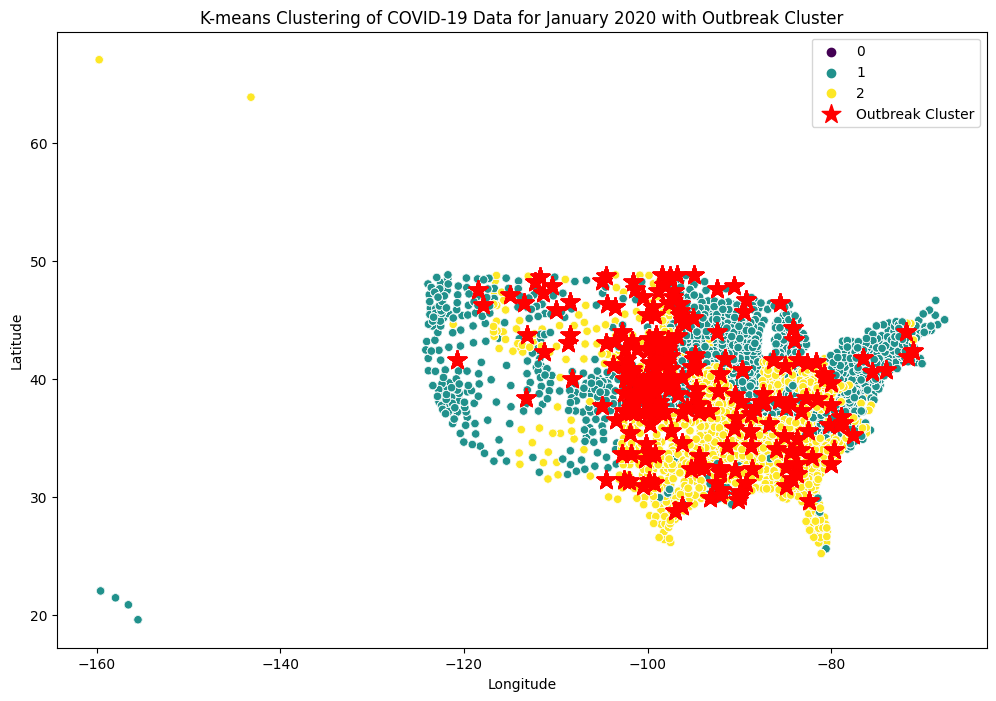

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


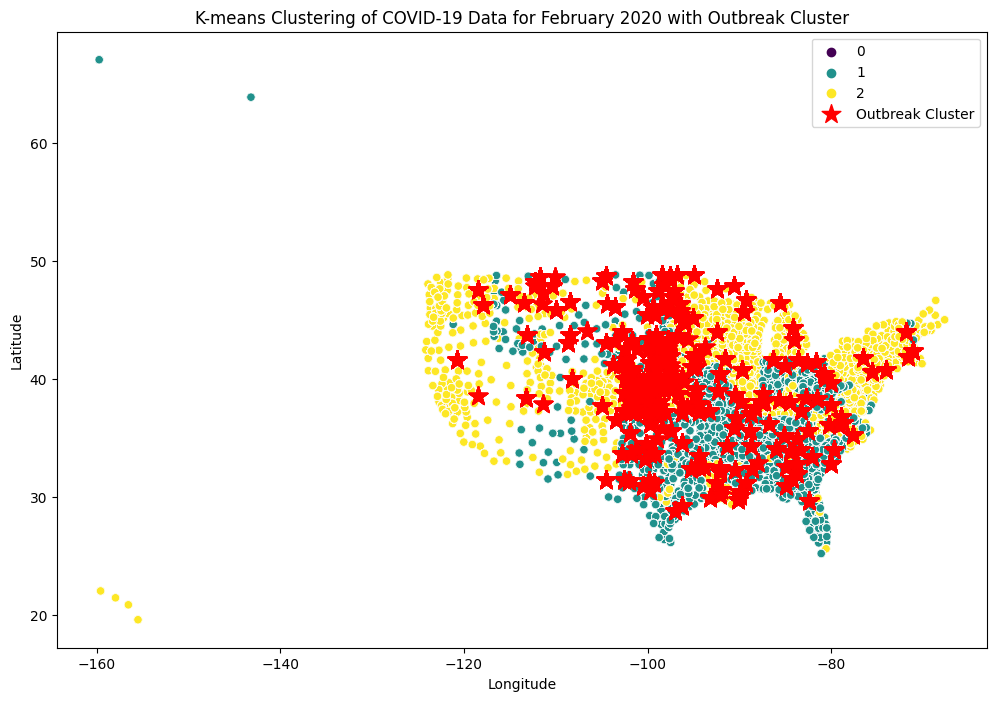

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


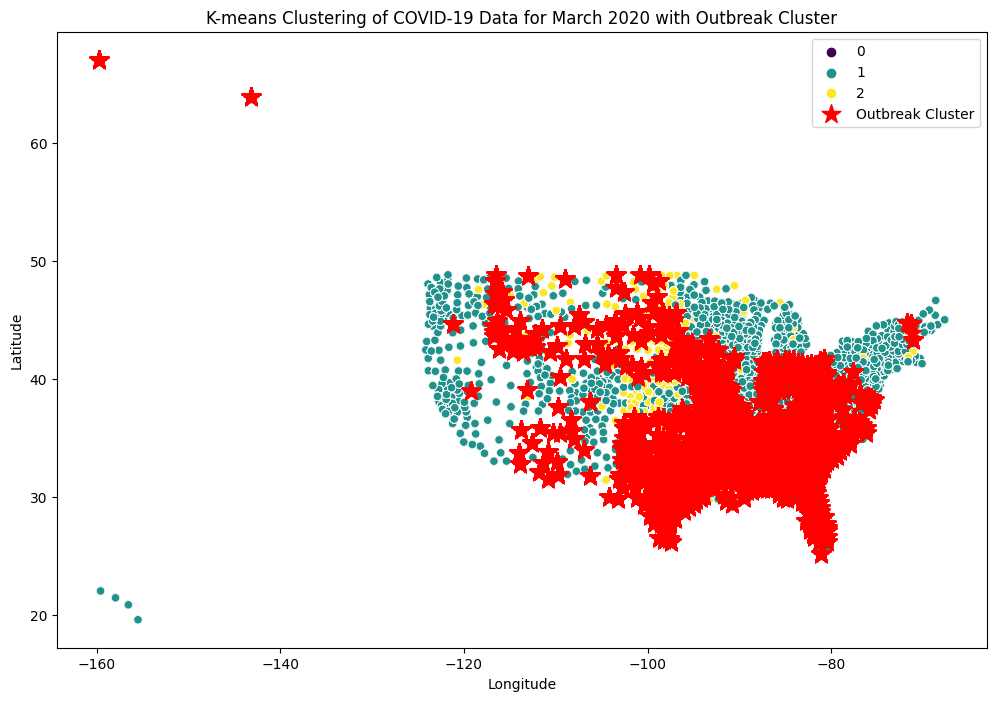

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


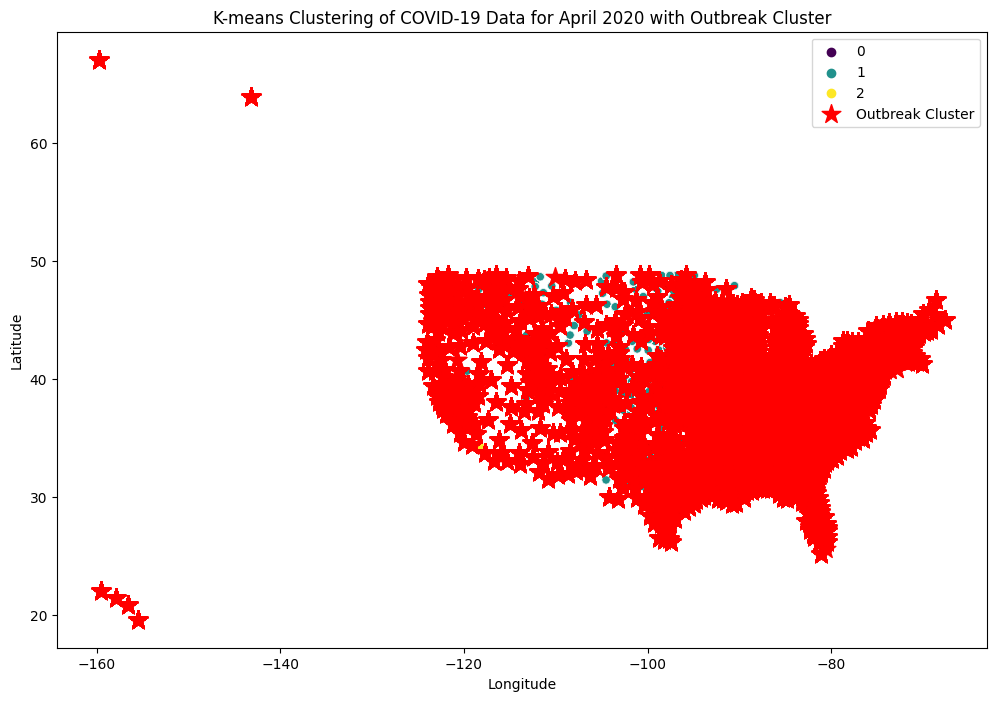

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


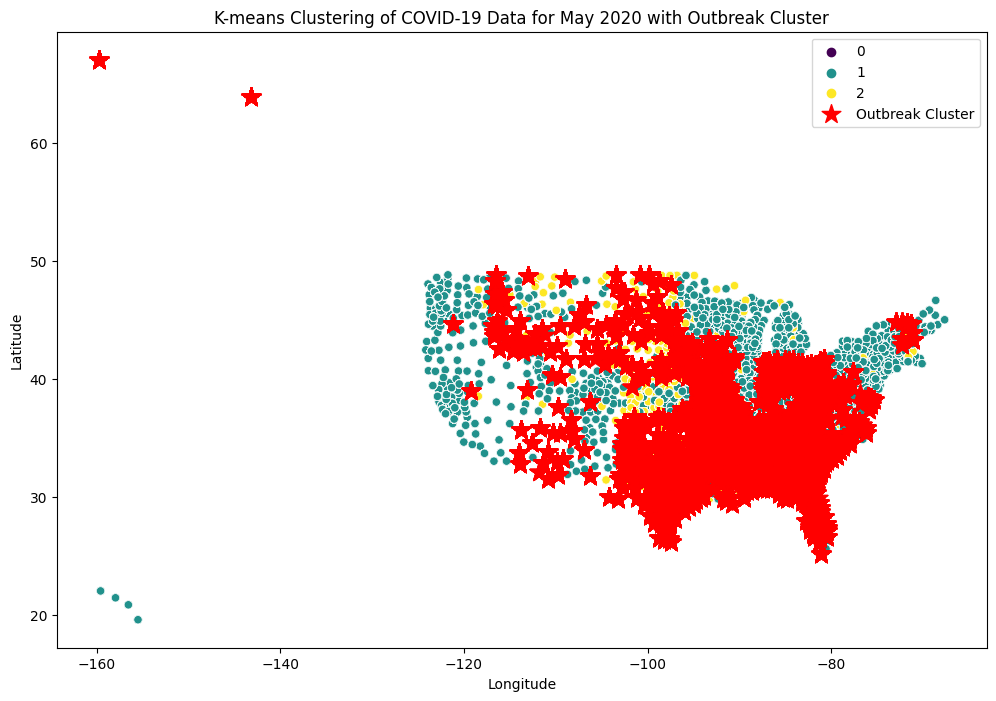

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


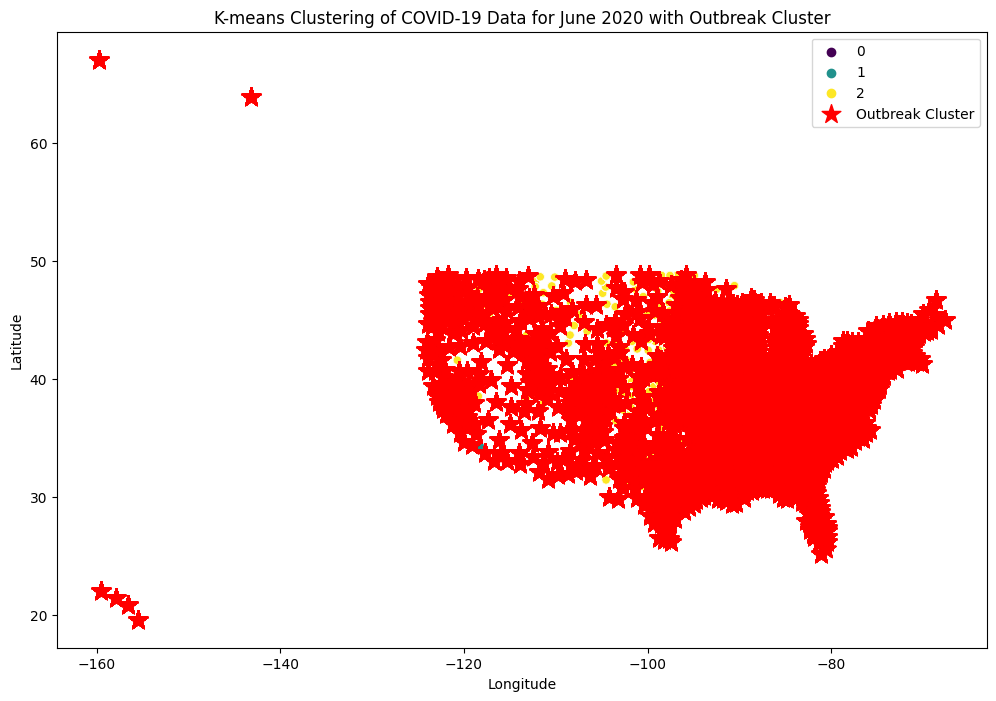

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


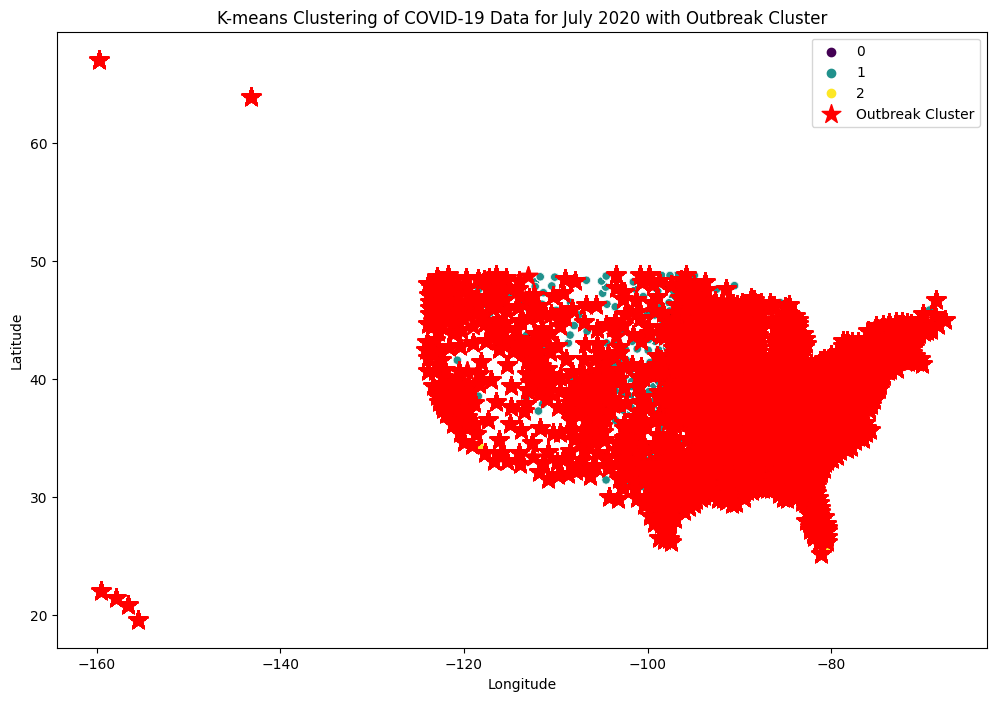

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


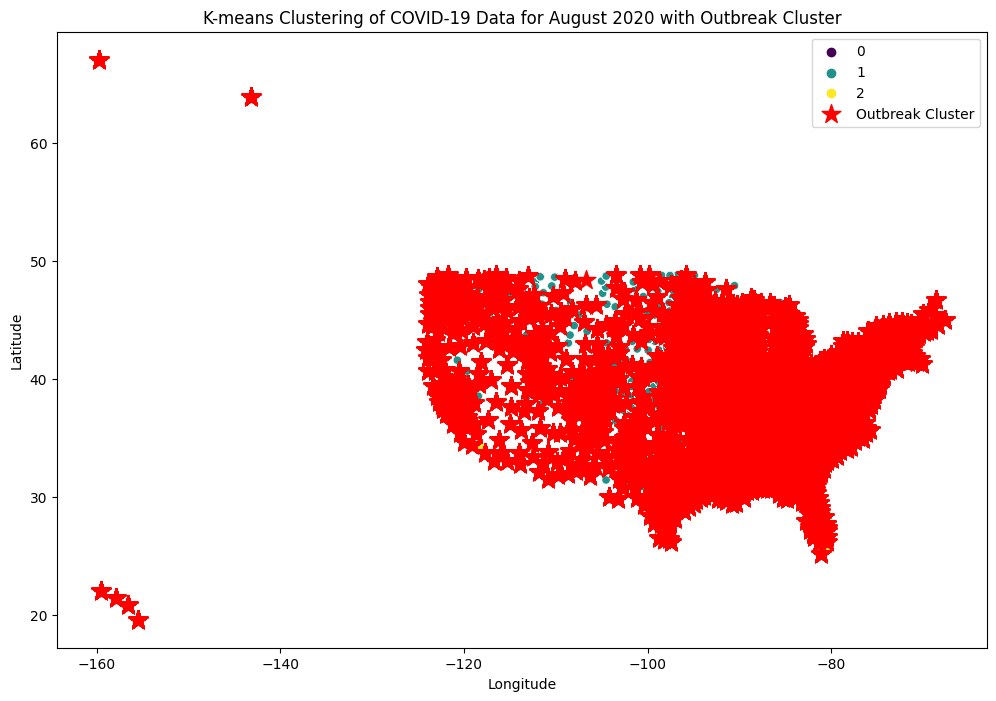

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\4177323596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['cluster'] = clusters


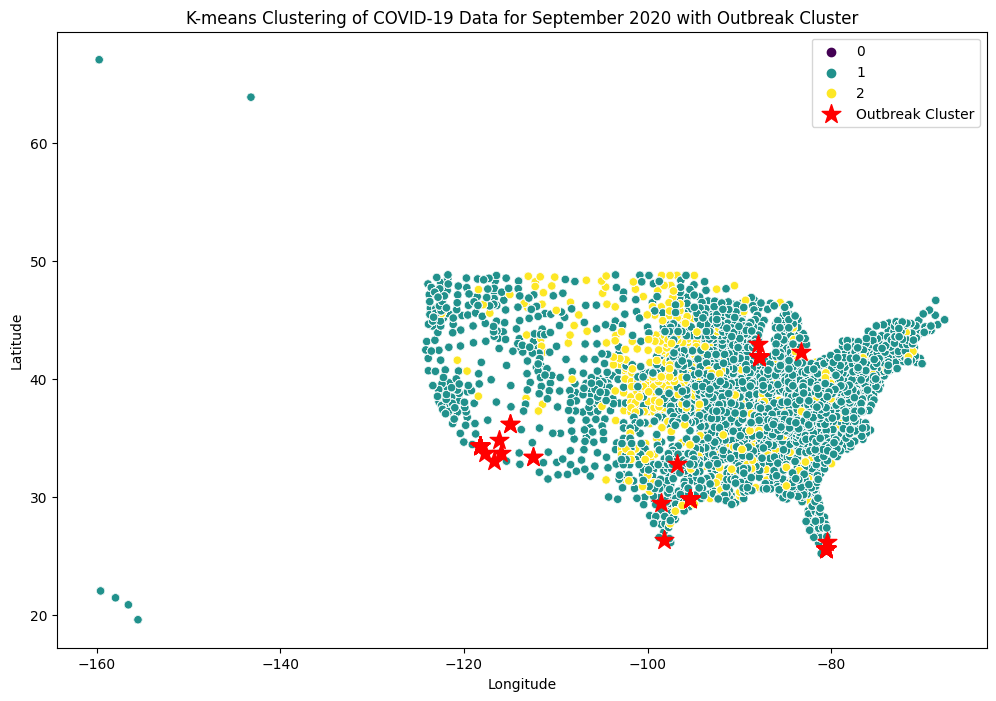

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your dataset into 'df'

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

for month_year in df['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = df[df['month_year'] == month_year]
    
    # Check if all selected features are present in the current month's data
    missing_features = [feat for feat in selected_features_iforest if feat not in df_month.columns]
    
    if missing_features:
        print(f"Skipping month {month_year}: Missing features - {missing_features}")
        continue
    
    # Create the dataset with selected features
    X_selected = df_month[selected_features_iforest]

    # Scaling the Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # K-means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Analyzing Clusters
    df_month['cluster'] = clusters
    cluster_summary = df_month.groupby('cluster')[selected_features_iforest].mean()

    # Identifying Clusters with High COVID-19 Cases or Deaths
    cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary.get('covid_19_deaths', 0)
    outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
    outbreak_cluster = outbreak_cluster.reset_index()

    # Plotting the clusters on a map
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_month, palette='viridis', legend='full')

    # Plot the outbreak cluster from the original DataFrame
    outbreak_cluster_indices = df_month[df_month['cluster'] == outbreak_cluster.index[0]].index
    outbreak_cluster_data = df_month.loc[outbreak_cluster_indices]
    plt.scatter(outbreak_cluster_data['longitude'], outbreak_cluster_data['latitude'], color='red', marker='*', s=200, label='Outbreak Cluster')

    # Adding labels and title
    plt.title(f'K-means Clustering of COVID-19 Data for {month_year.strftime("%B %Y")} with Outbreak Cluster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    
    # Save or show the plot
    plt.savefig(f'cluster_plot_{month_year}.png')
    plt.show()


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.000000              0.0             0.001402   
1                        0.022222              0.0             0.001509   
2                        0.000000              0.0             0.005113   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000157                   0.000136               0.0   
1              0.000222                   0.000229               0.0   
2              0.000449                   0.000412               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        12.840689         10

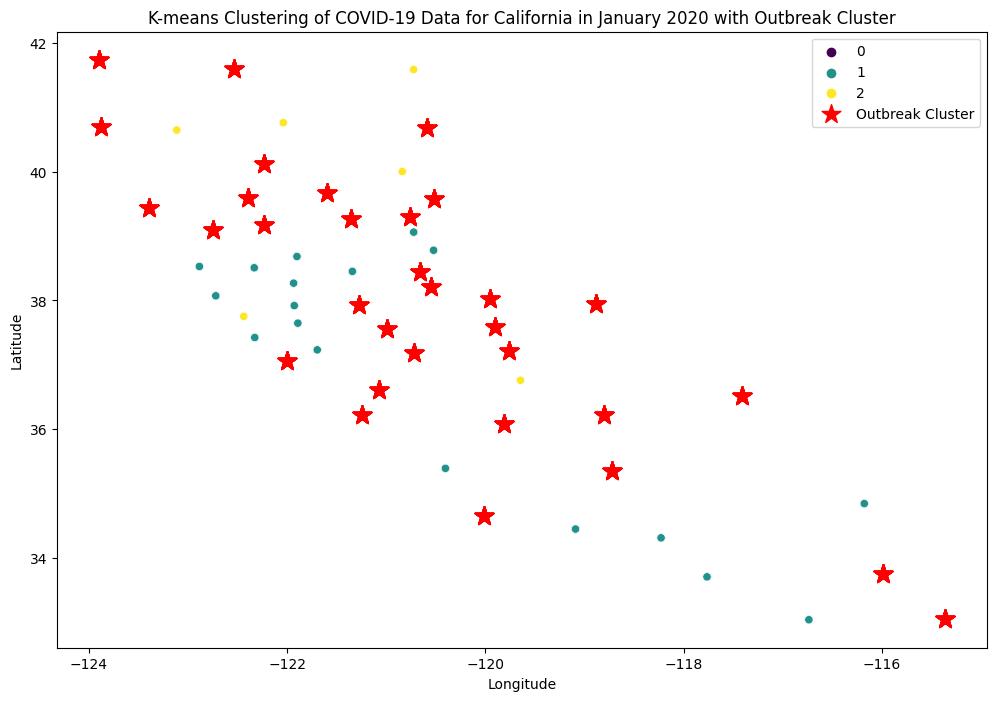

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002630   
1                             0.0              0.0             0.001056   
2                             0.0              0.0             0.002349   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000416                   0.000433               0.0   
1              0.000164                   0.000159               0.0   
2              0.000463                   0.000493               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        16.478119         10.54

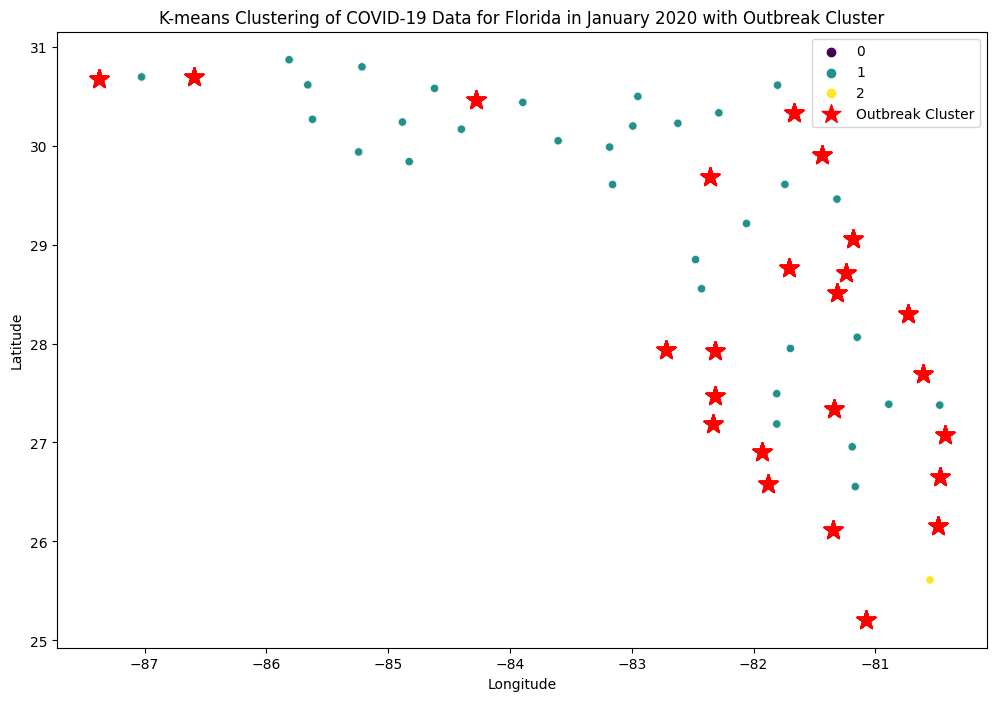

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002430   
1                             0.0              0.0             0.008295   
2                             0.0              0.0             0.002901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000198                   0.000197               0.0   
1              0.001224                   0.001369               0.0   
2              0.000267                   0.000287               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        18.350414         15.35

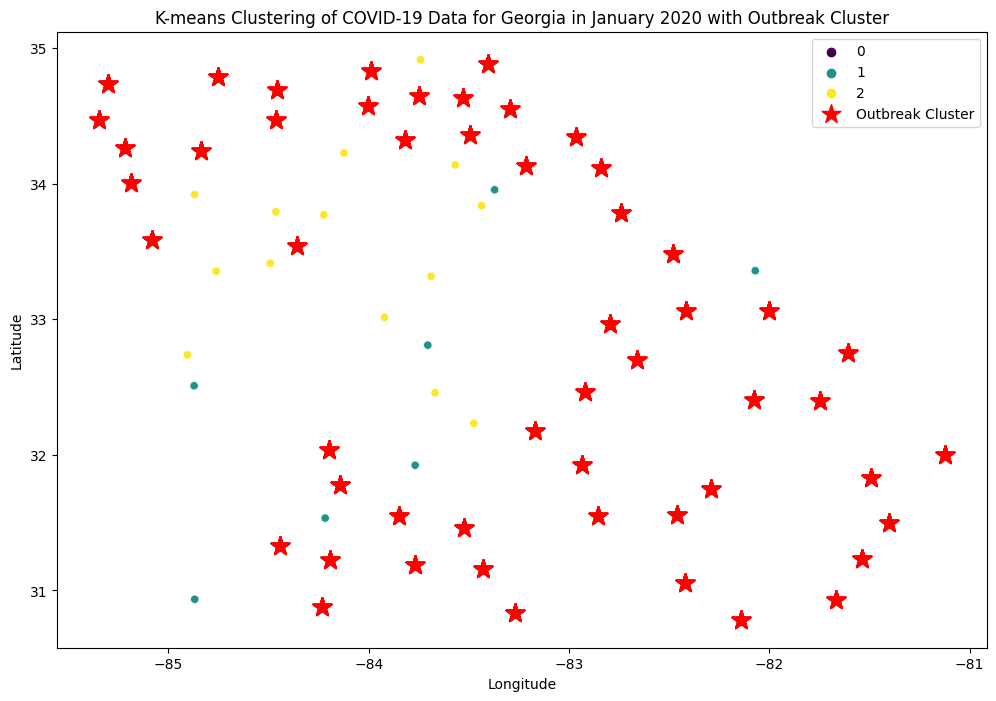

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001618   
1                             0.2              0.0             0.002785   
2                             0.0              0.0             0.004471   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000171                   0.000165               0.0   
1              0.000590                   0.000645               0.0   
2              0.000536                   0.000532               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.644154         10.8

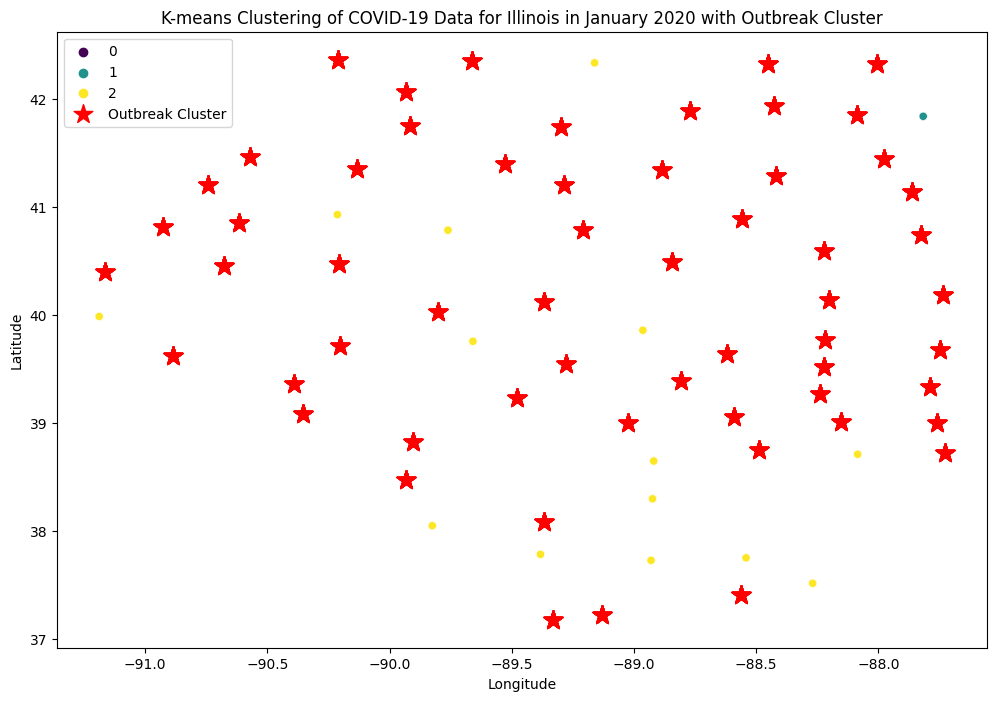

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001478   
1                             0.0              0.0             0.004299   
2                             0.0              0.0             0.000658   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000152                   0.000144               0.0   
1              0.000477                   0.000488               0.0   
2              0.000093                   0.000086               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        17.499508         12.9

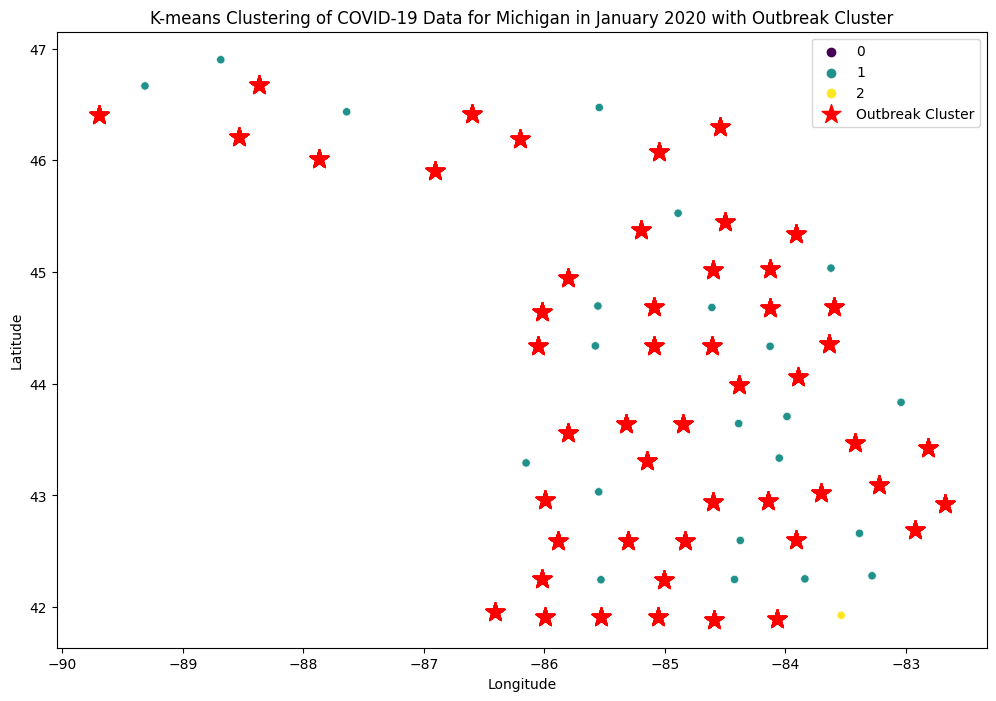

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001936   
1                             0.0              0.0             0.004290   
2                             0.0              0.0             0.001053   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000153                   0.000150          0.849397   
1              0.000408                   0.000430          0.849397   
2              0.000124                   0.000124          0.849397   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        15.904962         11.4

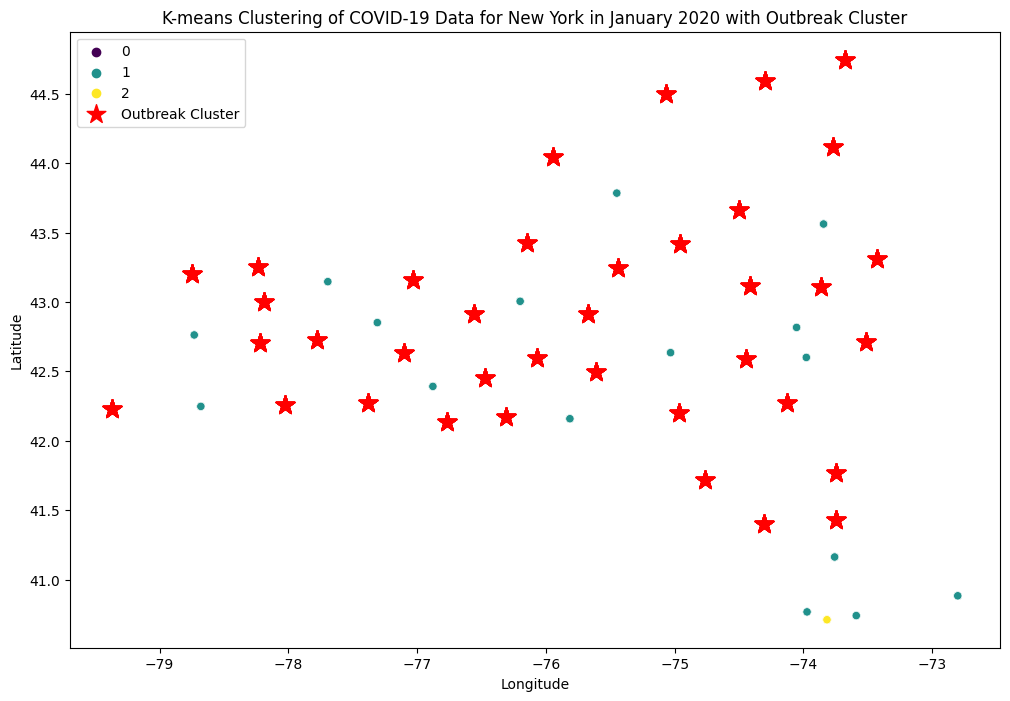

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001119   
1                             0.0              0.0             0.001765   
2                             0.0              0.0             0.002744   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000165                   0.000167               0.0   
1              0.000255                   0.000260               0.0   
2              0.003061                   0.003733               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        19.252719       

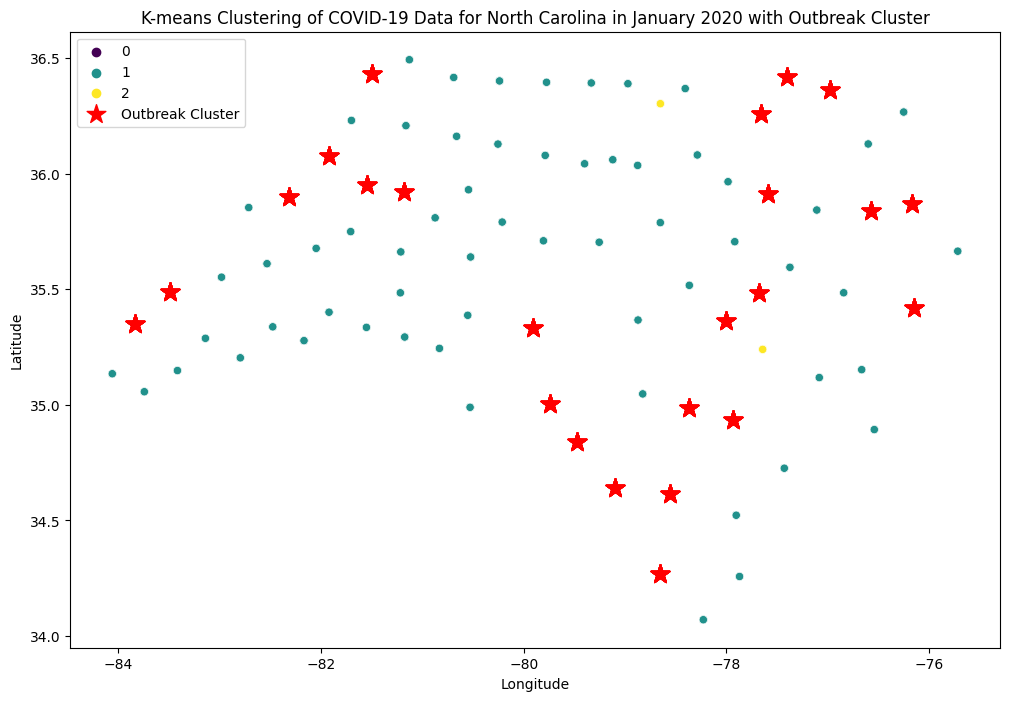

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001935   
1                             0.0              0.0             0.001271   
2                             0.0              0.0             0.003898   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000184               0.0   
1              0.000167                   0.000159               0.0   
2              0.000617                   0.000655               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        20.459727         14.65200

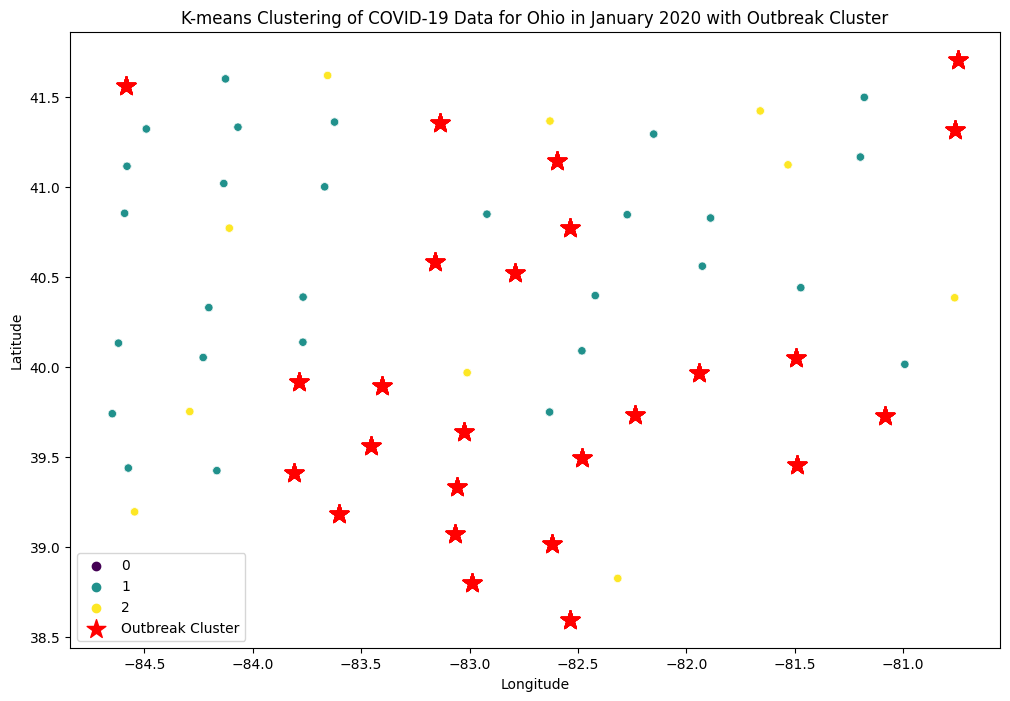

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.003157   
1                             0.0              0.0             0.001116   
2                             0.0              0.0             0.002788   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000529                   0.000559               0.0   
1              0.000123                   0.000120               0.0   
2              0.000212                   0.000205               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        17.243704         

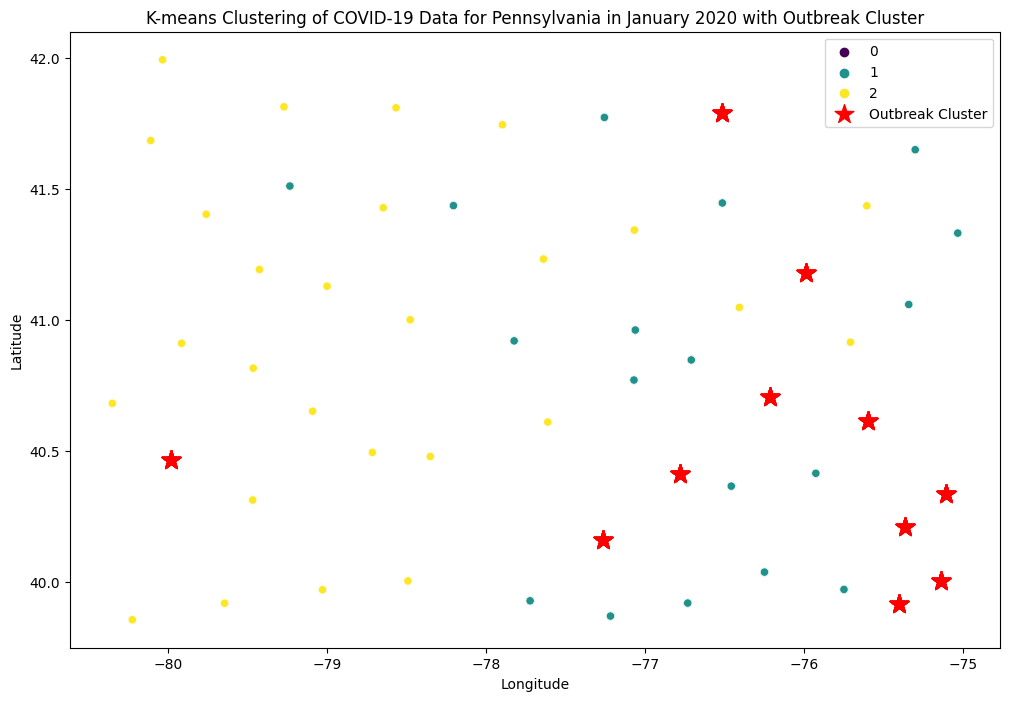

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001278   
1                             0.0              0.0             0.007377   
2                             0.0              0.0             0.001724   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000234                   0.000237               0.0   
1              0.001522                   0.001665               0.0   
2              0.000287                   0.000289               0.0   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                                 12.0        13.890503          8.8716

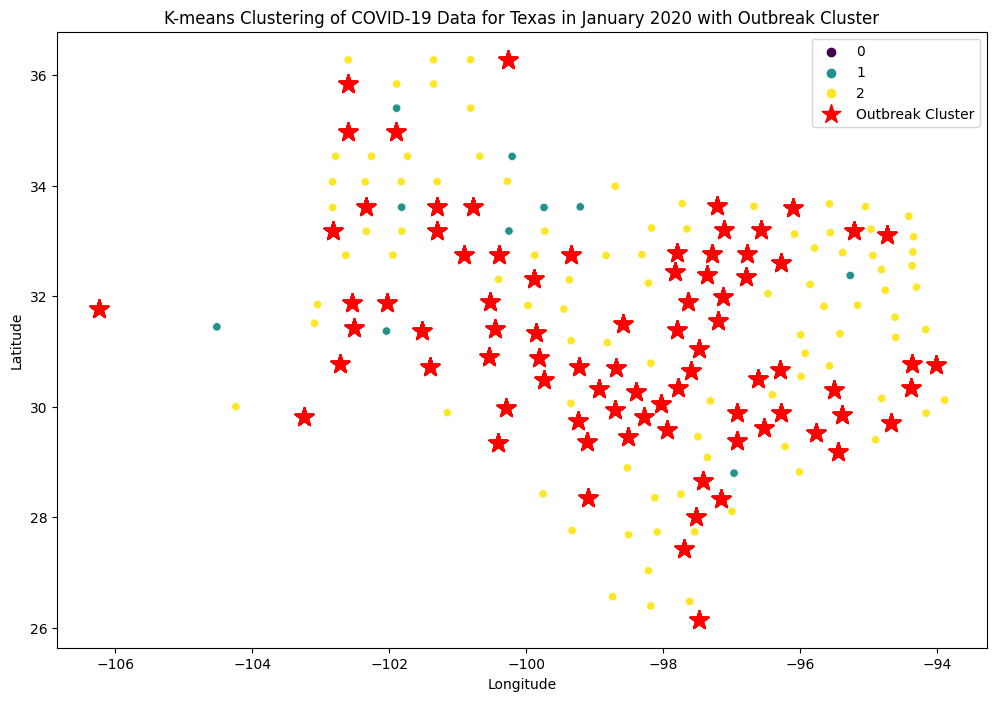

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.020936         0.002463             0.001499   
1                        0.000000         0.000000             0.005113   
2                        0.001567         0.000000             0.001366   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000184                   0.000180          0.320283   
1              0.000449                   0.000412          0.320283   
2              0.000176                   0.000157          0.320283   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.778325        10.700079          8

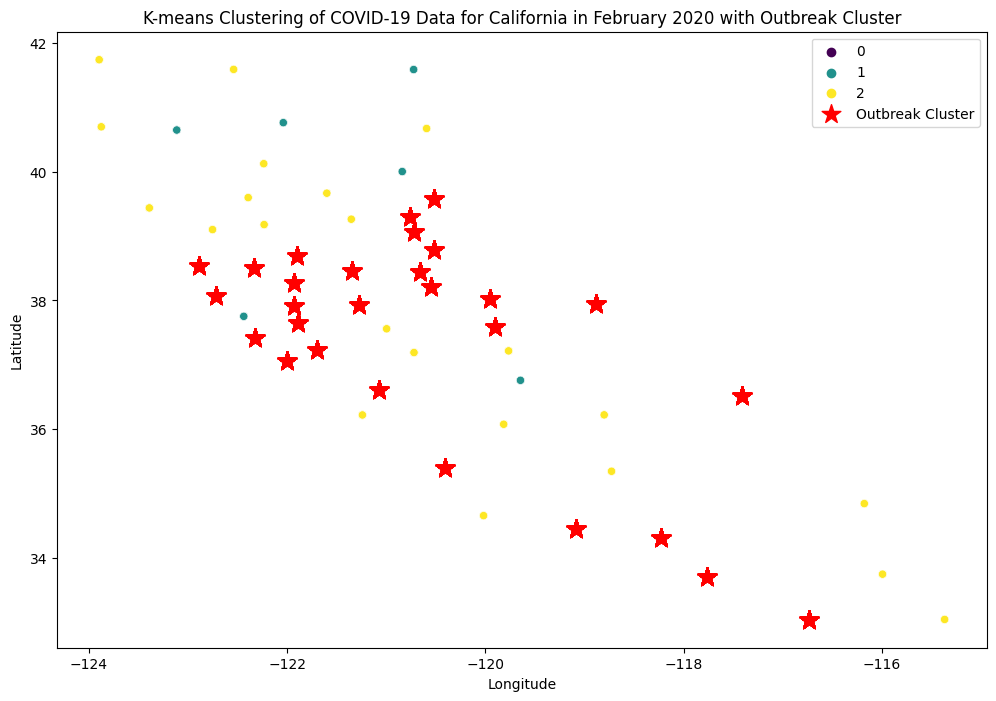

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001026   
1                             0.0              0.0             0.002537   
2                             0.0              0.0             0.001742   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000155                   0.000148            0.0000   
1              0.000409                   0.000427            0.0000   
2              0.000275                   0.000280            5.0012   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.675000        21.062749         14.30

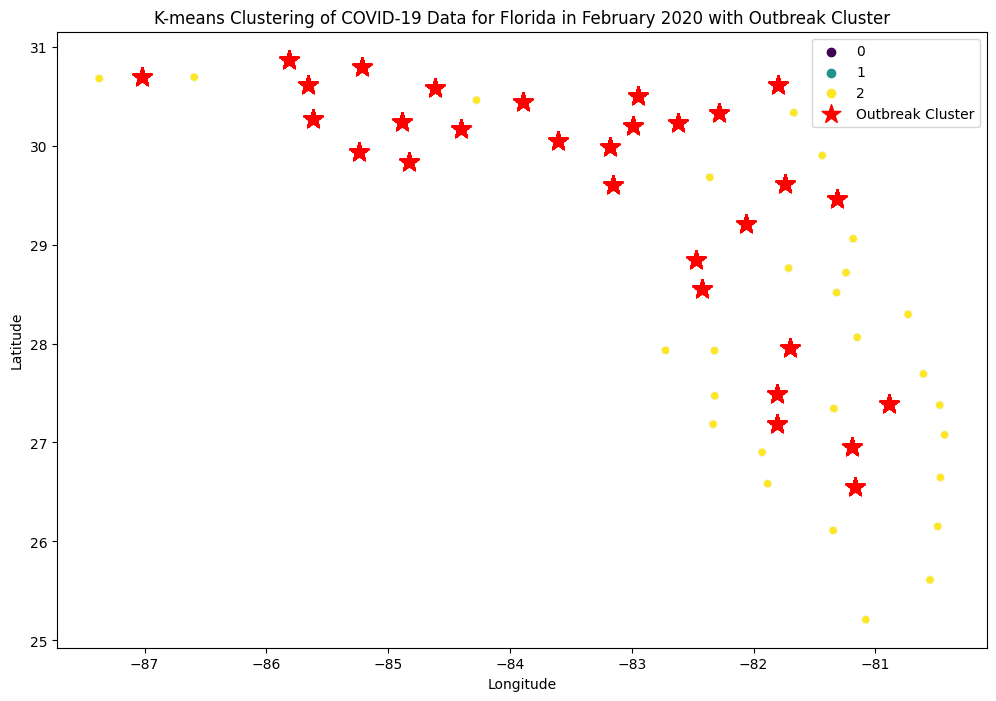

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002639   
1                             0.0              0.0             0.007891   
2                             0.0              0.0             0.002442   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000258                   0.000263          0.085173   
1              0.001139                   0.001277          0.085173   
2              0.000192                   0.000192          0.085173   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.995690        15.407889          10.2

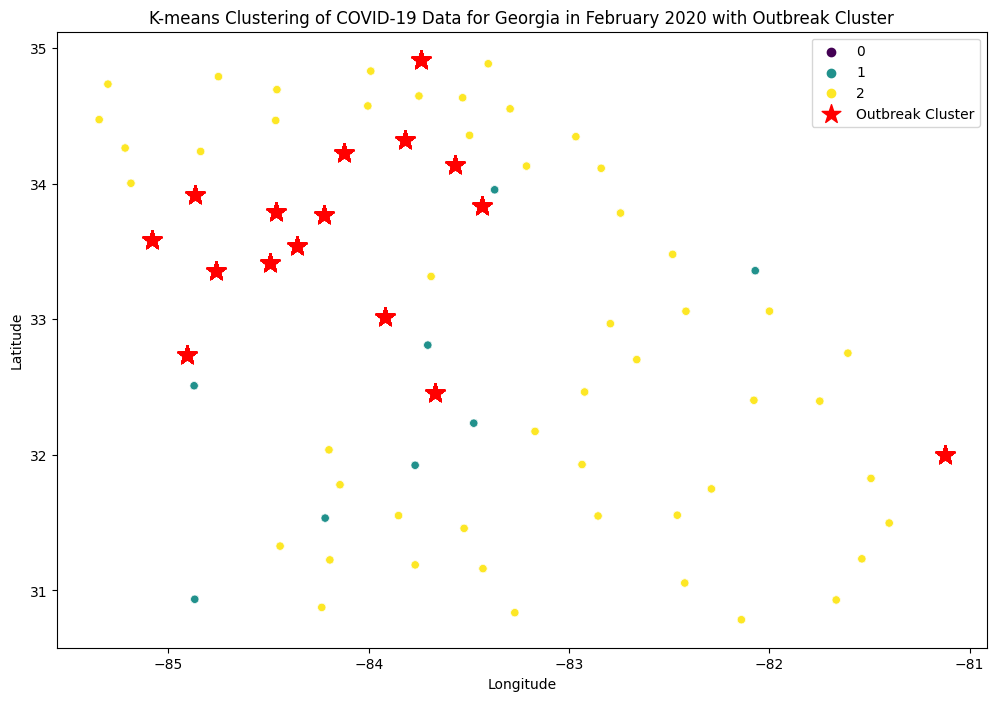

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002785   
1                             0.0              0.0             0.004394   
2                             0.0              0.0             0.001538   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000590                   0.000645          0.103161   
1              0.000497                   0.000495          0.103161   
2              0.000168                   0.000163          0.103161   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        13.776183          9.5

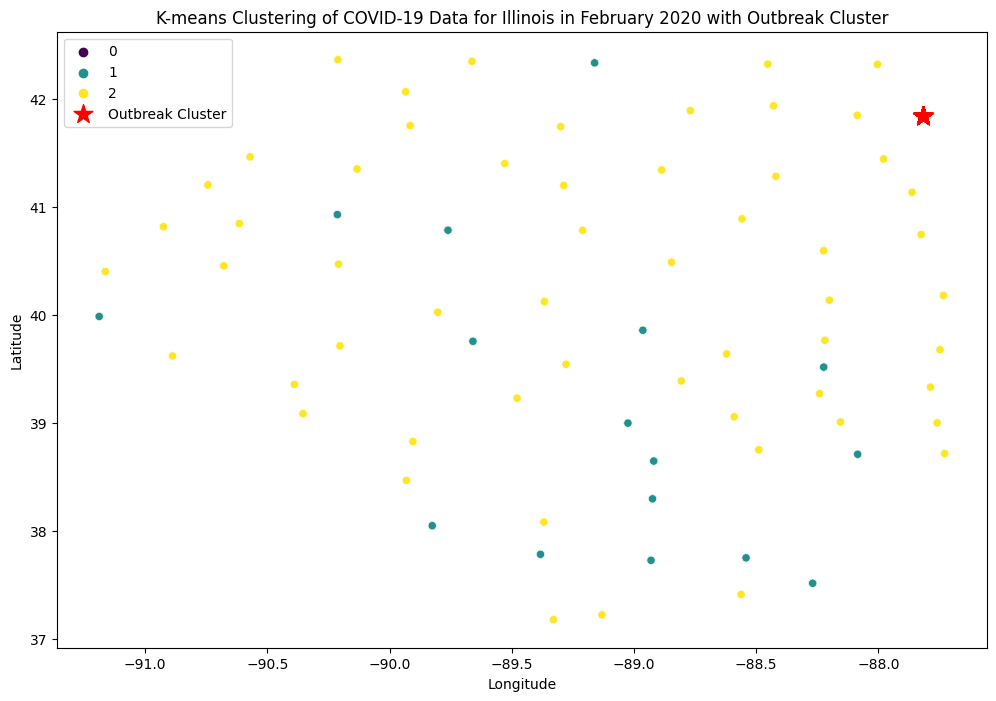

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.004299   
1                             0.0              0.0             0.001478   
2                             0.0              0.0             0.000658   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000477                   0.000488          0.080934   
1              0.000152                   0.000144          0.080934   
2              0.000093                   0.000086          0.080934   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.677116        17.395656         10.6

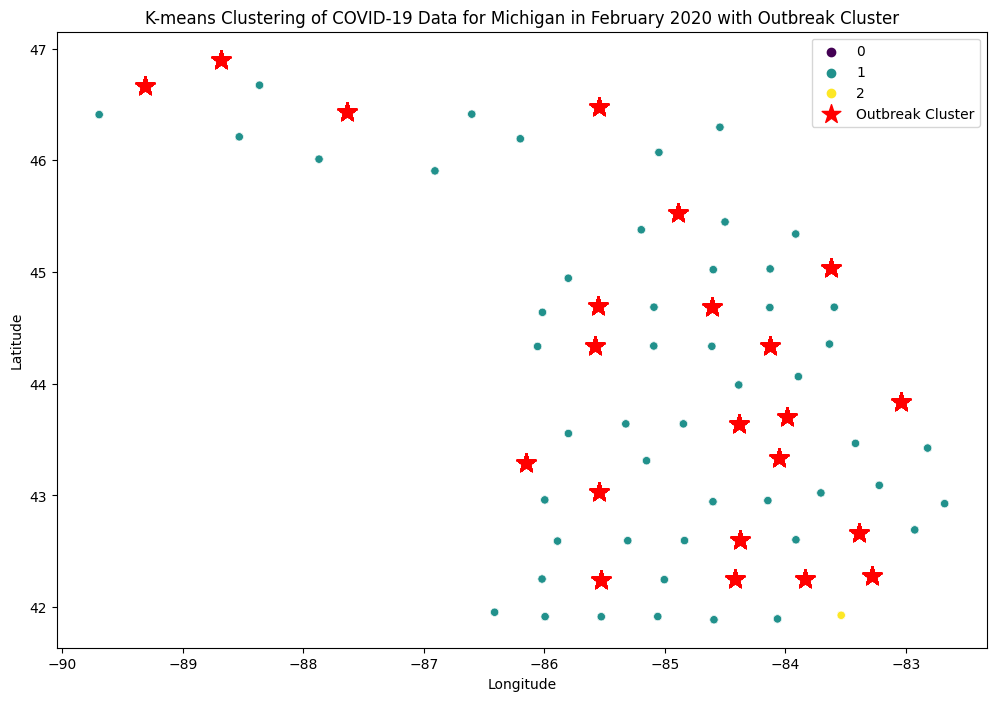

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002304   
1                             0.0              0.0             0.003700   
2                             0.0              0.0             0.001053   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000159                   0.000156          1.464477   
1              0.000449                   0.000475          1.464477   
2              0.000124                   0.000124          1.464477   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.626724        15.860658         11.4

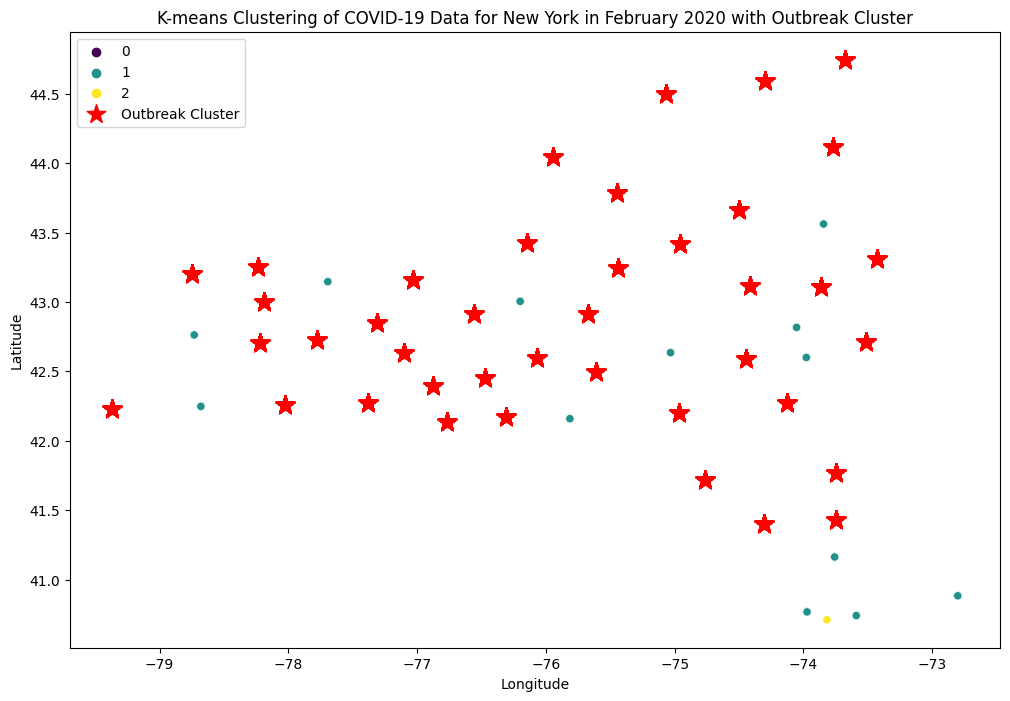

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001904   
1                             0.0              0.0             0.001127   
2                             0.0              0.0             0.002744   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000275                   0.000282          0.075823   
1              0.000166                   0.000166          0.095801   
2              0.003061                   0.003733          0.084074   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.993089        16.601938       

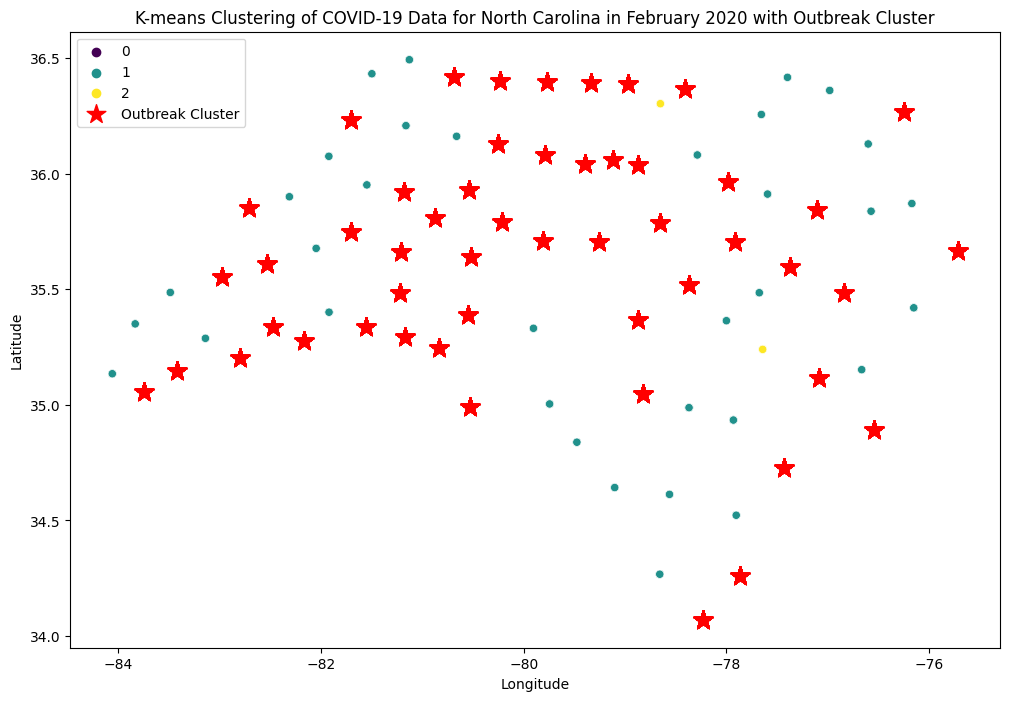

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.001935   
1                             0.0              0.0             0.003898   
2                             0.0              0.0             0.001271   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000203                   0.000184          0.094646   
1              0.000617                   0.000655          0.094646   
2              0.000167                   0.000159          0.094646   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.903448        20.459727         14.65200

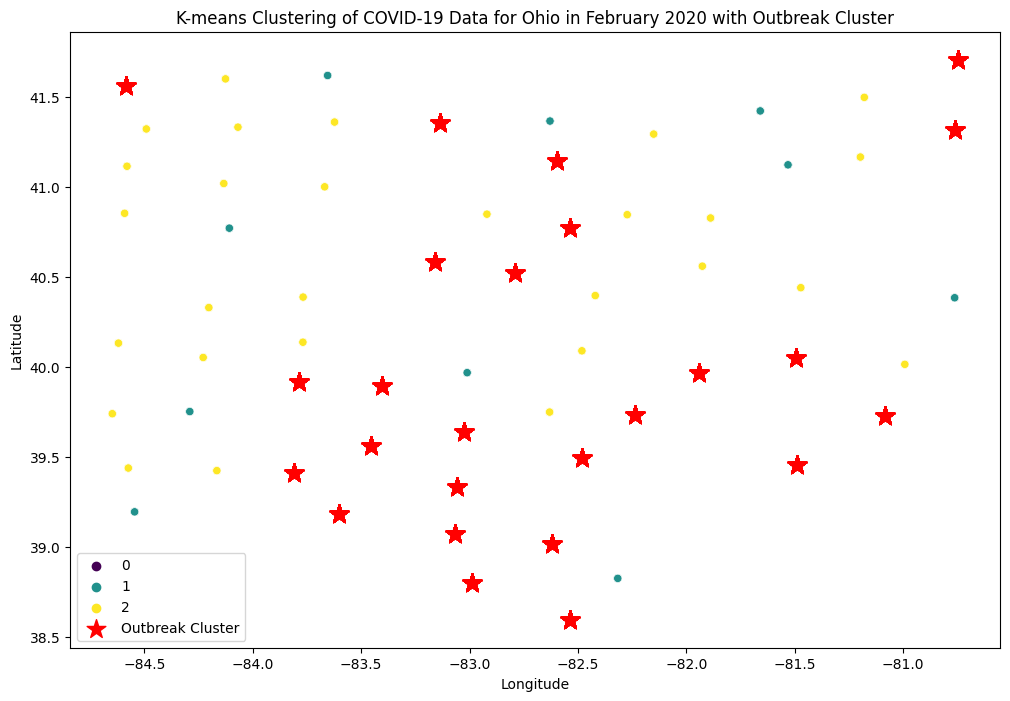

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.002751   
1                             0.0              0.0             0.003157   
2                             0.0              0.0             0.001082   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000209                   0.000203          0.100115   
1              0.000529                   0.000559          0.103695   
2              0.000123                   0.000119          0.109573   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.770654        18.957281         

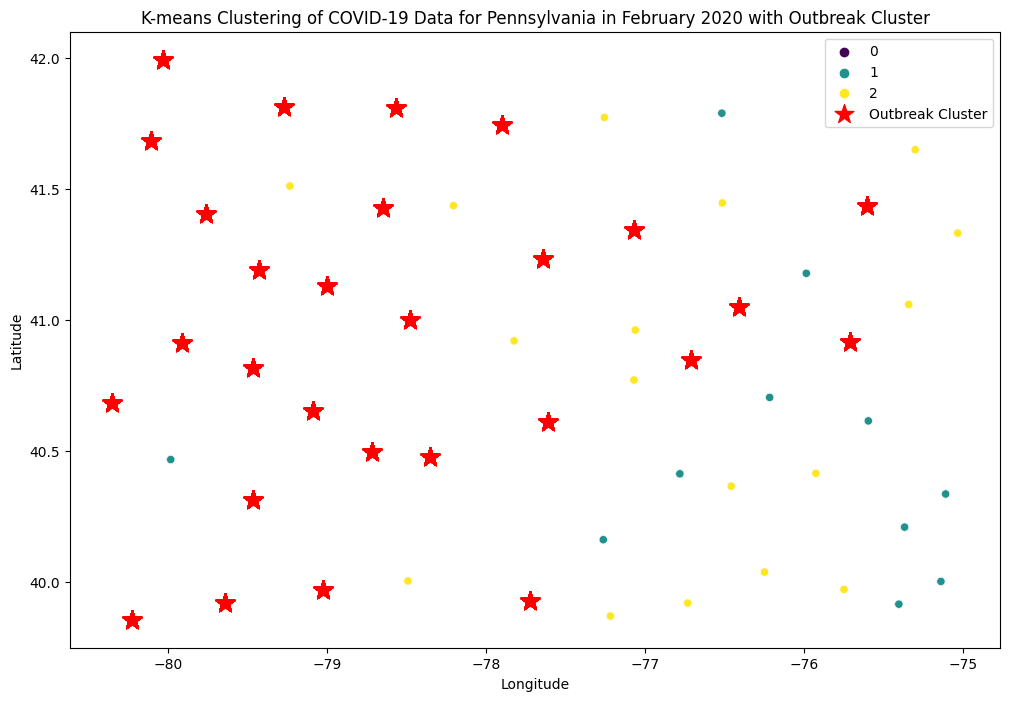

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                             0.0              0.0             0.006972   
1                             0.0              0.0             0.001443   
2                             0.0              0.0             0.001736   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.001366                   0.001453          0.055090   
1              0.000253                   0.000257          0.000000   
2              0.000299                   0.000305          6.739353   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.452316        15.727045         12.1482

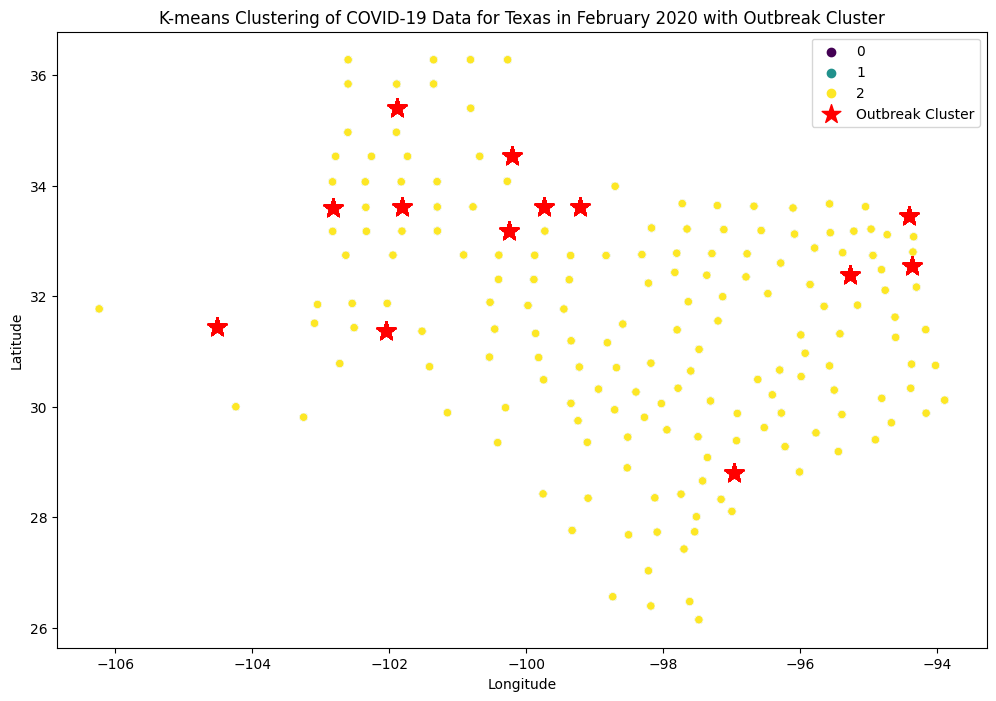

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.696359         0.082575             0.001436   
1                        2.507937         0.037037             0.005065   
2                      289.111111         5.444444             0.001901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000180                   0.000169        920.314578   
1              0.000447                   0.000411        944.796077   
2              0.000256                   0.000265       1823.777778   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.397269        11.955200          9

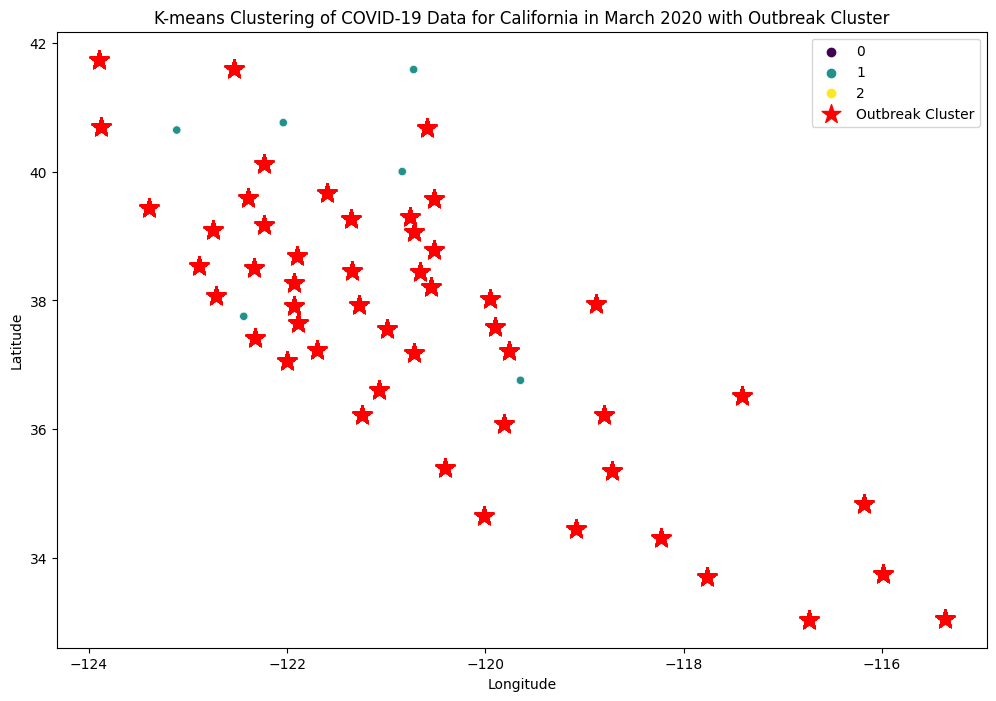

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       76.521739         0.739130             0.002426   
1                        2.911405         0.039715             0.002392   
2                        0.276049         0.006766             0.000836   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000437                   0.000465       3478.673965   
1              0.000389                   0.000401       1758.706802   
2              0.000113                   0.000107       2121.150278   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.478261        16.069652          8.17

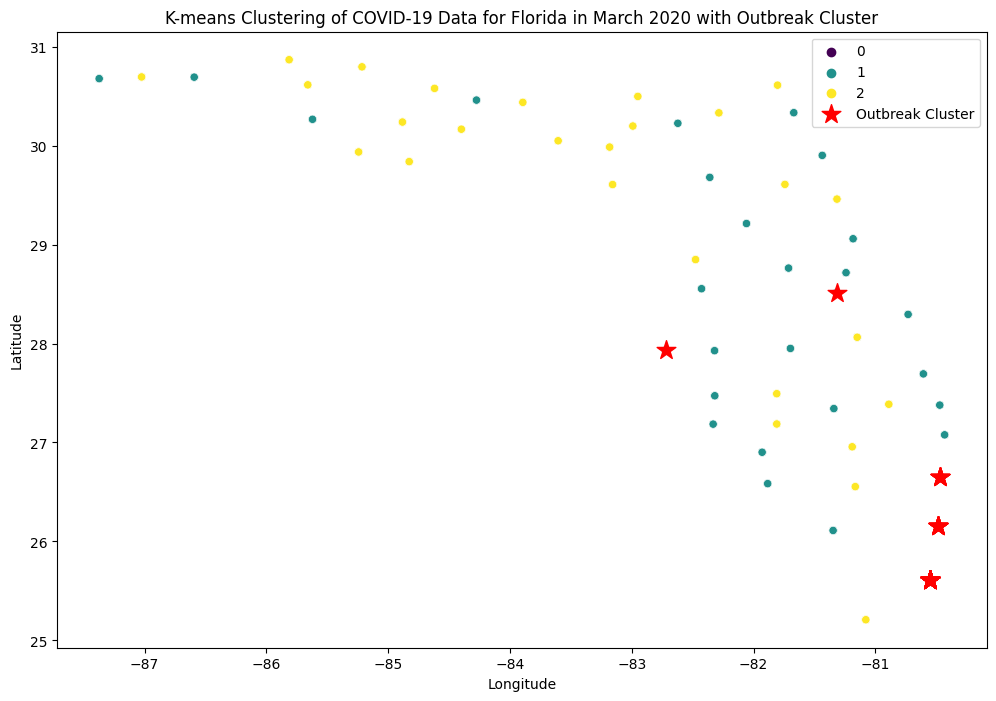

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.439572         0.027807             0.002758   
1                        0.424934         0.016681             0.002337   
2                        4.122727         0.204545             0.008232   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000214                   0.000207        457.487724   
1              0.000210                   0.000221        572.446850   
2              0.001217                   0.001361        535.652638   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.445989        16.183061         11.30

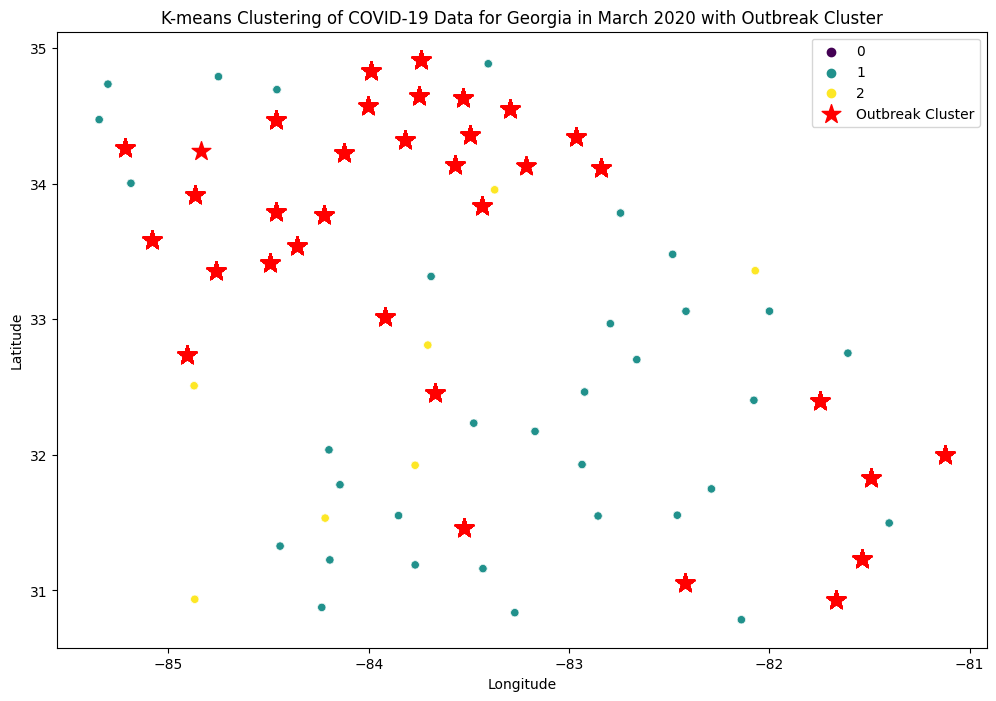

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.926136         0.023438             0.001209   
1                      144.967742         1.967742             0.002785   
2                        0.166262         0.003641             0.003819   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000149                   0.000144       1222.259209   
1              0.000590                   0.000645       1133.189217   
2              0.000400                   0.000394        980.991949   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.333097        15.384878         10.6

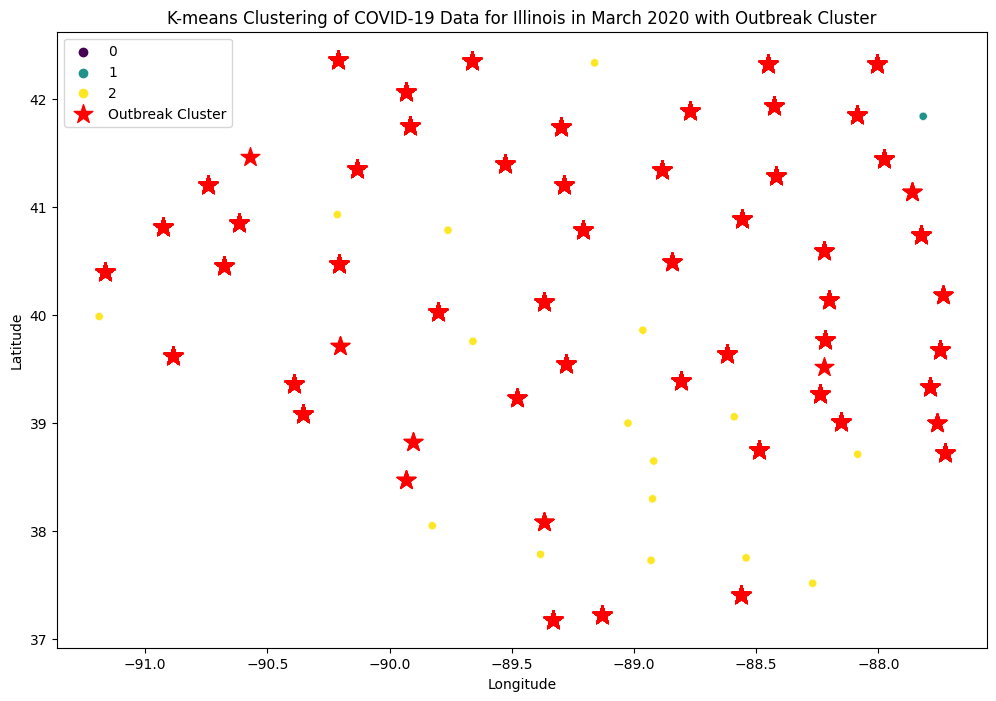

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.482068         0.025316             0.001533   
1                        2.478127         0.047583             0.002885   
2                      316.583333        14.416667             0.002559   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000142                   0.000135       1894.853376   
1              0.000326                   0.000327       1102.980814   
2              0.000379                   0.000342       4163.500000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.377637        17.600565         14.4

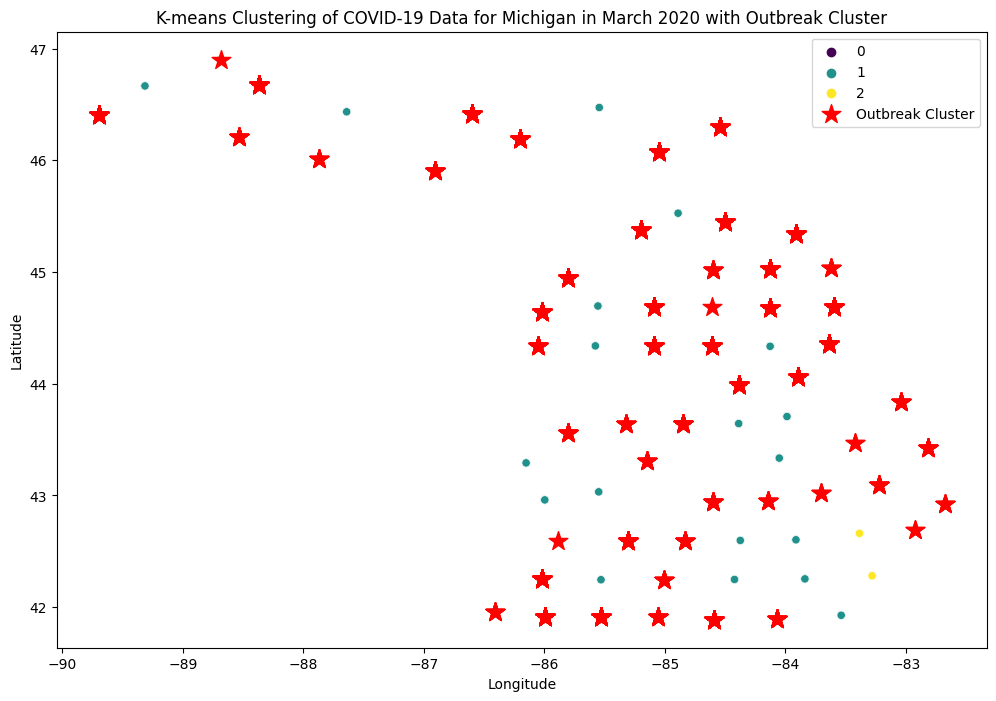

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.465249         0.022077             0.002260   
1                      447.387097        12.129032             0.001053   
2                       78.778571         0.704762             0.003772   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000158                   0.000155       6704.852121   
1              0.000124                   0.000124       6618.737919   
2              0.000440                   0.000467       6367.981564   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.678659        15.885964         11.4

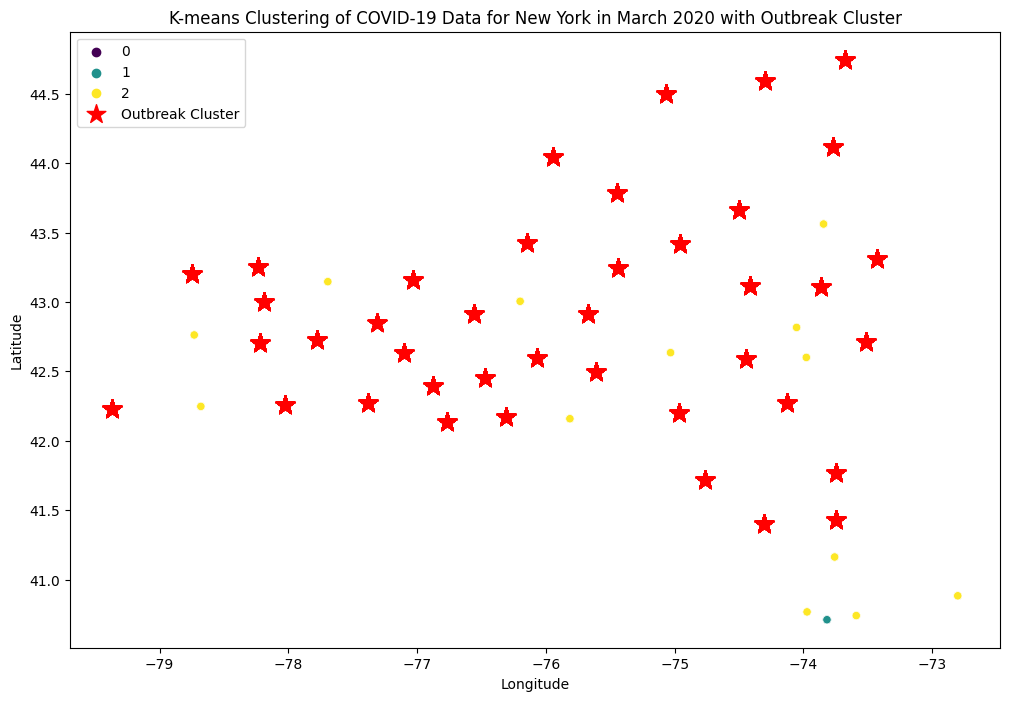

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.769095         0.004113             0.001707   
1                        0.101033         0.000000             0.001117   
2                        0.532258         0.008065             0.003730   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000225                   0.000223        652.439821   
1              0.000168                   0.000171        927.287203   
2              0.002146                   0.002573        745.479879   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.364865        16.875349       

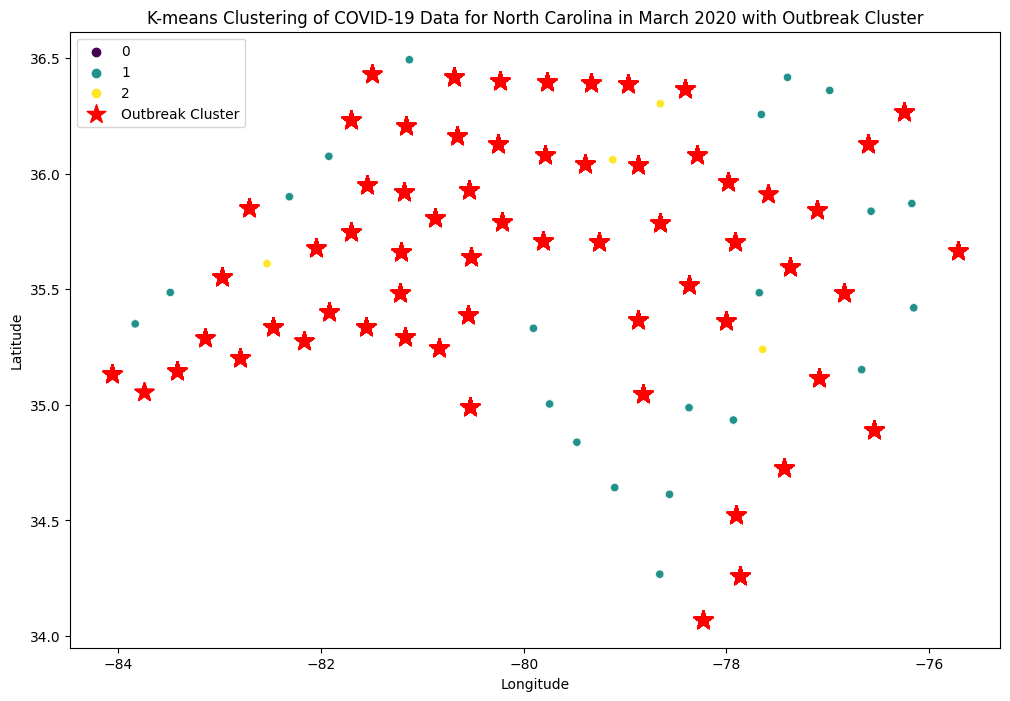

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.446667         0.096667             0.003933   
1                        0.134715         0.000000             0.001934   
2                        0.409762         0.004540             0.001293   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000619                   0.000659       1075.485856   
1              0.000203                   0.000184        933.083610   
2              0.000172                   0.000165        903.561855   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.926667        19.953190         12.79000

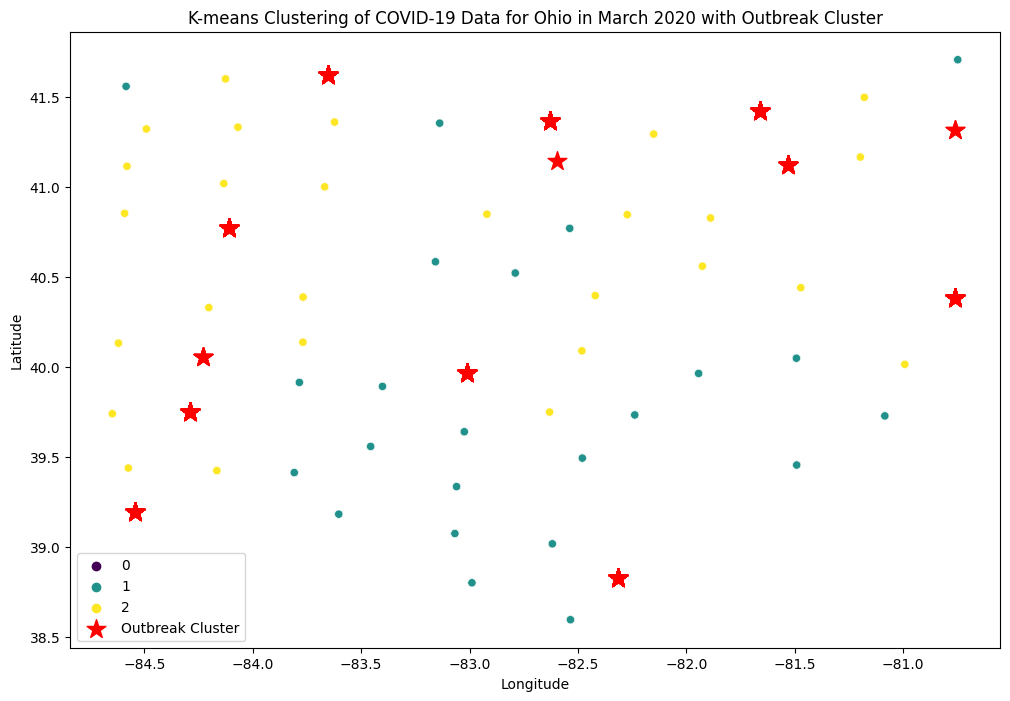

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.316940         0.001821             0.002747   
1                       53.727273         1.113636             0.002645   
2                        0.778653         0.005249             0.002107   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000402                   0.000420        705.282270   
1              0.000459                   0.000485       4620.022727   
2              0.000162                   0.000155       1567.637852   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.134791        17.301432         

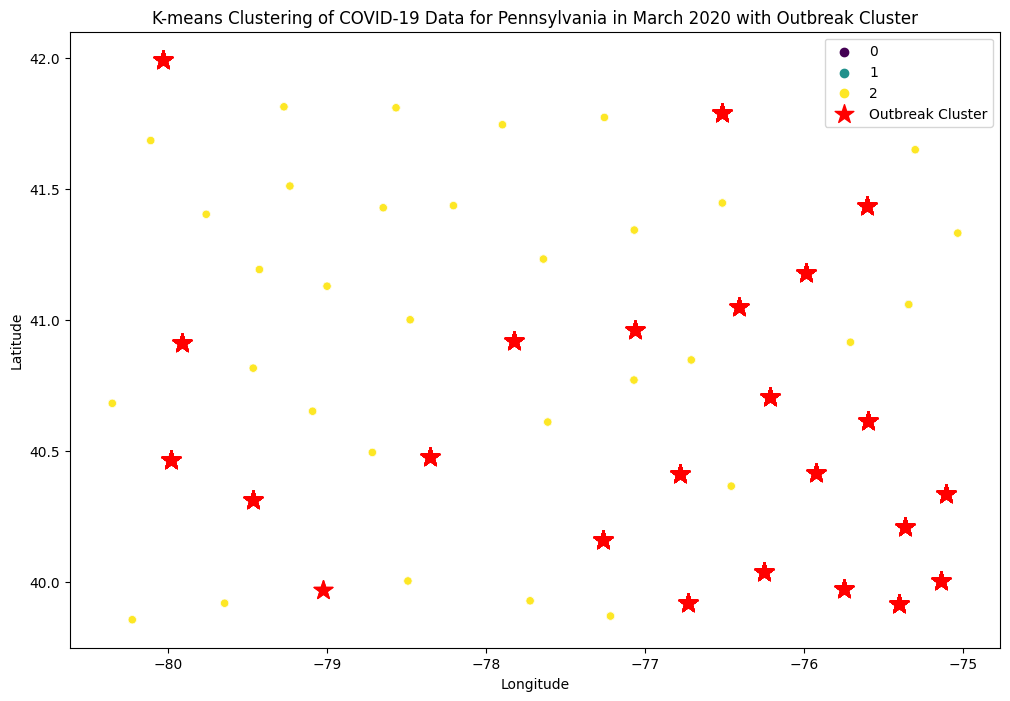

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        0.175659         0.000000             0.005054   
1                        0.328779         0.000000             0.001293   
2                       15.571429         0.403361             0.001960   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.001025                   0.001084       1418.456672   
1              0.000214                   0.000215       1367.926046   
2              0.000379                   0.000397       1950.297783   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.357591        15.206527         11.3848

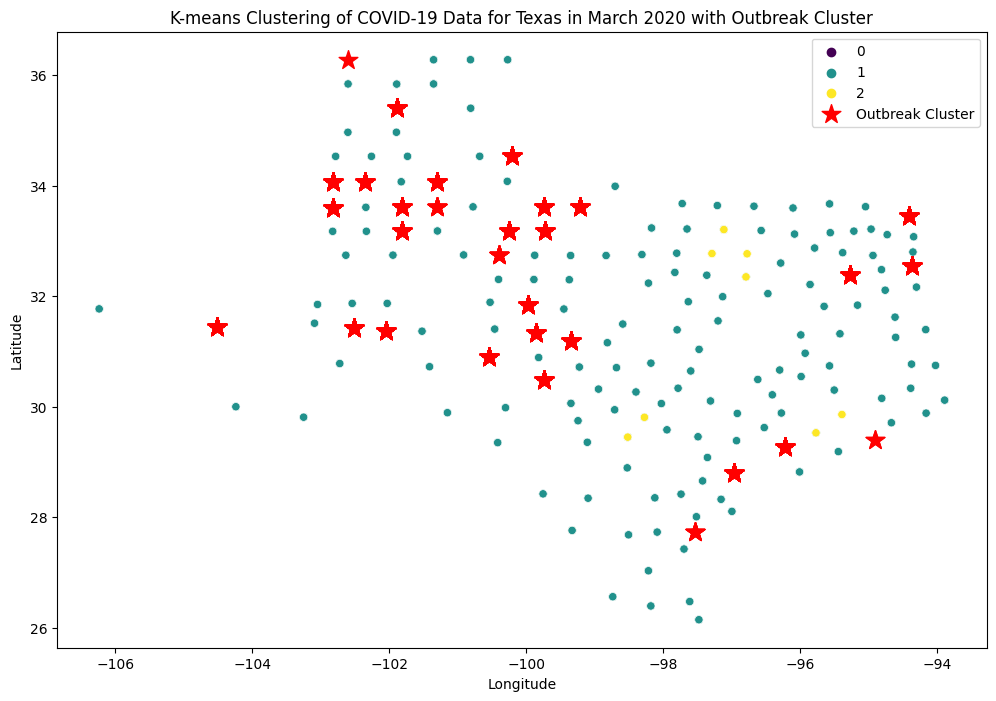

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        9.033333         0.144444             0.005113   
1                       13.393878         0.517687             0.001431   
2                      672.366667        35.233333             0.001901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000449                   0.000412      19869.433333   
1              0.000179                   0.000168      19869.433333   
2              0.000256                   0.000265      19869.433333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.222222        12.943789         11

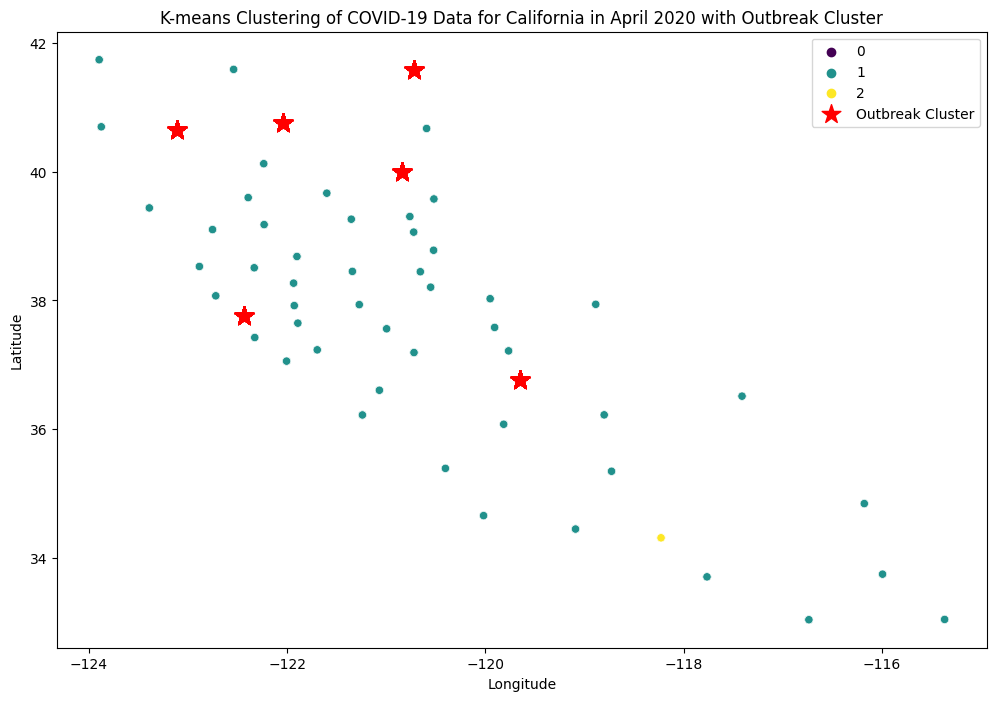

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.256059         0.091675             0.001049   
1                      323.419355        11.806452             0.002351   
2                       19.253425         0.954795             0.002616   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000163                   0.000158      10718.787144   
1              0.000461                   0.000492      10753.225806   
2              0.000413                   0.000430      10734.376712   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.364594        20.899402         14.15

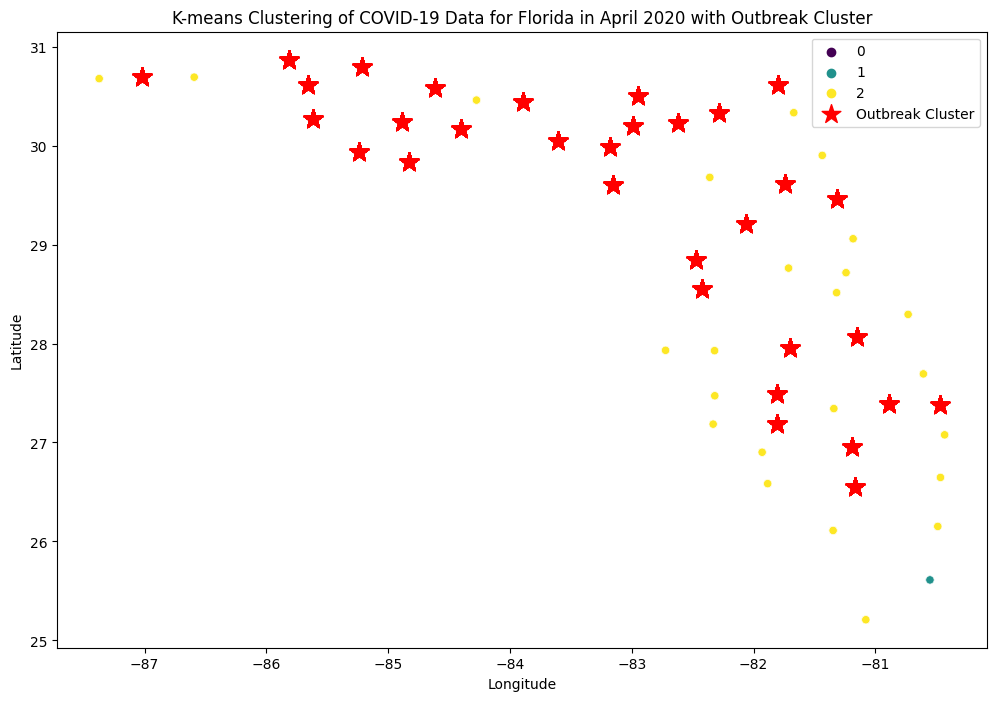

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       55.141509         2.066038             0.003002   
1                        8.352941         0.483193             0.007915   
2                        2.691898         0.130064             0.002464   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000455                   0.000495       4317.792453   
1              0.001140                   0.001278       4441.273109   
2              0.000195                   0.000194       4433.450426   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.066038        16.064474         10.13

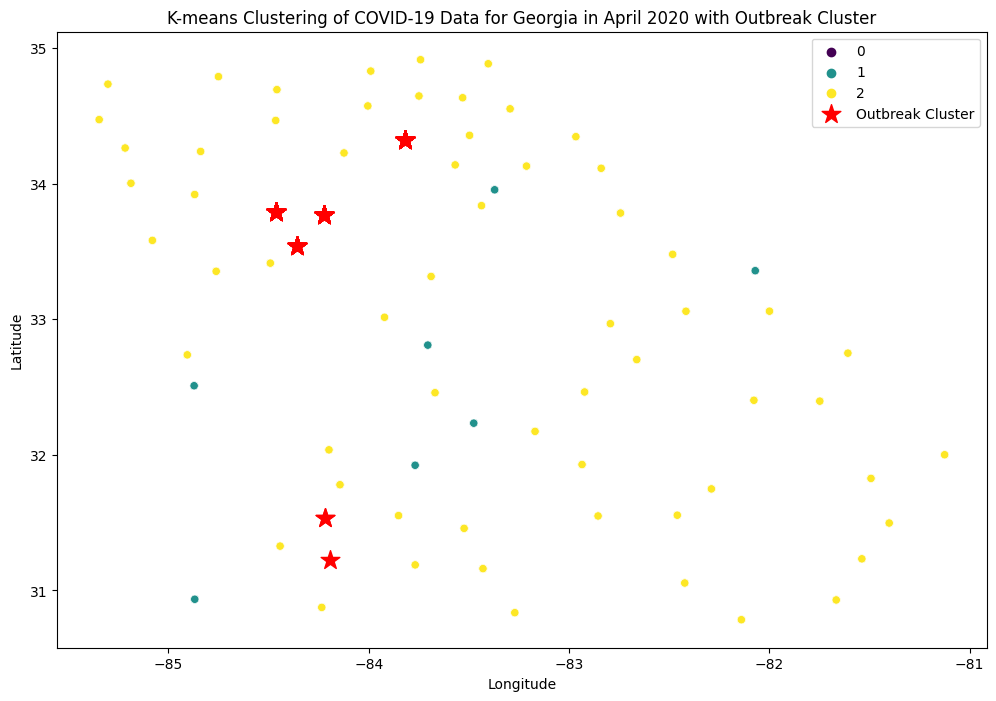

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.822350         0.191977             0.003974   
1                        7.563611         0.371409             0.001312   
2                     1067.233333        51.533333             0.002785   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000424                   0.000417       7888.464183   
1              0.000155                   0.000151       7789.381669   
2              0.000590                   0.000645       7821.400000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.702006        16.979977         11.6

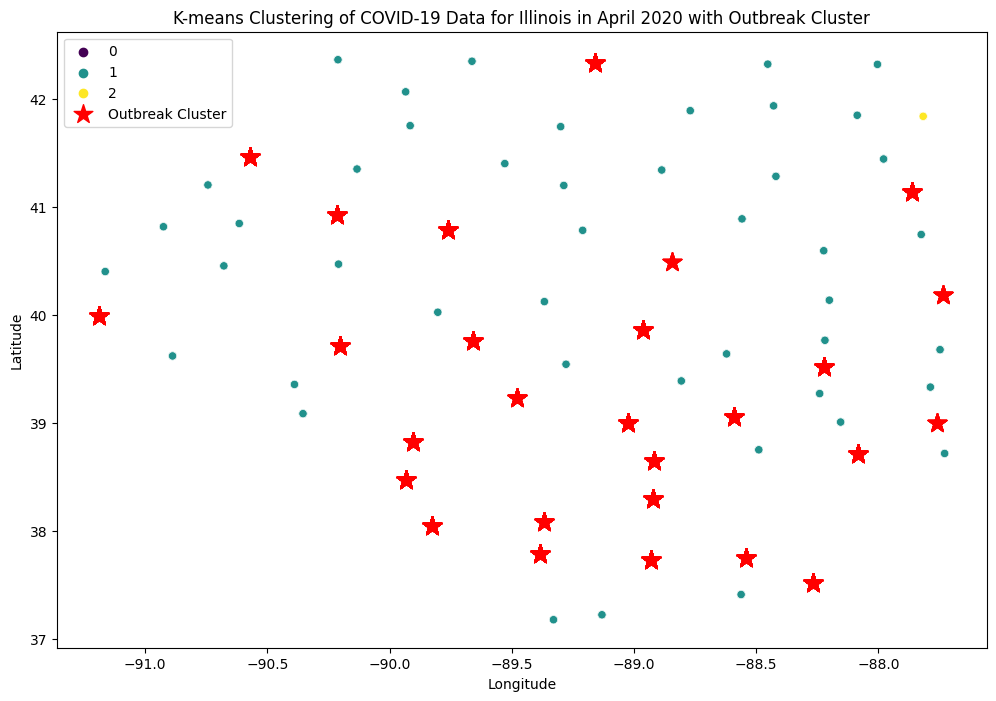

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       16.100000         1.374603             0.004384   
1                        5.771746         0.574232             0.001462   
2                      425.677419        56.064516             0.002470   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000481                   0.000494       5715.366667   
1              0.000151                   0.000143       5716.146501   
2              0.000392                   0.000341       5676.903226   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             5.993651        17.221376         10.5

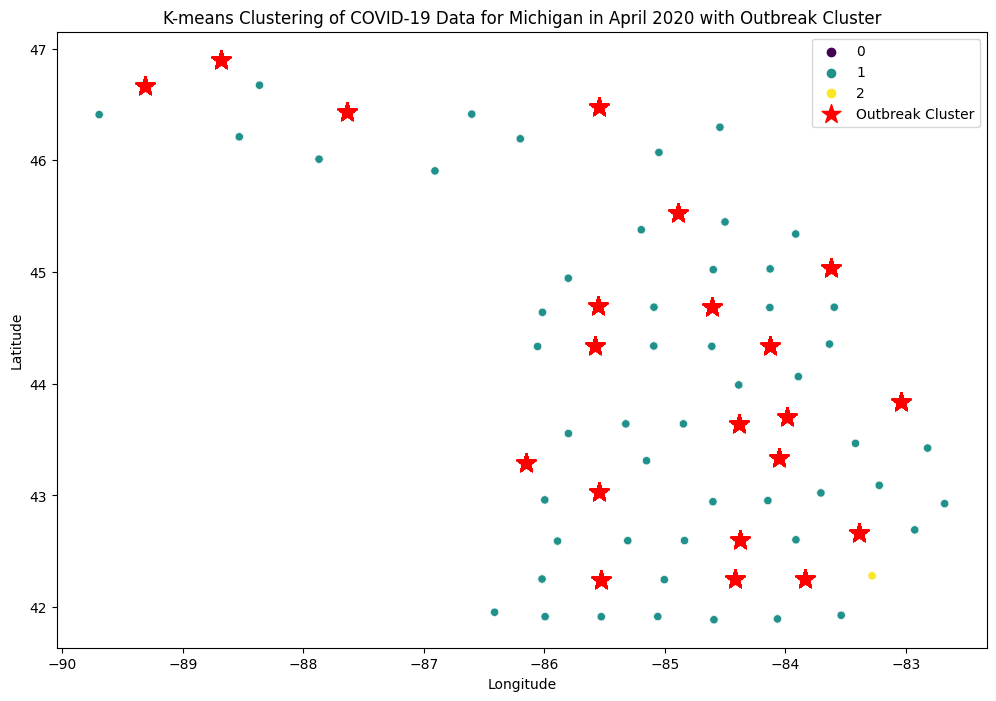

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      244.598972        15.812339             0.003701   
1                       11.918401         0.408826             0.002305   
2                     1258.733333       155.233333             0.001053   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000449                   0.000476      23188.249357   
1              0.000159                   0.000157      23179.534555   
2              0.000124                   0.000124      23181.666667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.493573        14.344412          9.5

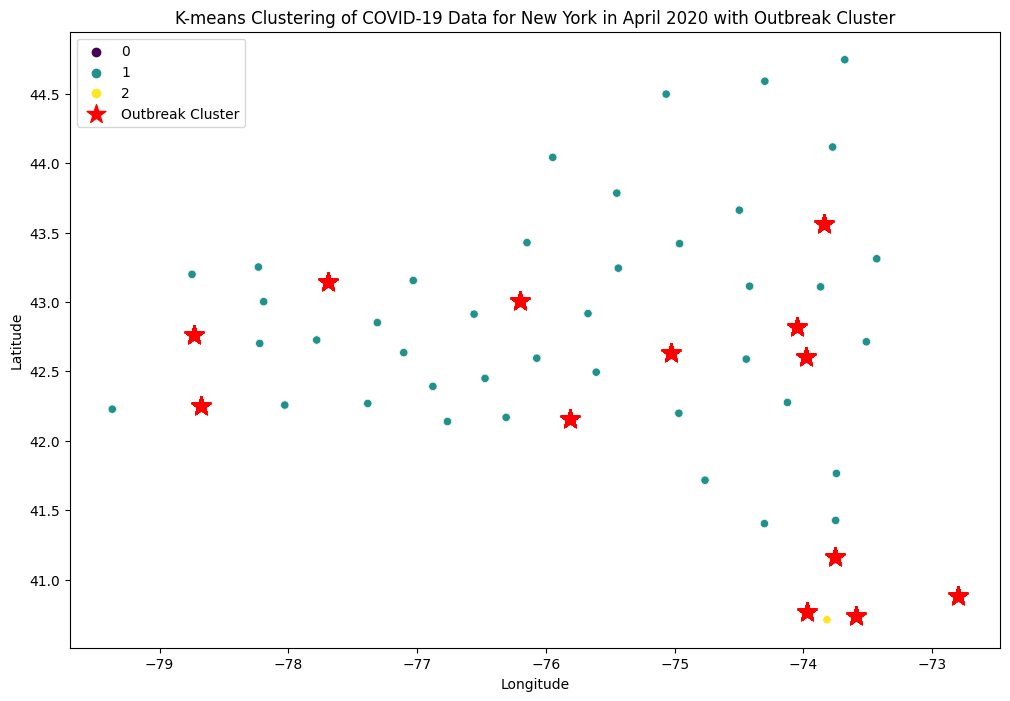

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.150000         0.133333             0.002744   
1                        4.419211         0.204835             0.001872   
2                        0.967280         0.028630             0.001118   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.003061                   0.003733       3497.666667   
1              0.000270                   0.000277       3536.939567   
2              0.000164                   0.000166       3434.540900   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.216667        17.971624       

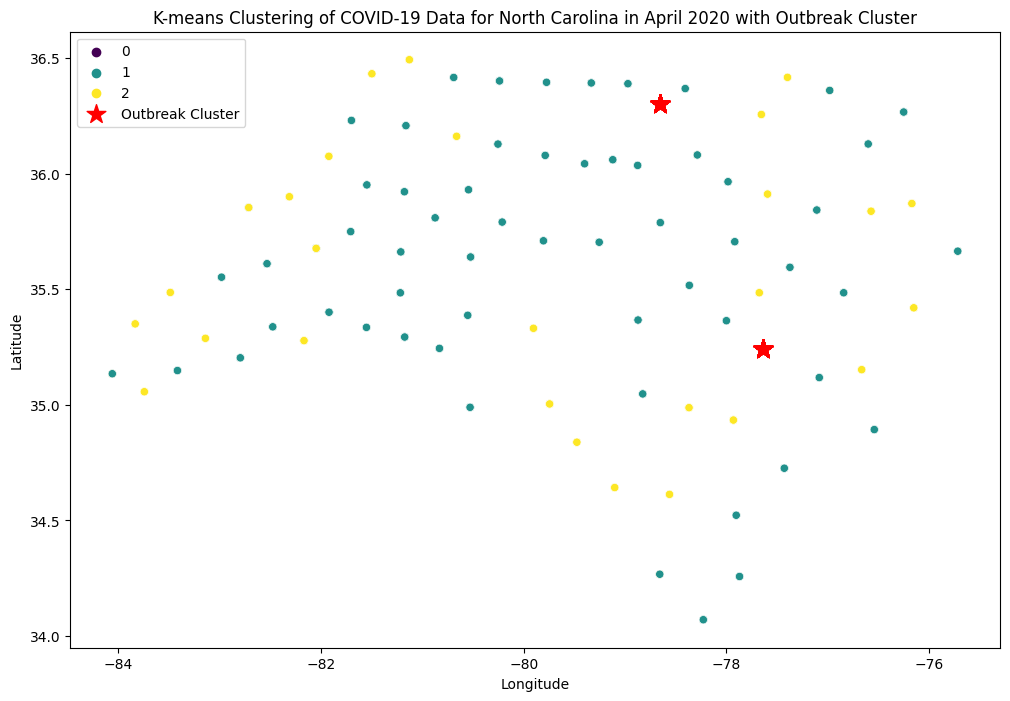

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       34.361314         1.609489             0.003586   
1                        2.475059         0.255344             0.001175   
2                        3.113695         0.116279             0.002218   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000627                   0.000665       3500.288321   
1              0.000160                   0.000153       3491.573634   
2              0.000221                   0.000203       3484.564599   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.631387        19.809189         12.07299

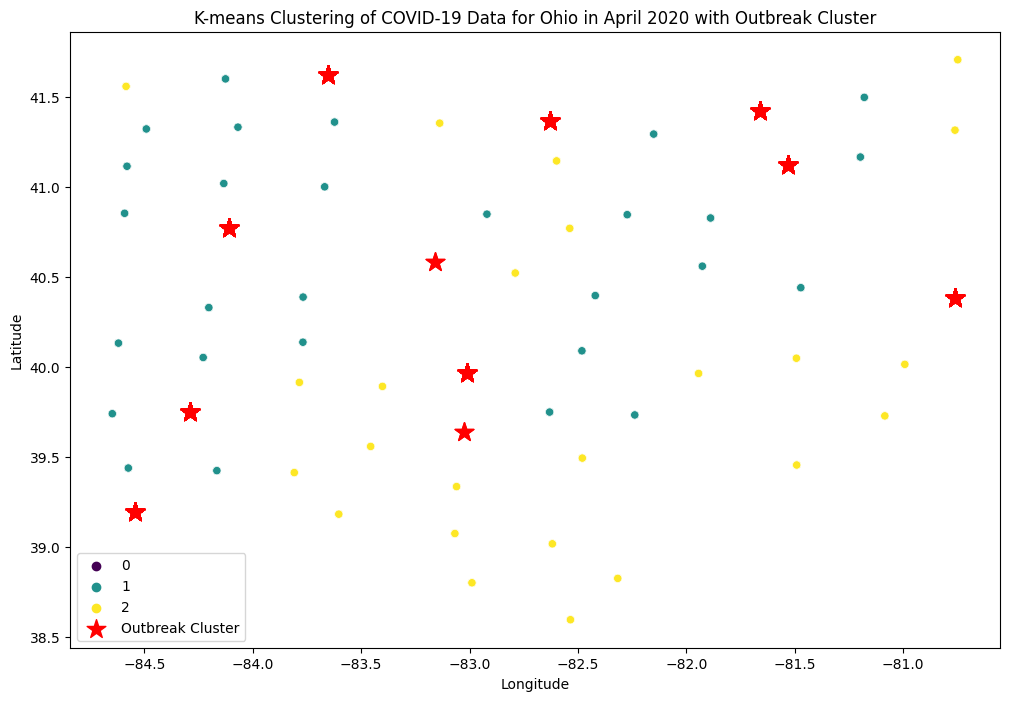

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.992048         0.669980             0.001061   
1                       92.936027         5.070707             0.003276   
2                        5.110227         0.313636             0.002723   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000120                   0.000117       6023.493042   
1              0.000540                   0.000572       5995.737374   
2              0.000218                   0.000212       5916.546591   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.481113        16.990195         

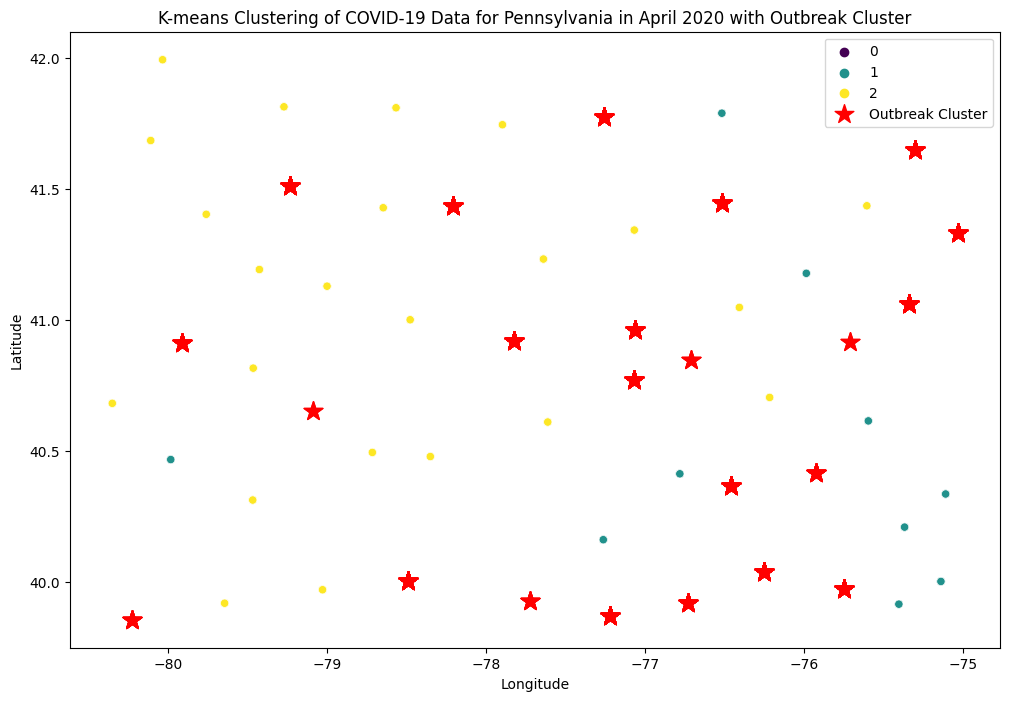

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.325870         0.070972             0.001431   
1                      111.112245         2.979592             0.002059   
2                        3.412821         0.164103             0.006965   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000250                   0.000254       9579.273291   
1              0.000396                   0.000416       9457.500000   
2              0.001358                   0.001444       9576.933333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.048381        14.947754         11.4824

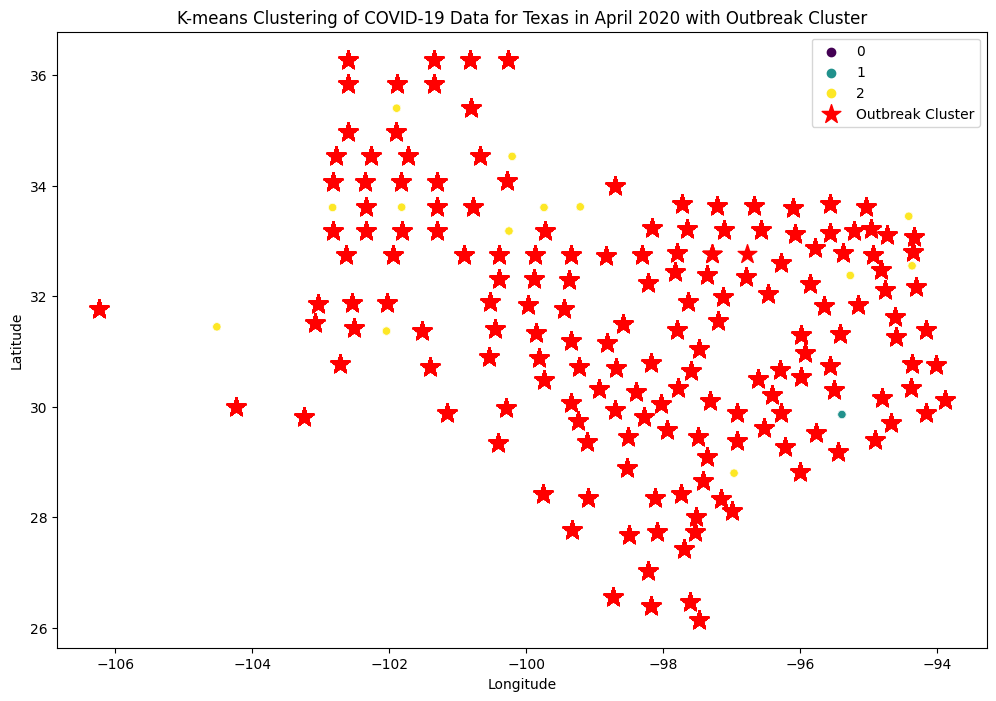

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       18.090909         0.524194             0.001390   
1                       17.228739         0.510264             0.003605   
2                     1026.258065        40.354839             0.001901   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000162                   0.000151      42564.870968   
1              0.000391                   0.000366      42564.870968   
2              0.000256                   0.000265      42564.870968   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.717742        11.924103          9

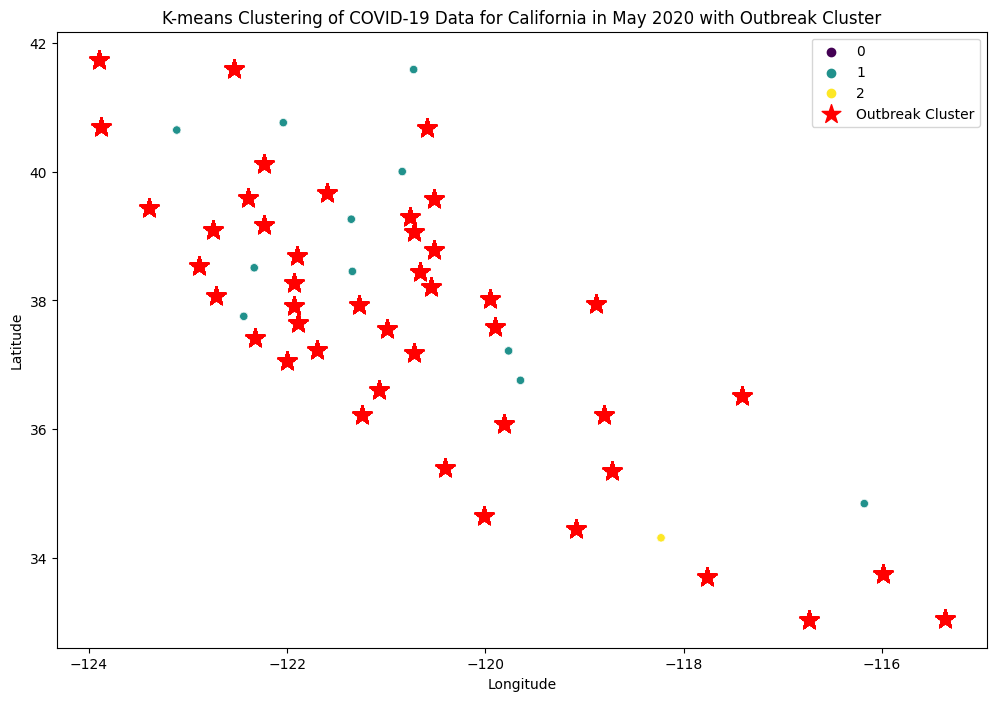

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       12.825871         0.671642             0.002375   
1                        2.653315         0.052486             0.000829   
2                      185.947368        11.342105             0.002381   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000389                   0.000401      20655.054726   
1              0.000108                   0.000102      20527.360497   
2              0.000444                   0.000472      21043.921053   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.449751        17.331447         11.44

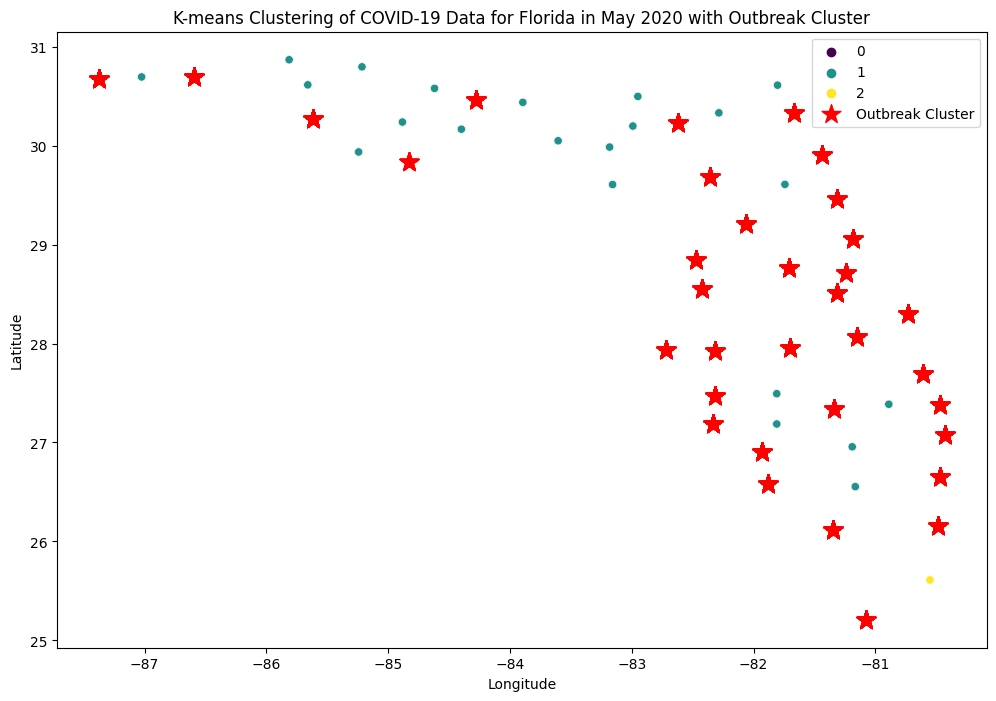

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       46.807692         2.259615             0.002955   
1                        2.466014         0.094748             0.002465   
2                        4.612903         0.274194             0.007891   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000455                   0.000494      12800.464362   
1              0.000195                   0.000194      13039.395554   
2              0.001139                   0.001277      13027.250469   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.346154        15.849442         10.00

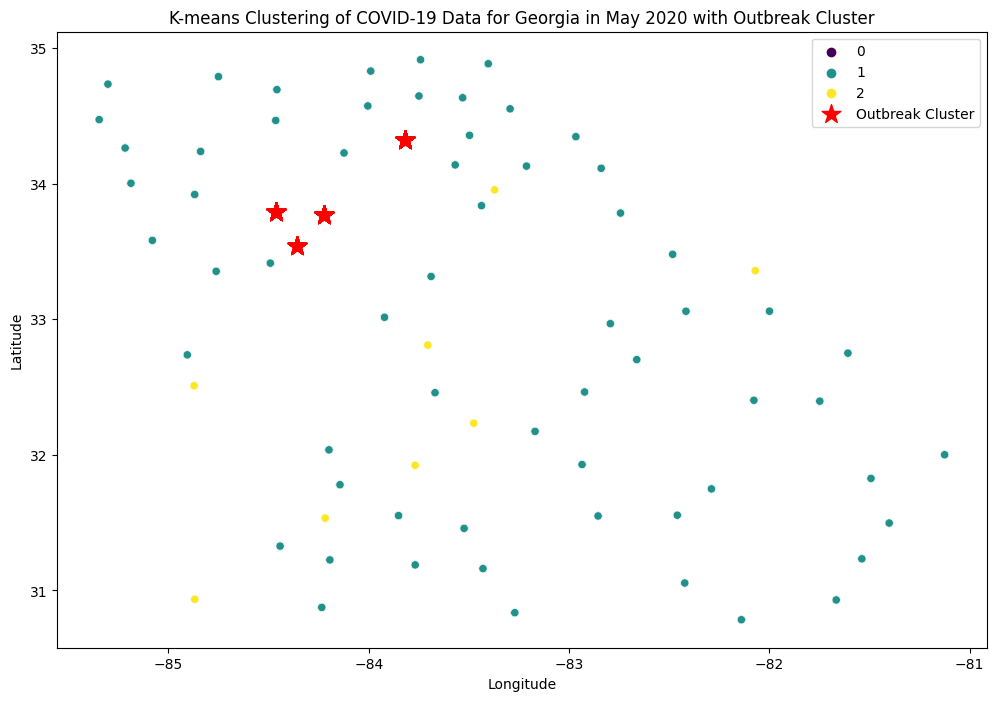

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.139973         0.313594             0.003934   
1                       13.550705         0.478845             0.001294   
2                     1335.870968        65.645161             0.002785   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000417                   0.000409      20277.419919   
1              0.000154                   0.000151      20267.361316   
2              0.000590                   0.000645      20270.709677   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.177658        16.997079         11.7

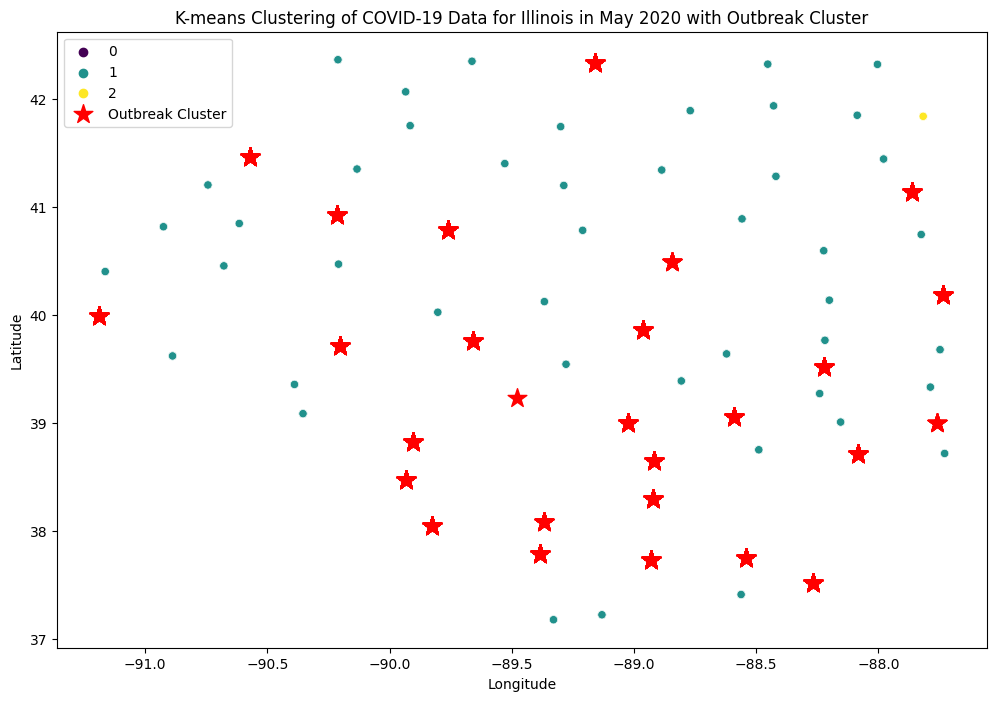

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      116.578947        21.078947             0.002519   
1                        7.639319         0.688854             0.004395   
2                        2.442685         0.261558             0.001462   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000388                   0.000345      13377.105263   
1              0.000481                   0.000495      13365.484520   
2              0.000151                   0.000143      13364.325522   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.631579        19.845334         11.2

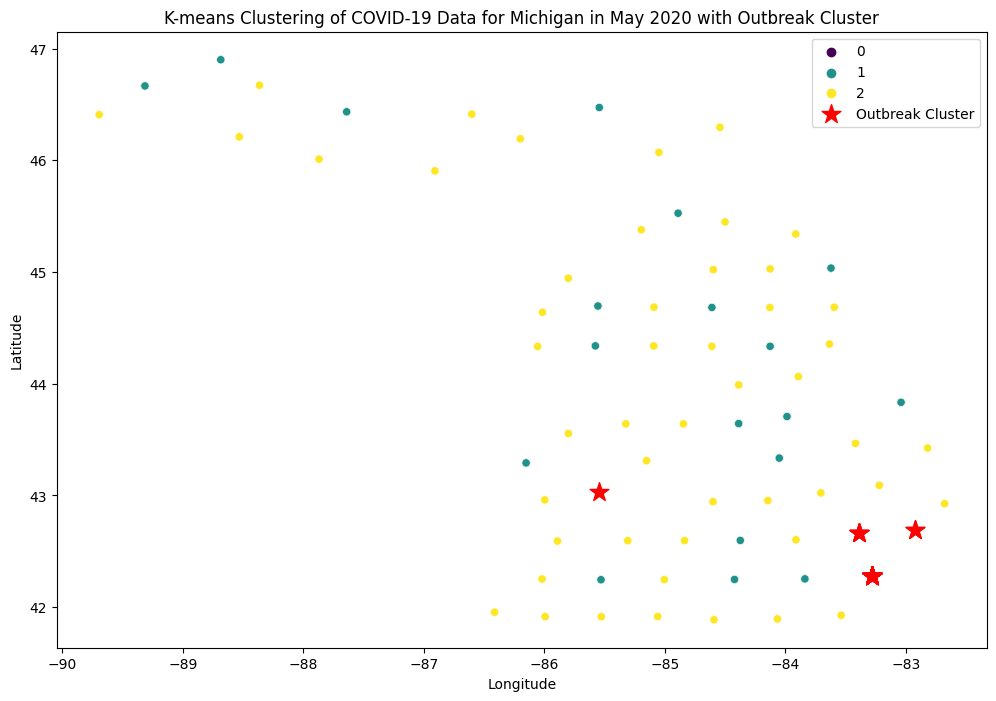

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      331.625000        44.937500             0.001081   
1                        5.272581         0.360484             0.002304   
2                       65.614428         6.507463             0.003705   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000126                   0.000125      37194.093750   
1              0.000159                   0.000156      37522.225806   
2              0.000449                   0.000476      37548.345771   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.406250        12.433956         10.8

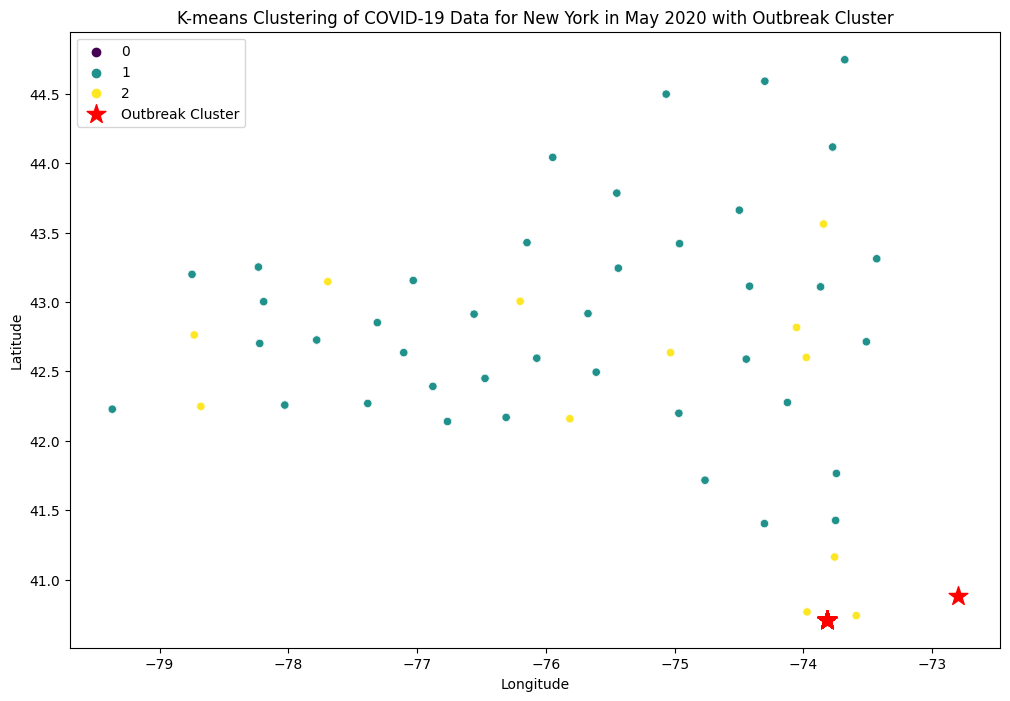

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.118607         0.079434             0.001173   
1                        7.958625         0.230186             0.001803   
2                        4.967742         0.145161             0.002744   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000174                   0.000177       9039.195865   
1              0.000259                   0.000265       9437.344988   
2              0.003061                   0.003733       9298.483871   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.549510        18.709087       

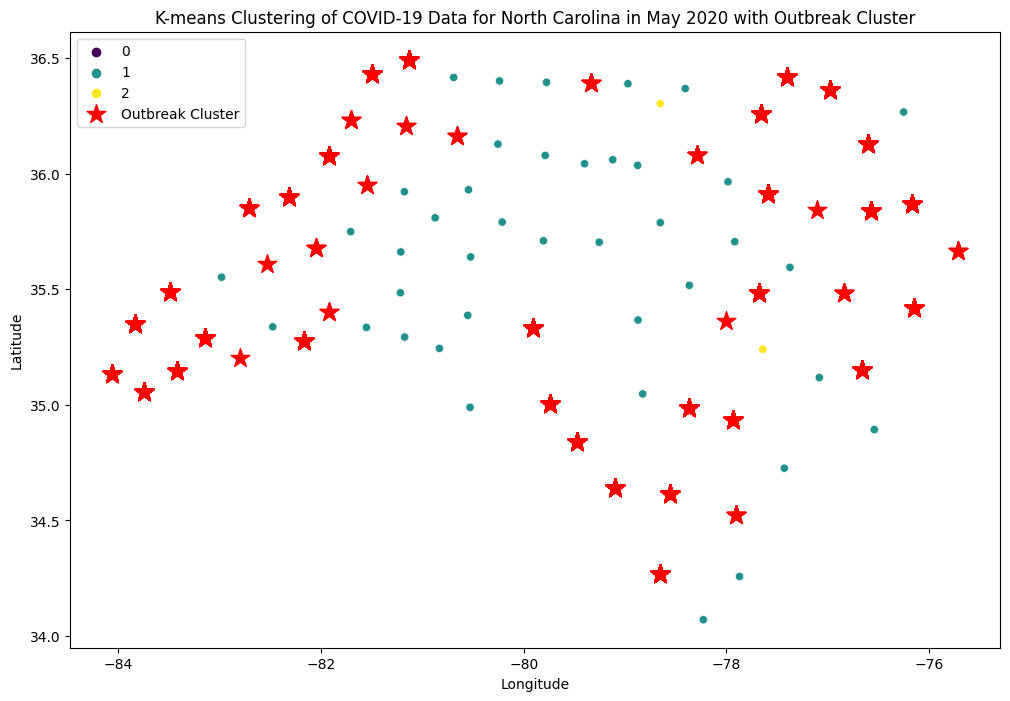

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       69.807018         5.087719             0.003528   
1                        4.807576         0.231818             0.003163   
2                        3.132316         0.191688             0.001121   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000558                   0.000565       8288.973684   
1              0.000390                   0.000388       8293.774242   
2              0.000146                   0.000139       8289.482612   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.403509        19.757808         10.70263

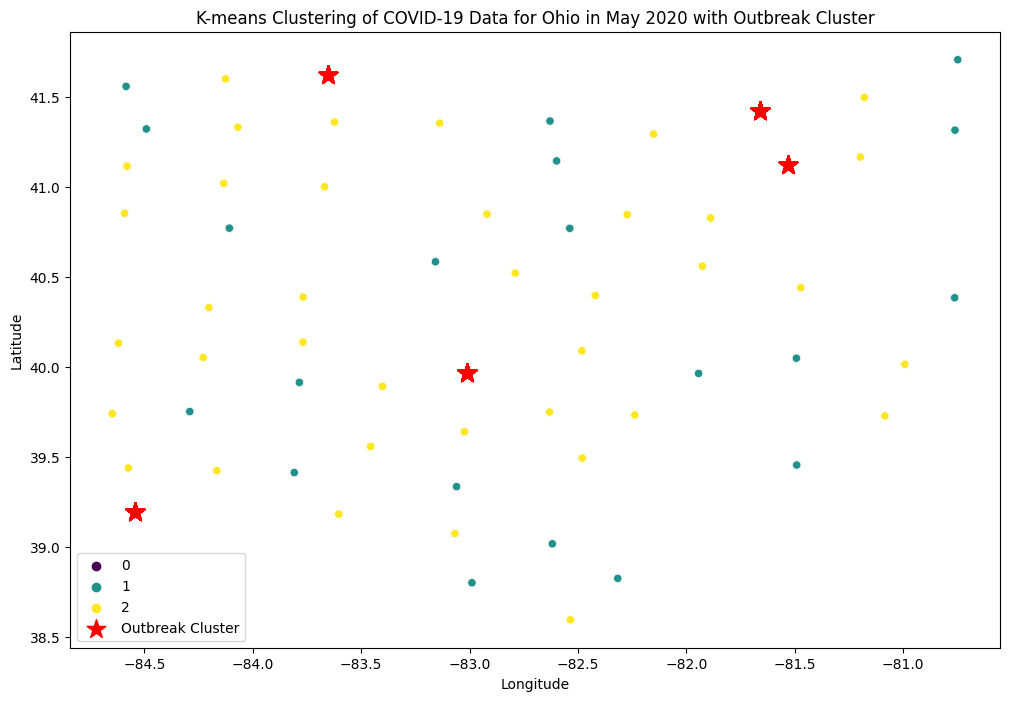

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.184638         0.400295             0.002160   
1                       54.361823         7.287749             0.003108   
2                        0.483871         0.032258             0.000560   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000184                   0.000179       7560.191285   
1              0.000498                   0.000526       7548.606838   
2              0.000083                   0.000083       7557.806452   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.022895        18.309358         

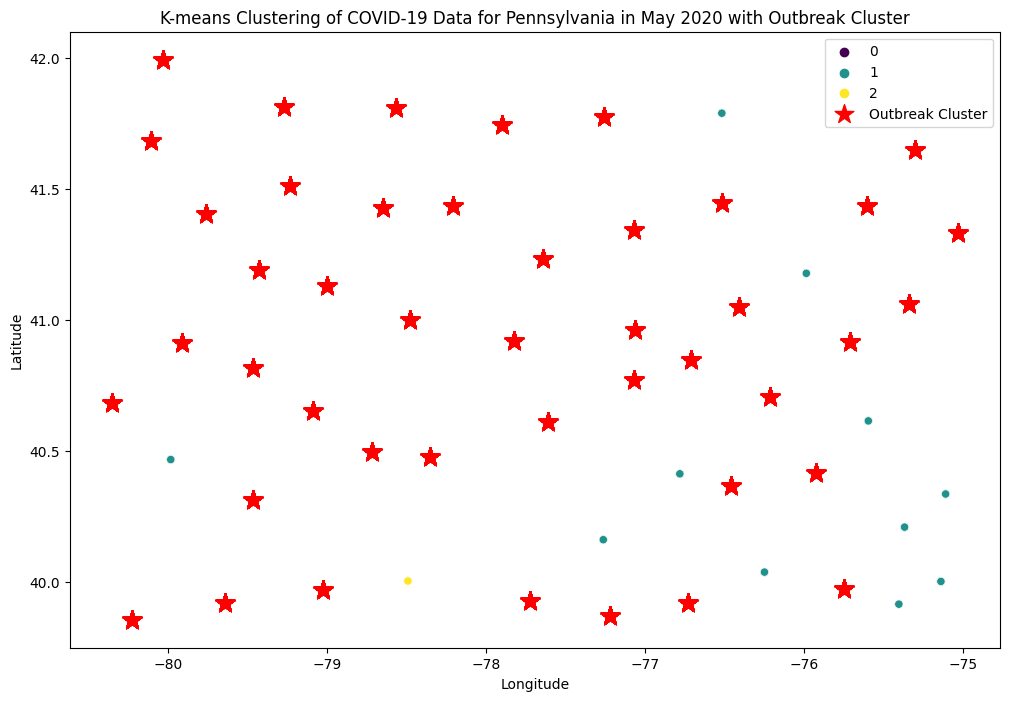

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.052783         0.073245             0.001486   
1                        4.323529         0.100000             0.007125   
2                      173.990385         4.163462             0.002105   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000255                   0.000259      20046.318225   
1              0.001476                   0.001573      20023.841176   
2              0.000409                   0.000432      20347.028846   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.511953        14.963689         11.5156

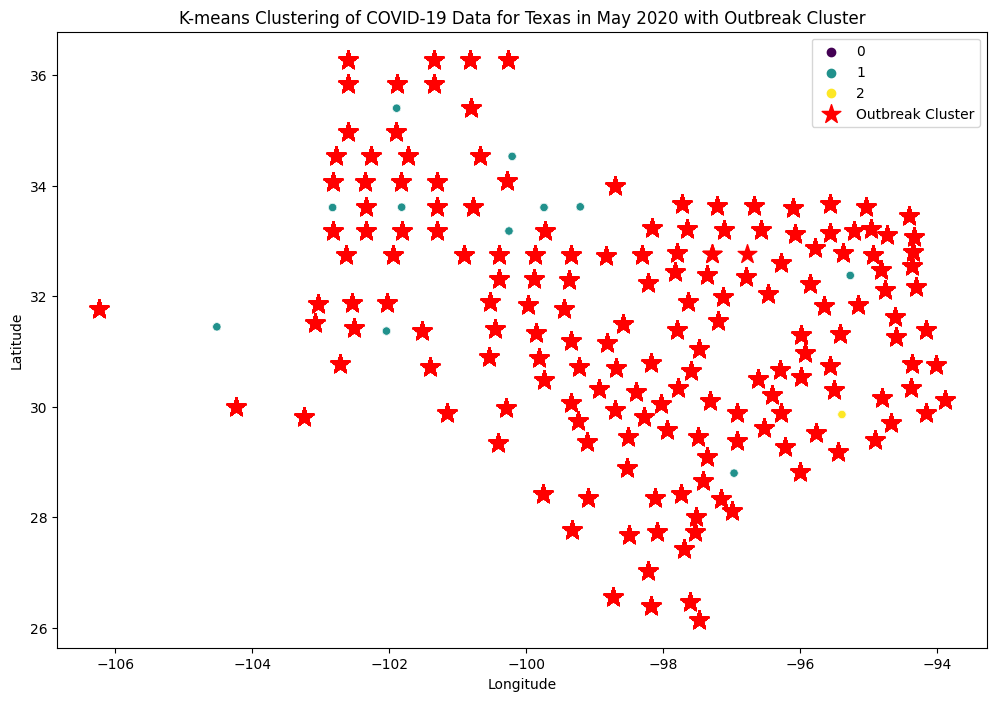

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       43.944218         0.582313             0.001431   
1                     1617.766667        33.566667             0.001901   
2                       24.405556         0.255556             0.005113   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000179                   0.000168      74076.366667   
1              0.000256                   0.000265      74076.366667   
2              0.000449                   0.000412      74076.366667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.376871        11.967247          9

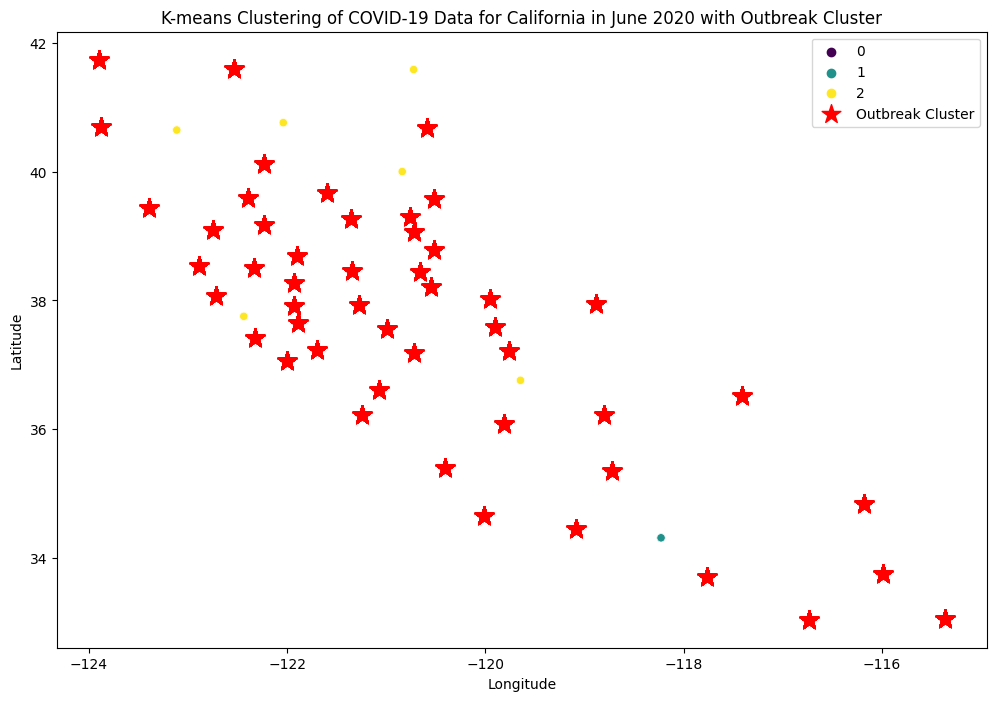

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       70.374753         0.697239             0.002348   
1                        5.154655         0.060060             0.000792   
2                      627.333333         9.700000             0.002349   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000385                   0.000397      30814.029586   
1              0.000099                   0.000093      30748.873874   
2              0.000463                   0.000493      30788.200000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.965483        17.362772         11.38

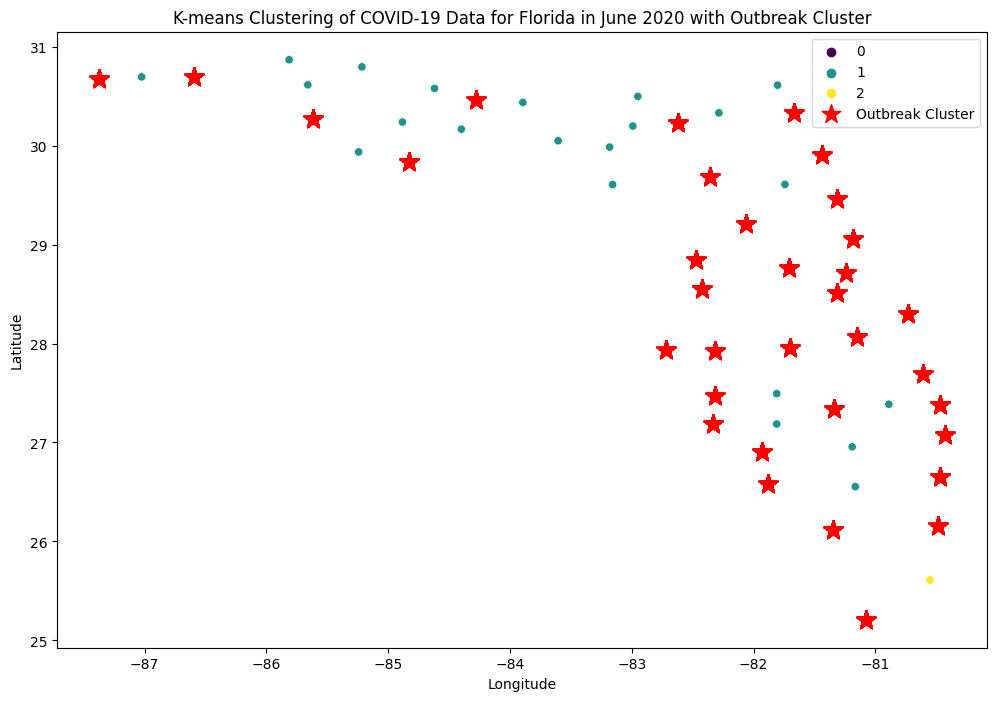

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       57.106557         1.557377             0.002834   
1                        4.510064         0.083157             0.002509   
2                       11.385714         0.380952             0.008295   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000410                   0.000439      12271.983607   
1              0.000200                   0.000201      12278.850106   
2              0.001224                   0.001369      12278.433333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        16.189459         10.24

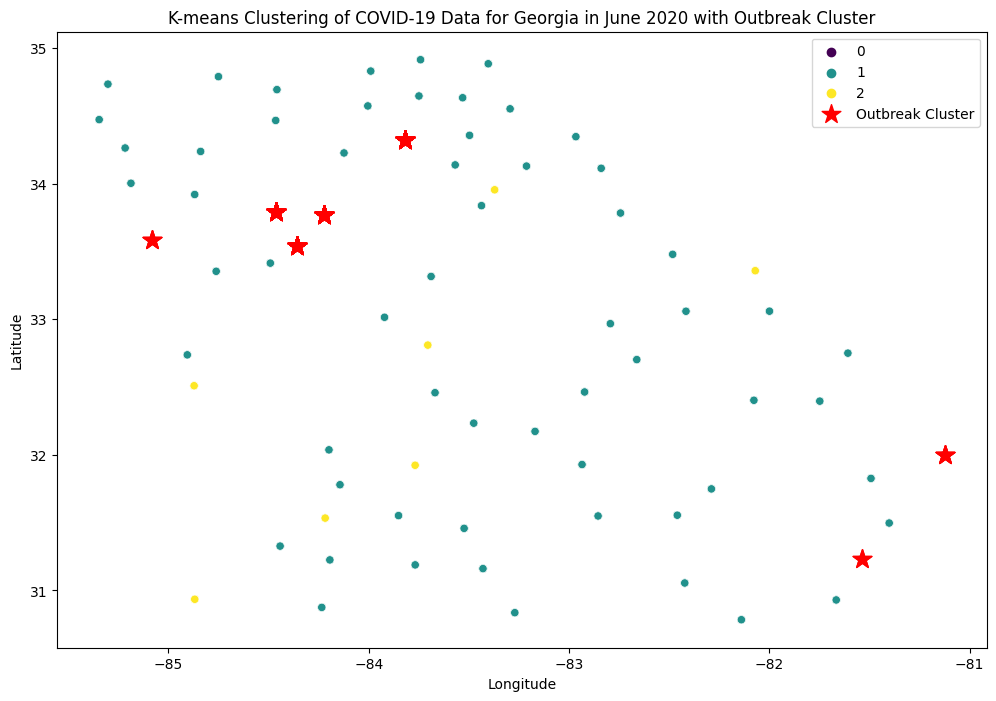

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      420.366667        30.766667             0.002785   
1                        4.358566         0.225764             0.003837   
2                        4.646766         0.297797             0.001282   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000590                   0.000645      23525.300000   
1              0.000413                   0.000407      23530.418327   
2              0.000150                   0.000146      23522.560768   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.933333        13.776183          9.5

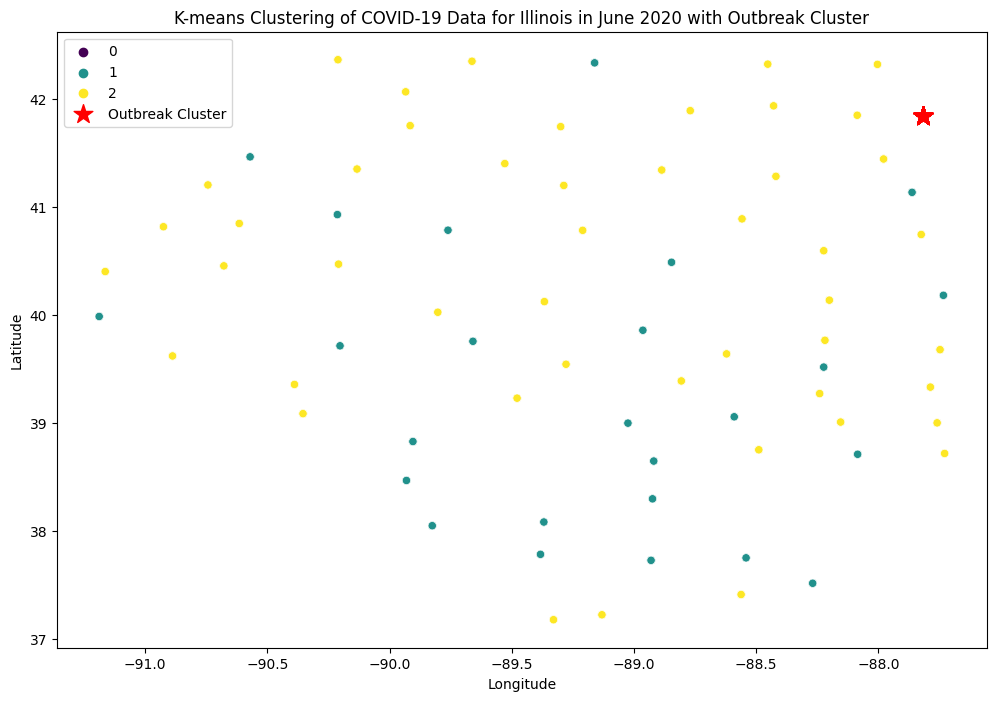

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.199387         0.656442             0.001964   
1                        0.666667         0.018141             0.001599   
2                        3.587879         0.115152             0.005282   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000213                   0.000205      13893.870143   
1              0.000158                   0.000152      13716.790249   
2              0.000598                   0.000624      13809.900000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.622699        17.351389         10.7

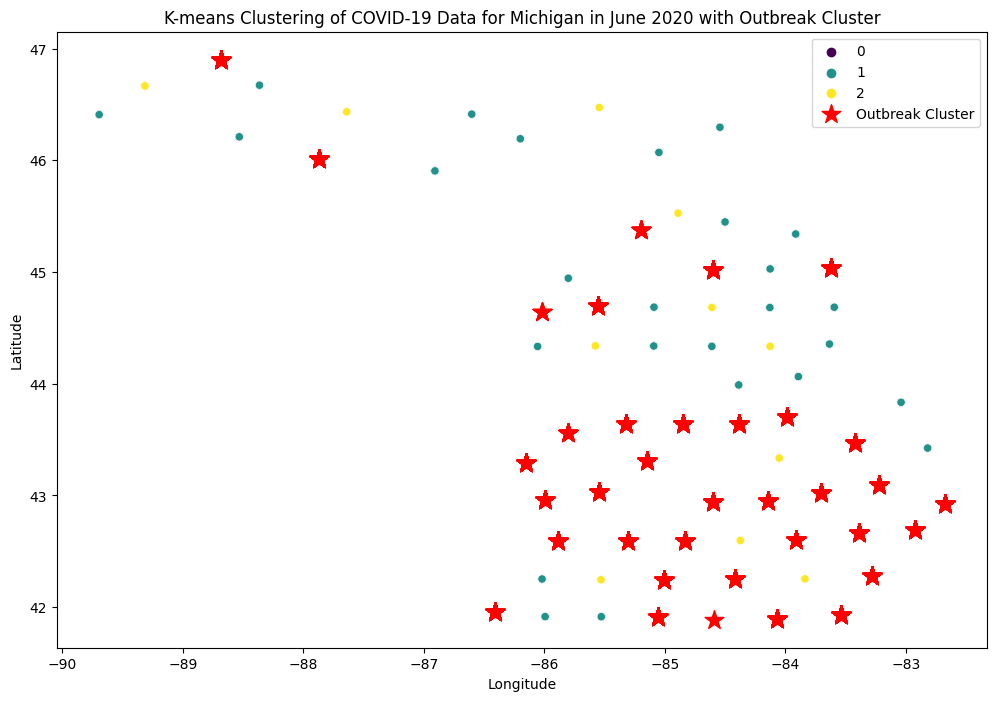

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      119.064516        26.290323             0.001082   
1                        1.996667         0.135833             0.002304   
2                       23.789203         1.557841             0.003705   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000126                   0.000125      61457.000000   
1              0.000159                   0.000156      61703.766667   
2              0.000449                   0.000476      61723.431877   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.483871        12.434155         10.8

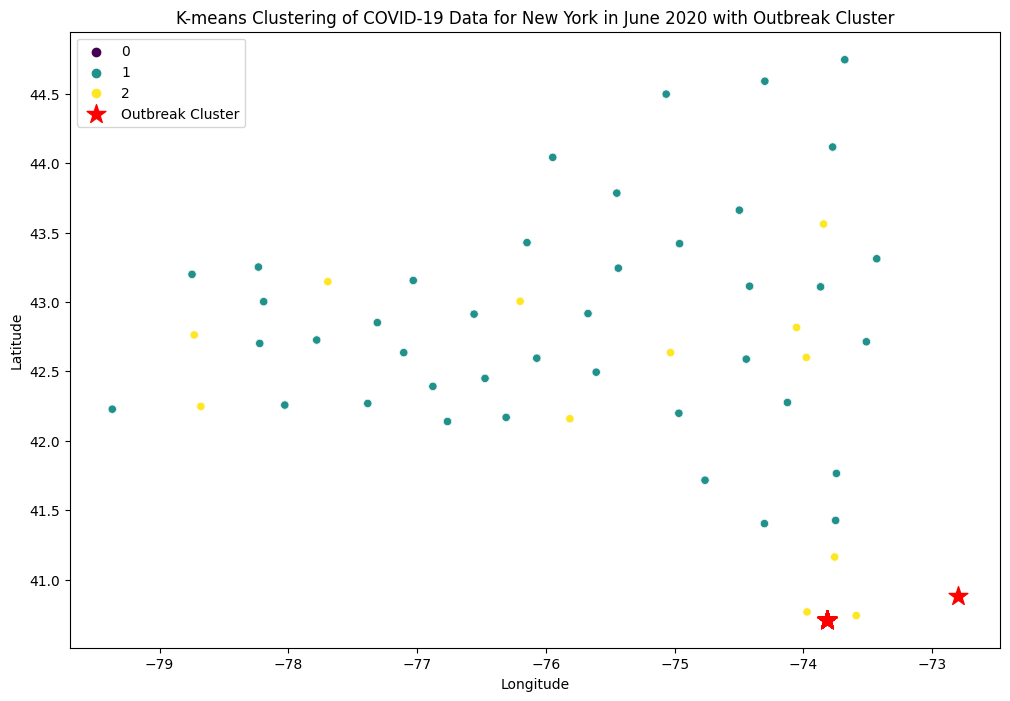

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.919277         0.089157             0.001163   
1                       18.453488         0.208140             0.001786   
2                       10.950000         0.216667             0.002744   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000179                   0.000183      16378.477108   
1              0.000254                   0.000259      16496.572093   
2              0.003061                   0.003733      16458.133333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.168675        18.955788       

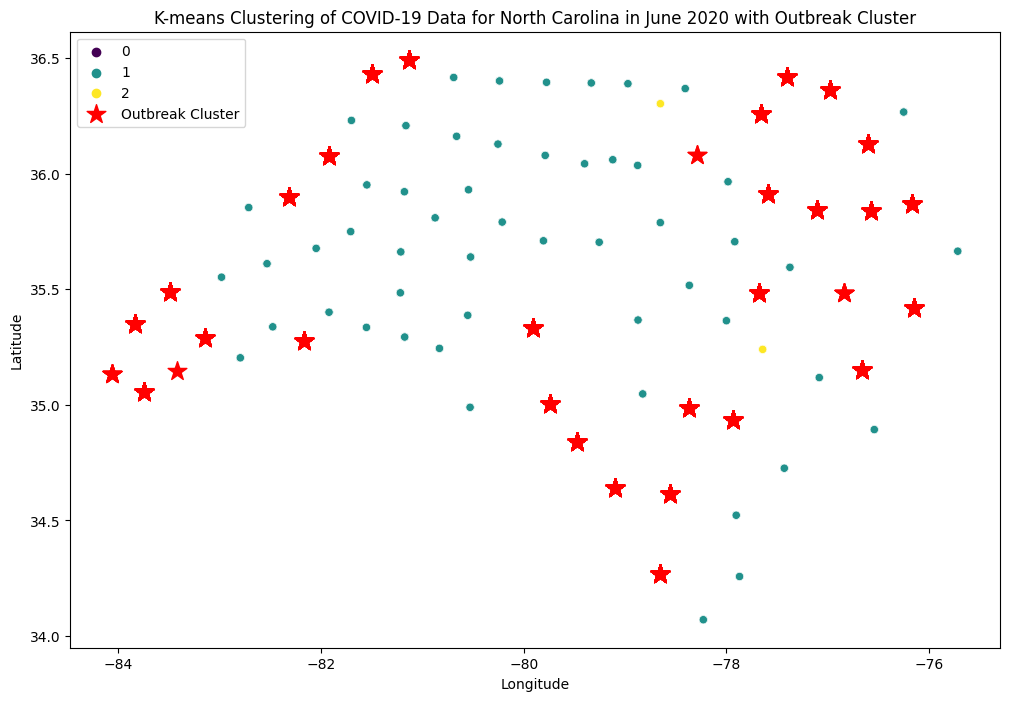

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.579825         0.083333             0.001121   
1                        5.037879         0.216667             0.003168   
2                       88.522222         3.788889             0.003563   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000146                   0.000139      13234.033333   
1              0.000398                   0.000396      13223.922727   
2              0.000541                   0.000544      13308.177778   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.490351        18.505697         12.30789

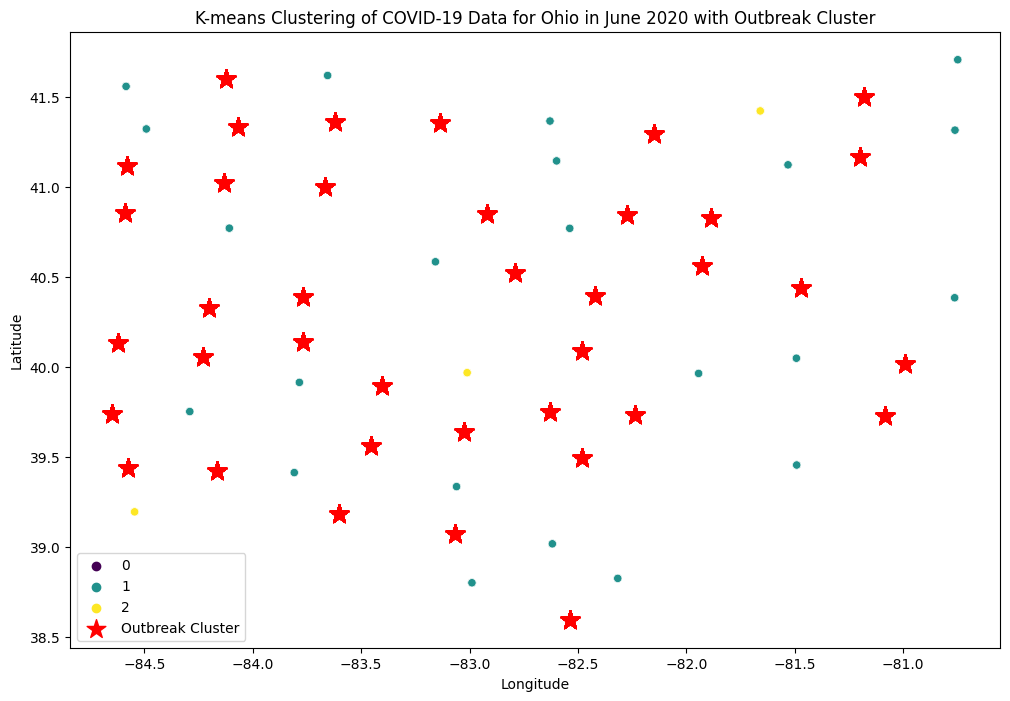

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.778707         0.115589             0.002166   
1                       30.898507         2.641791             0.003096   
2                        1.433333         0.033333             0.000560   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000185                   0.000180      10294.690494   
1              0.000496                   0.000524      10243.677612   
2              0.000083                   0.000083      10284.333333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.424335        18.336735         

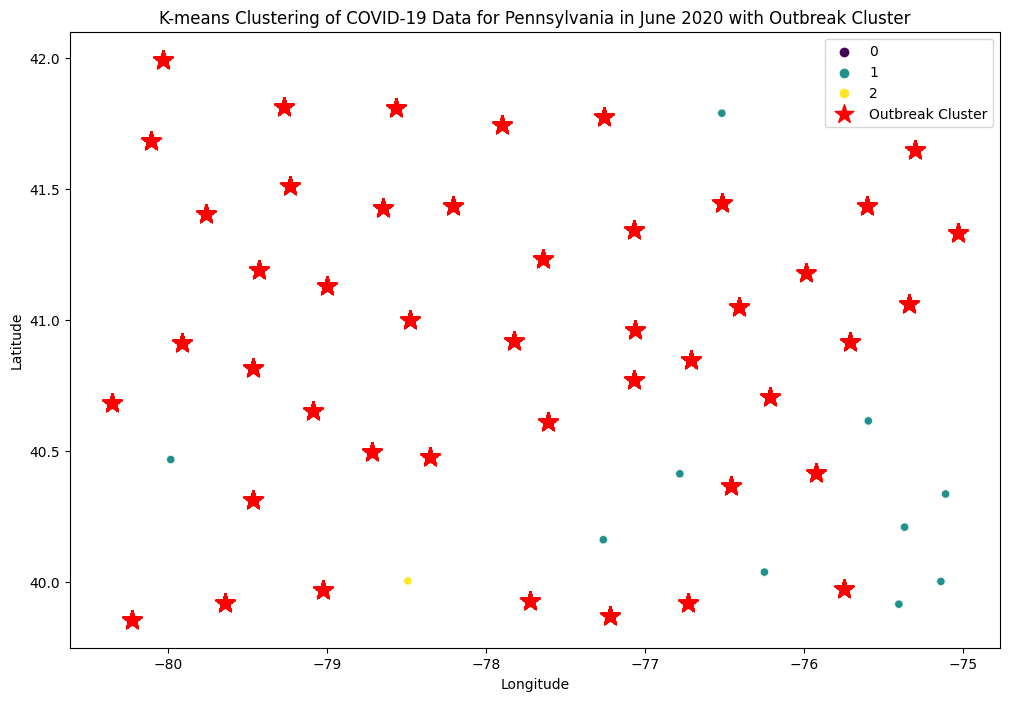

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        8.409497         0.055633             0.001483   
1                      383.858268         3.338583             0.002082   
2                        8.036364         0.027273             0.007124   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000254                   0.000258      30544.670574   
1              0.000409                   0.000436      32003.125984   
2              0.001479                   0.001578      30580.566667   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.622492        14.967862         11.5340

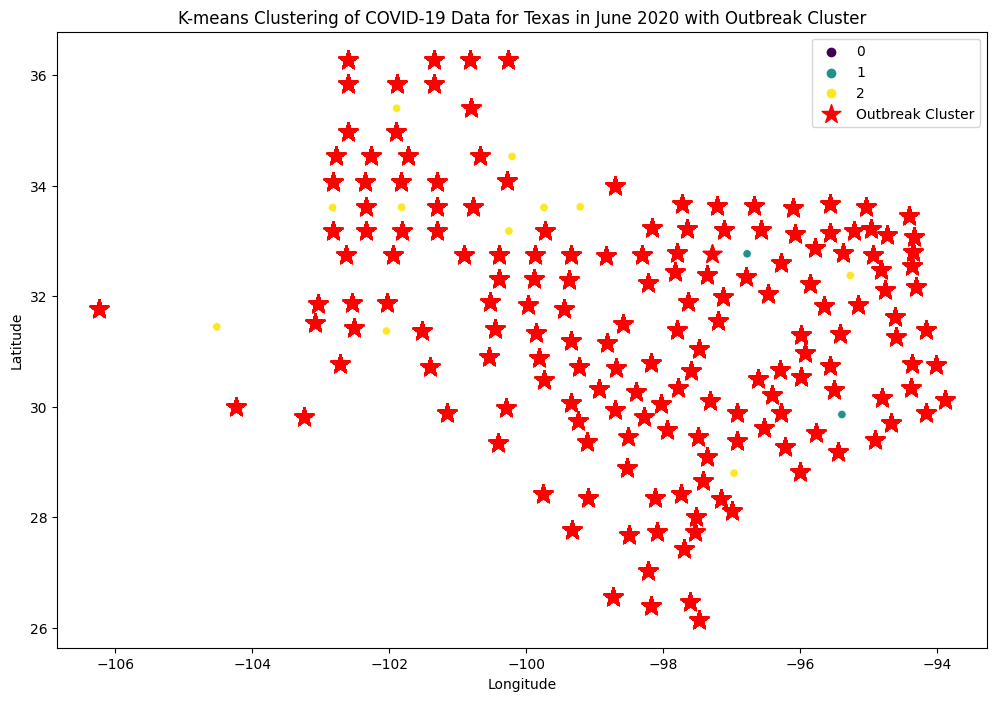

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      155.144526         1.480292             0.002564   
1                     3034.000000        44.714286             0.001901   
2                       76.486804         0.854350             0.001343   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000310                   0.000299     117517.827737   
1              0.000256                   0.000265     117945.785714   
2              0.000140                   0.000125     117552.608016   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.217518        11.385894          9

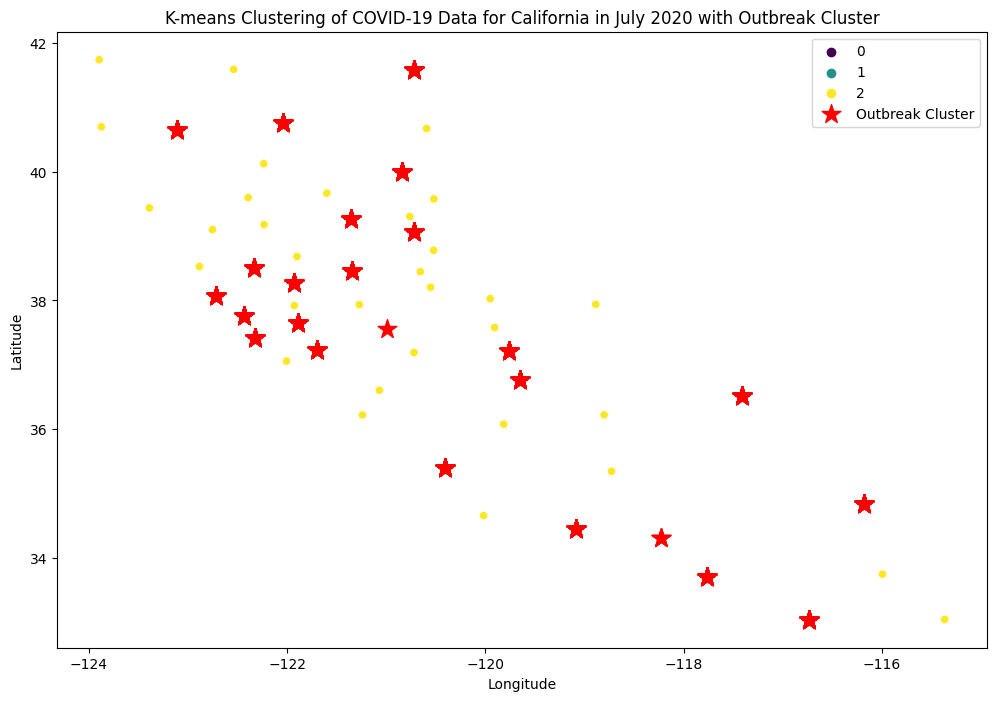

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       14.603093         0.171821             0.000827   
1                      183.308964         2.040035             0.002186   
2                     2463.944444        21.527778             0.002359   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000098                   0.000090      54161.843643   
1              0.000359                   0.000370      54372.515231   
2              0.000455                   0.000486      53891.333333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.209622        21.809770         15.05

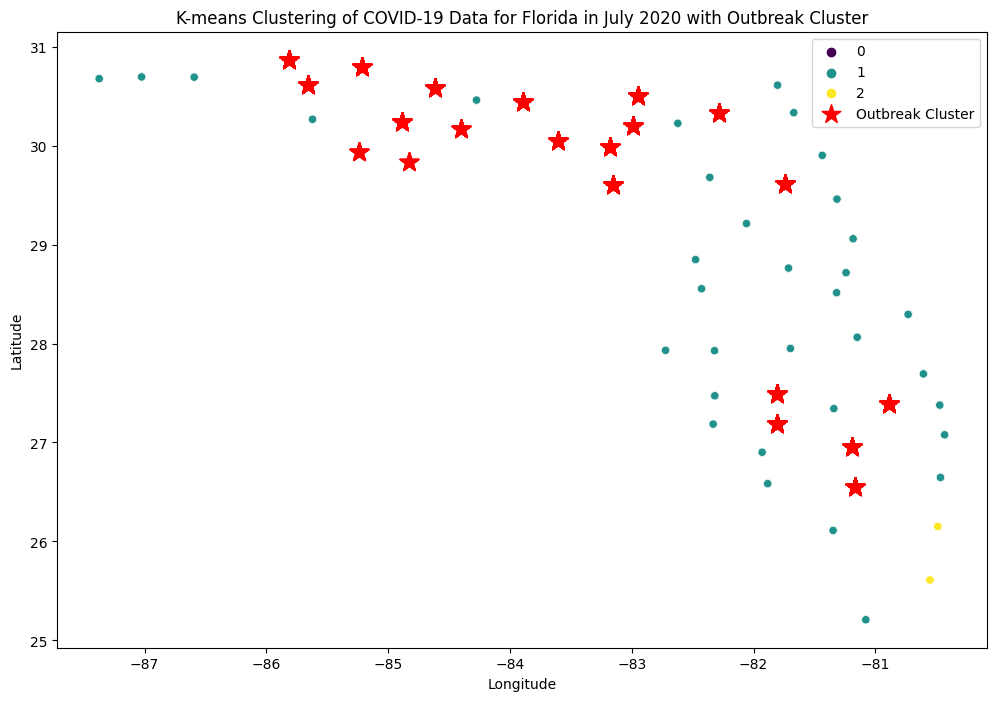

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       13.225000         0.130102             0.002509   
1                       41.834101         0.474654             0.008295   
2                      182.606838         1.564103             0.002861   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000200                   0.000201      23877.461735   
1              0.001224                   0.001369      23897.064516   
2              0.000431                   0.000464      24225.452991   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.996429        17.818559         14.66

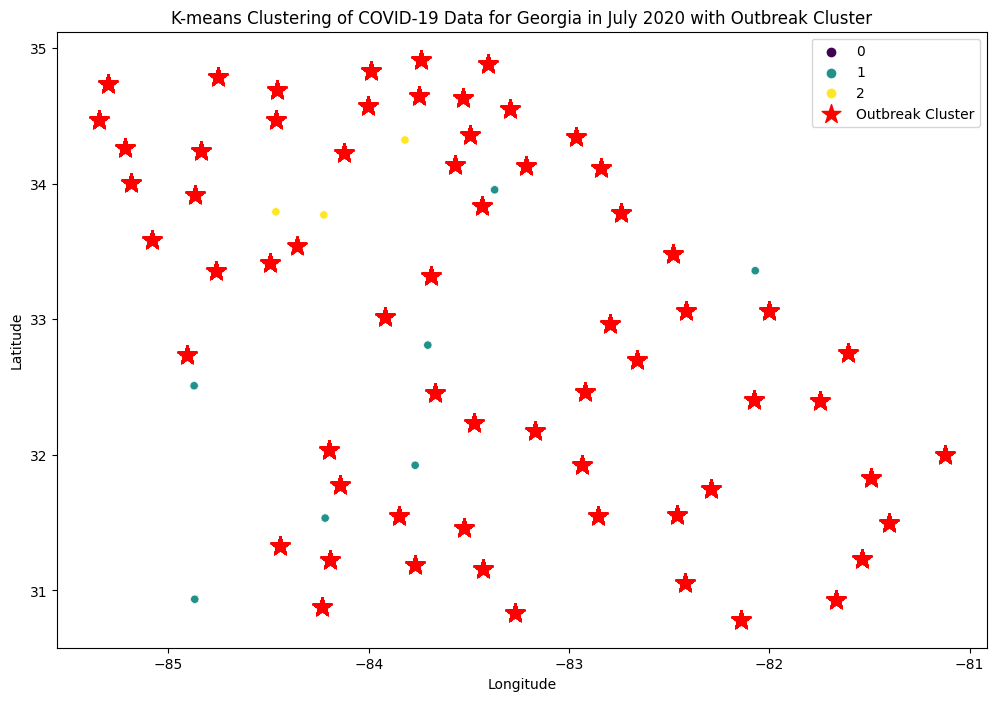

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      498.566667        10.700000             0.002785   
1                       10.273779         0.095116             0.003842   
2                        7.562887         0.109278             0.001280   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000590                   0.000645      35552.300000   
1              0.000413                   0.000407      35370.293059   
2              0.000150                   0.000146      35384.196564   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        13.776183          9.5

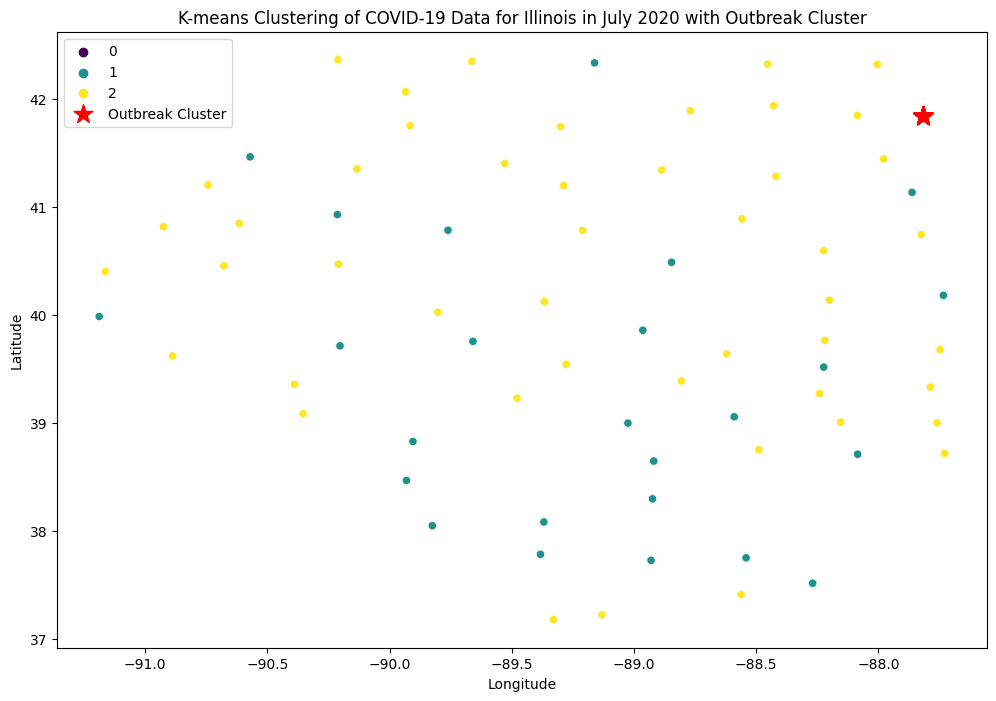

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      129.277778         2.425926             0.002485   
1                        3.939606         0.035601             0.001462   
2                        9.676101         0.094340             0.004417   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000371                   0.000341      28681.925926   
1              0.000150                   0.000143      25740.873490   
2              0.000482                   0.000496      25654.484277   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.944444        18.560604         10.8

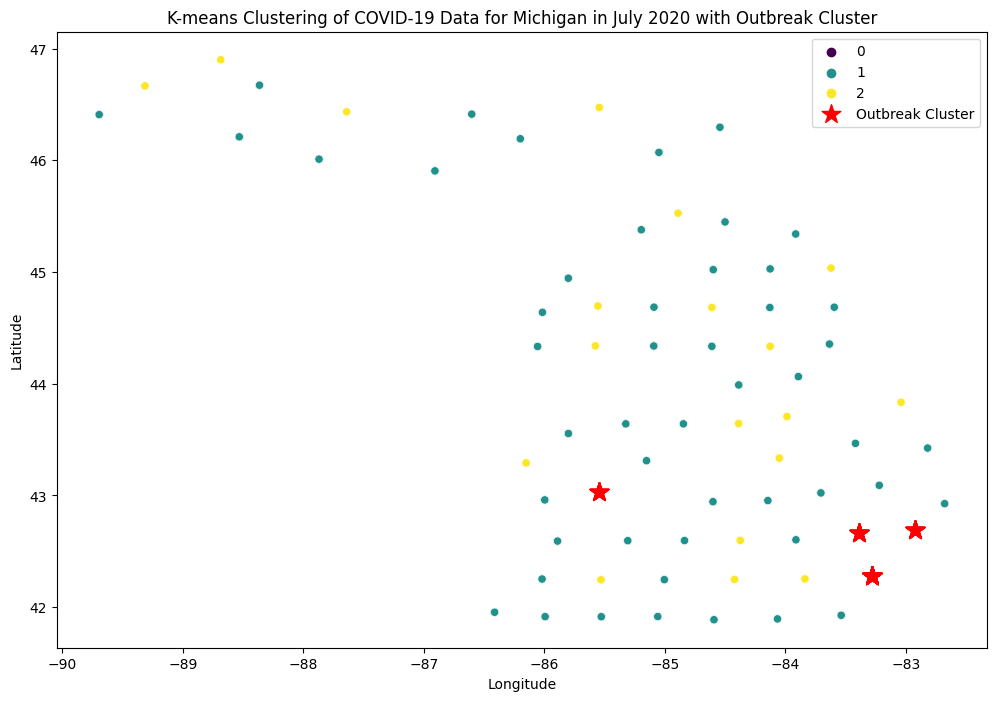

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       84.250000         3.906250             0.001081   
1                       25.111663         0.401985             0.003702   
2                        2.238095         0.037934             0.002304   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000126                   0.000125      63745.718750   
1              0.000449                   0.000476      63689.119107   
2              0.000159                   0.000156      63684.881356   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        12.433956         10.8

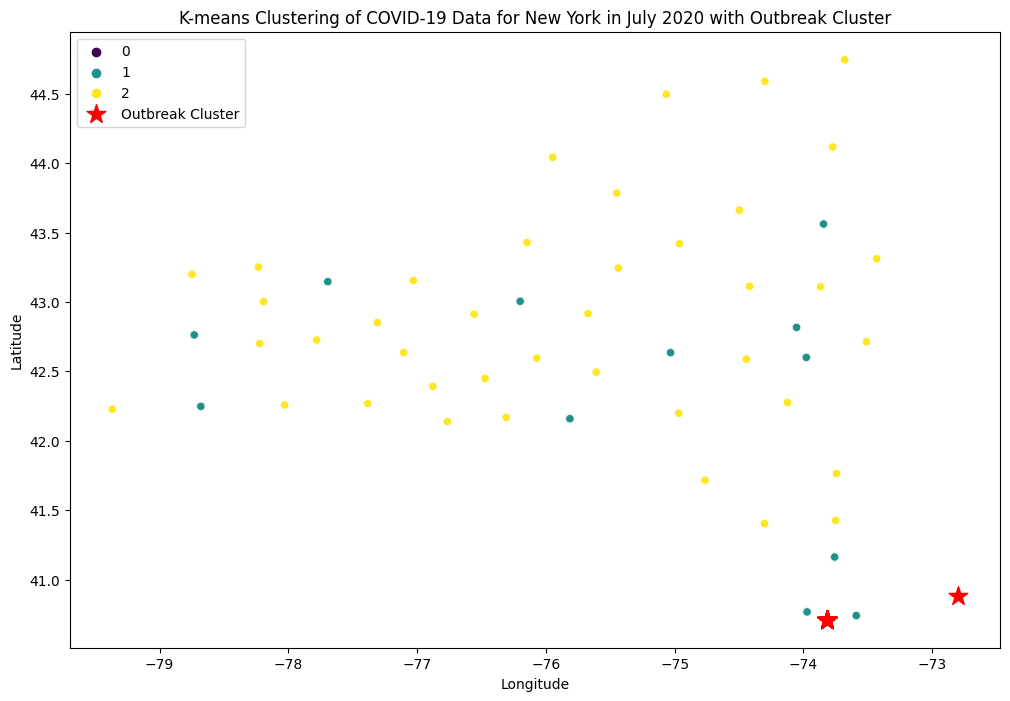

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.911905         0.079762             0.001152   
1                       27.845682         0.272981             0.001784   
2                        8.064516         0.096774             0.002744   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000179                   0.000183      27341.204762   
1              0.000254                   0.000258      27317.132591   
2              0.003061                   0.003733      27324.806452   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.296429        18.994119       

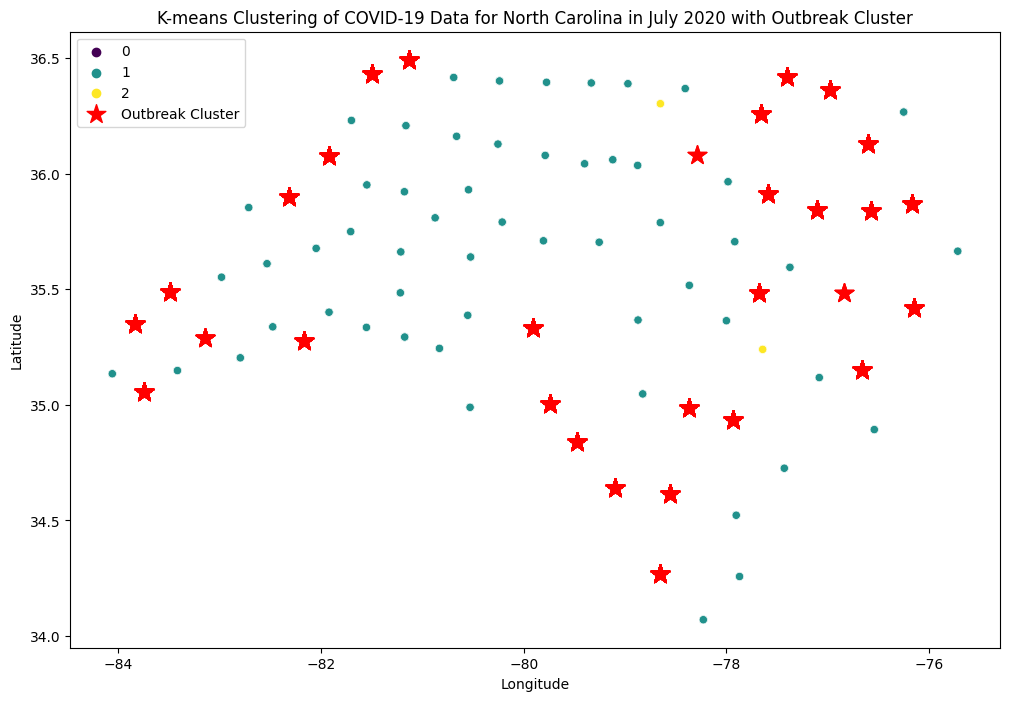

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.630835         0.119779             0.001621   
1                        0.129032         0.032258             0.000000   
2                       78.448980         1.166667             0.003991   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000190                   0.000178      21932.629607   
1              0.000000                   0.000000      21948.548387   
2              0.000624                   0.000664      22036.697279   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.775184        19.060884         12.76787

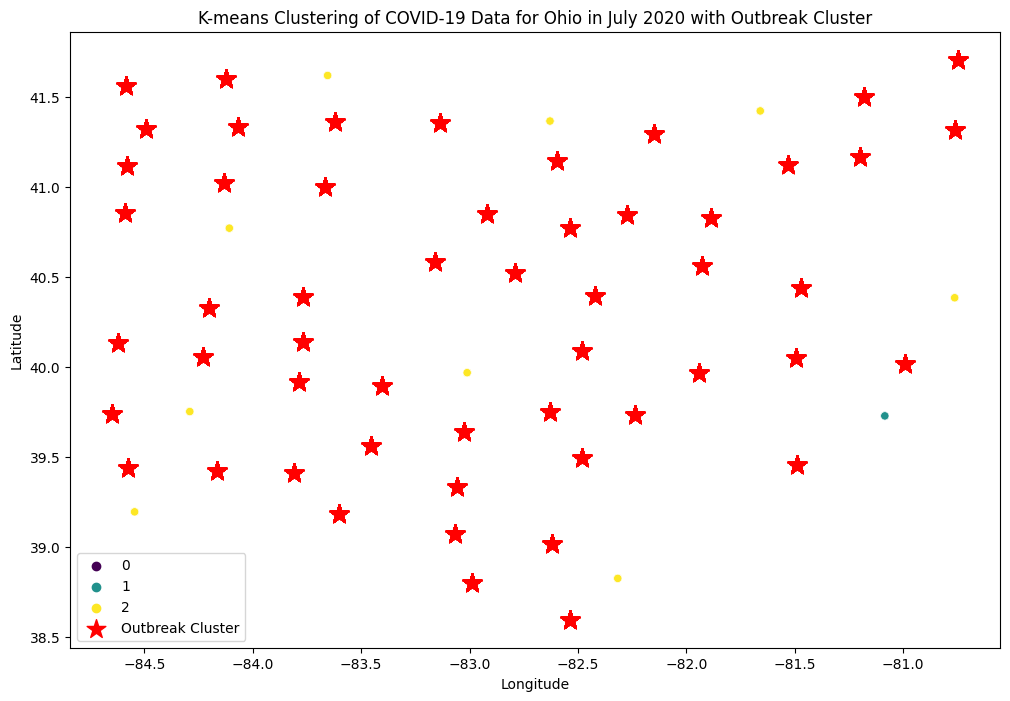

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.008172         0.076523              0.00217   
1                        1.483871         0.032258              0.00056   
2                       47.757660         1.103064              0.00305   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000184                   0.000179      14551.488113   
1              0.000083                   0.000083      14602.741935   
2              0.000488                   0.000516      14794.908078   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.517831        18.343551         

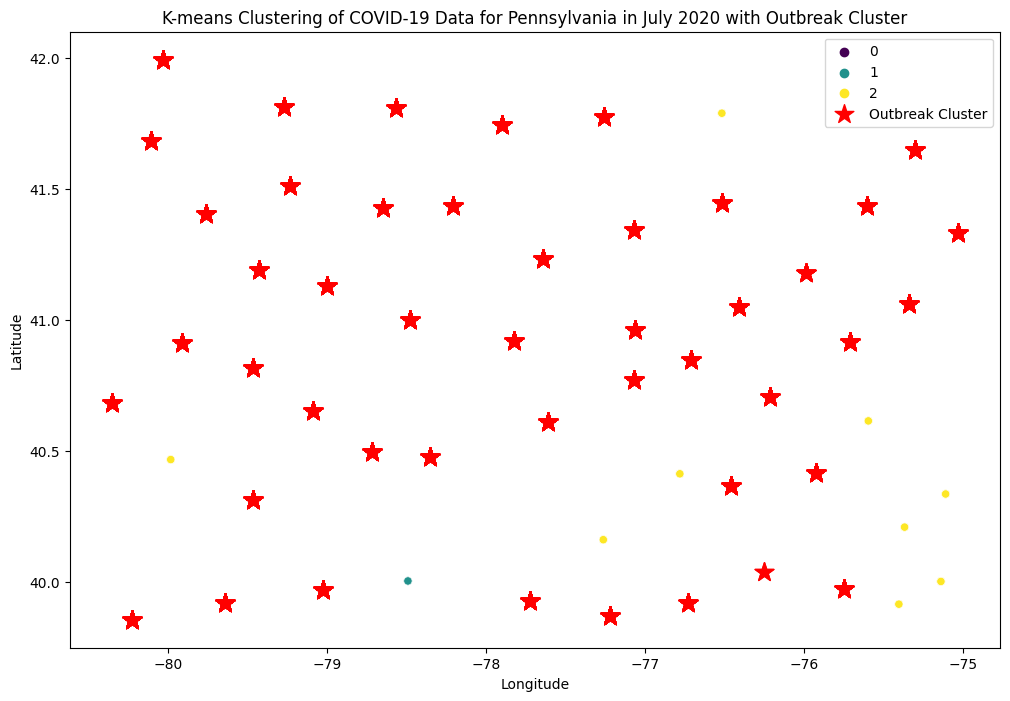

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.833424         0.104178             0.001547   
1                       69.315308         1.081545             0.001476   
2                       25.411940         0.143284             0.007169   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000277                   0.000274      58039.145415   
1              0.000249                   0.000256      58102.282403   
2              0.001487                   0.001593      58066.829851   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             6.597938        14.942279          9.3413

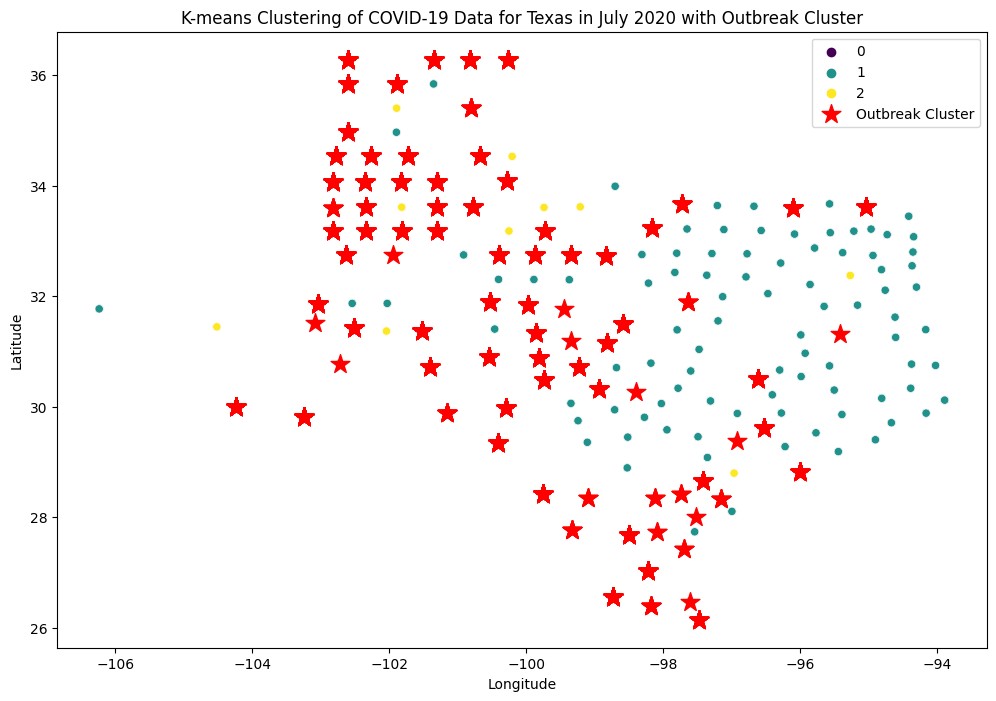

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                     1616.888889        39.111111             0.001856   
1                      101.064615         1.344615             0.003684   
2                       87.219636         1.415273             0.001396   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000255                   0.000263     115350.583333   
1              0.000396                   0.000370     114672.830769   
2              0.000164                   0.000153     114956.722182   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.916667        11.087854          8

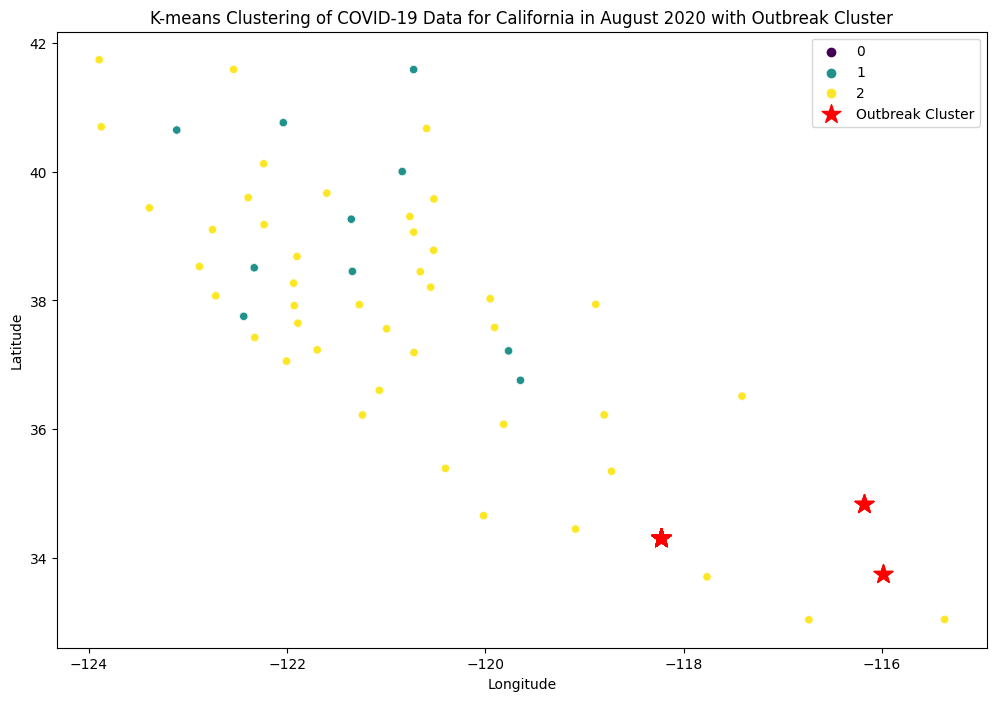

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       15.317901         0.242284             0.000810   
1                       86.032377         2.755782             0.002279   
2                     1139.131579        27.578947             0.002363   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000106                   0.000100      31769.762346   
1              0.000370                   0.000381      31876.392229   
2              0.000452                   0.000484      32618.973684   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.966049        21.588202         14.65

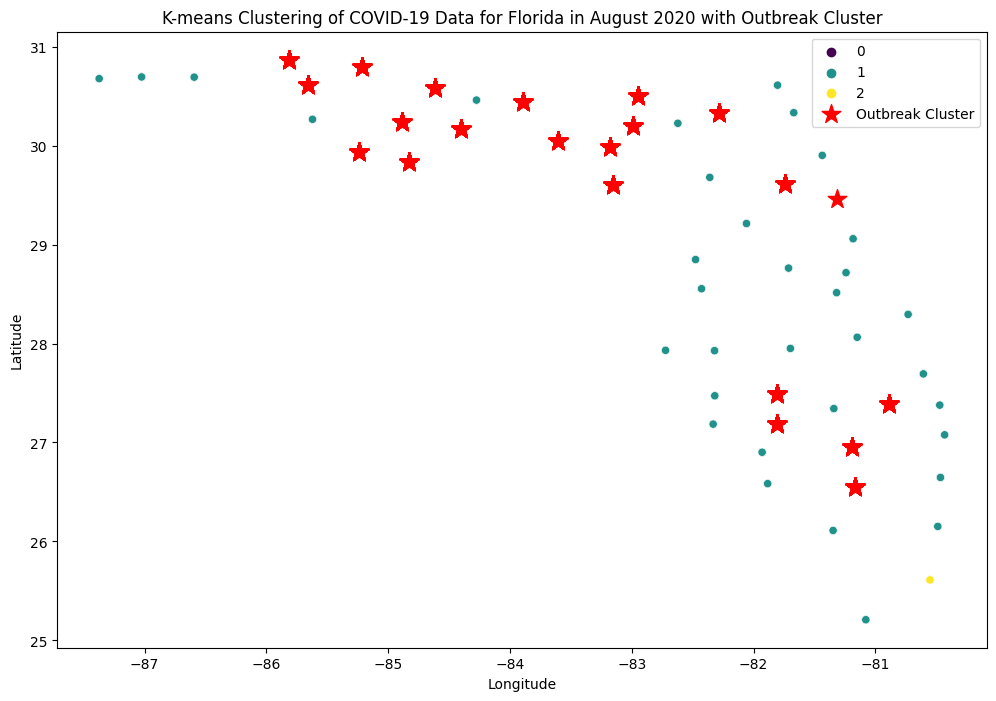

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.101248         0.147018             0.004519   
1                       16.996374         0.381436             0.002110   
2                      107.056701         2.376289             0.004554   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000352                   0.000384      24686.954230   
1              0.000179                   0.000171      24840.764322   
2              0.001070                   0.001197      24986.443299   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.331484        19.667589         17.07

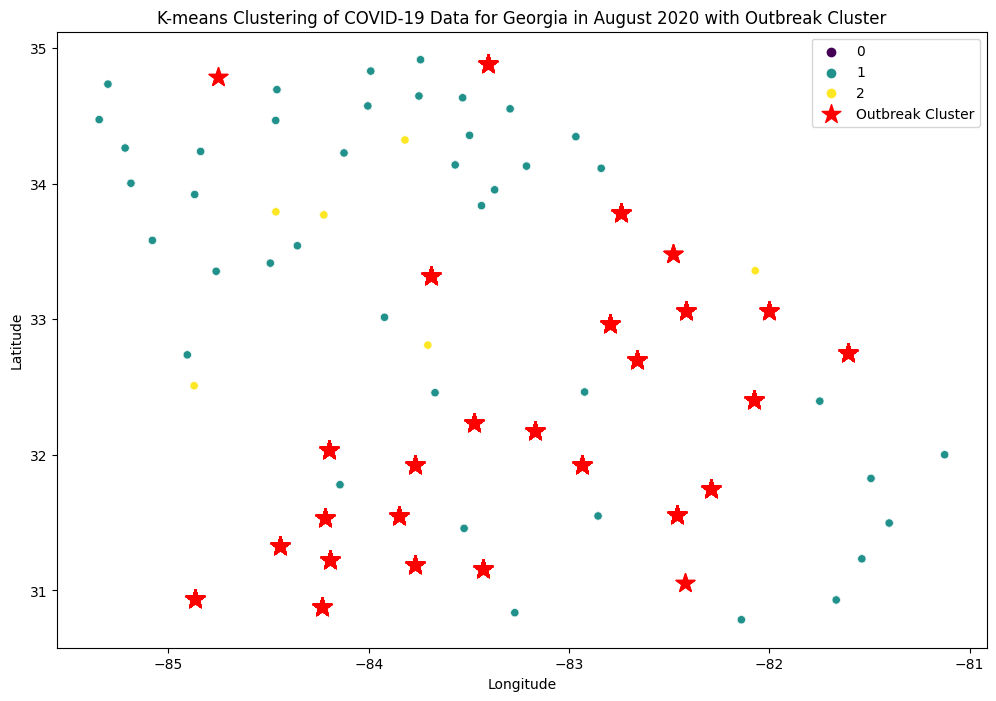

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       17.388098         0.218629             0.003852   
1                       12.490062         0.120631             0.001283   
2                      680.129032         5.548387             0.002785   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000413                   0.000407      44024.470893   
1              0.000151                   0.000146      44037.074709   
2              0.000590                   0.000645      44032.709677   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.457956        16.935513         11.7

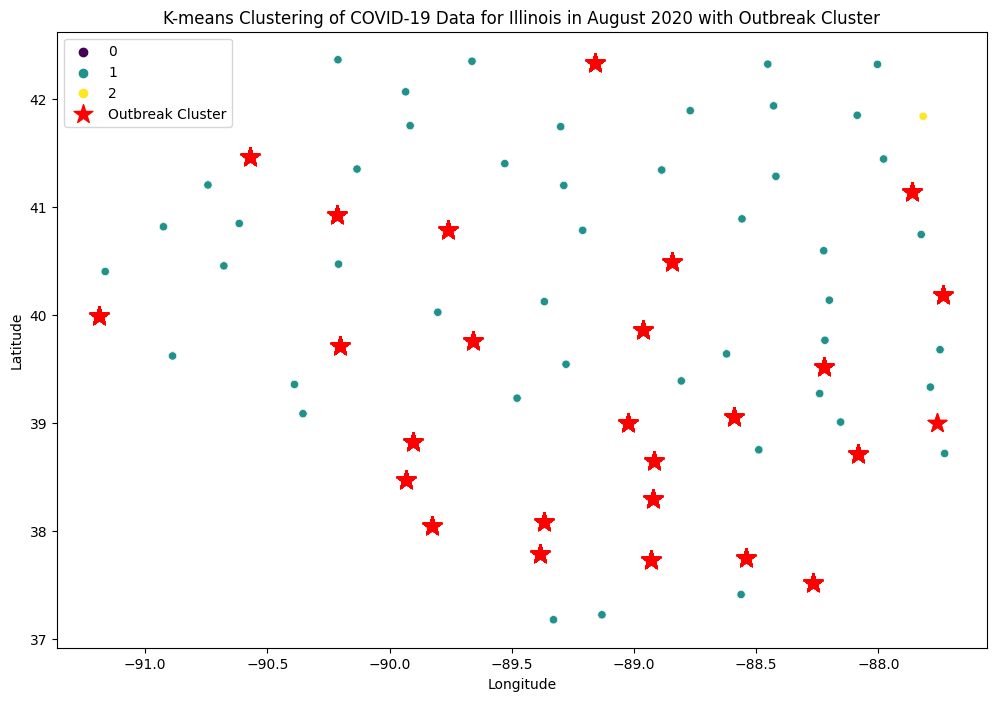

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        3.341535         0.048037             0.001690   
1                       10.734310         0.123431             0.004560   
2                      128.512821         2.025641             0.002289   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000163                   0.000155      29627.945518   
1              0.000542                   0.000567      29409.531381   
2              0.000328                   0.000300      32386.833333   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.925015        17.416679         12.7

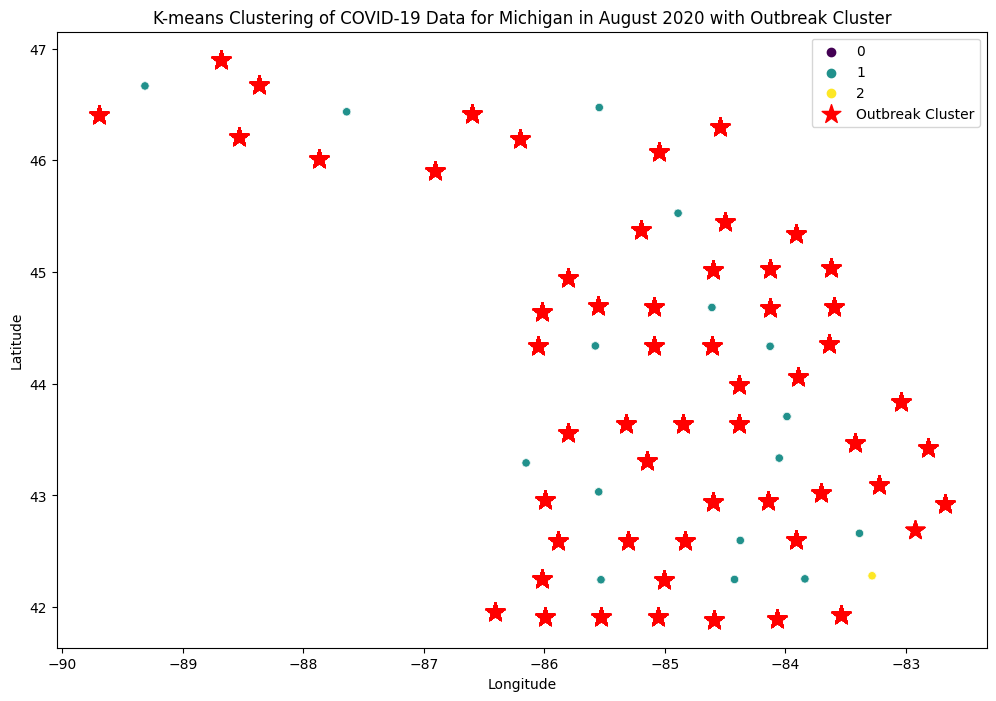

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       70.437500         1.781250             0.001127   
1                       22.851117         0.215881             0.003700   
2                        1.968523         0.025020             0.002303   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000124                   0.000124      76766.656250   
1              0.000449                   0.000475      76574.064516   
2              0.000159                   0.000156      76569.090395   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        12.520583         10.9

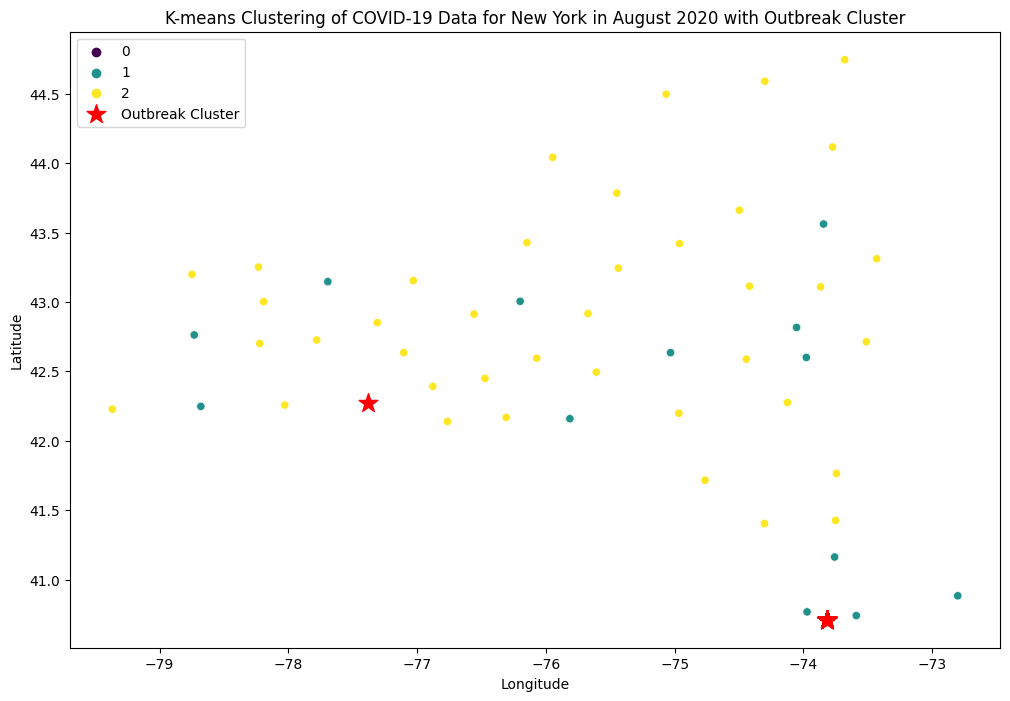

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       20.759694         0.356052             0.001682   
1                        5.799082         0.096441             0.001166   
2                       20.362903         0.419355             0.003730   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000221                   0.000219      23082.357913   
1              0.000176                   0.000179      22658.479965   
2              0.002146                   0.002573      22938.868720   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.860165        16.835050       

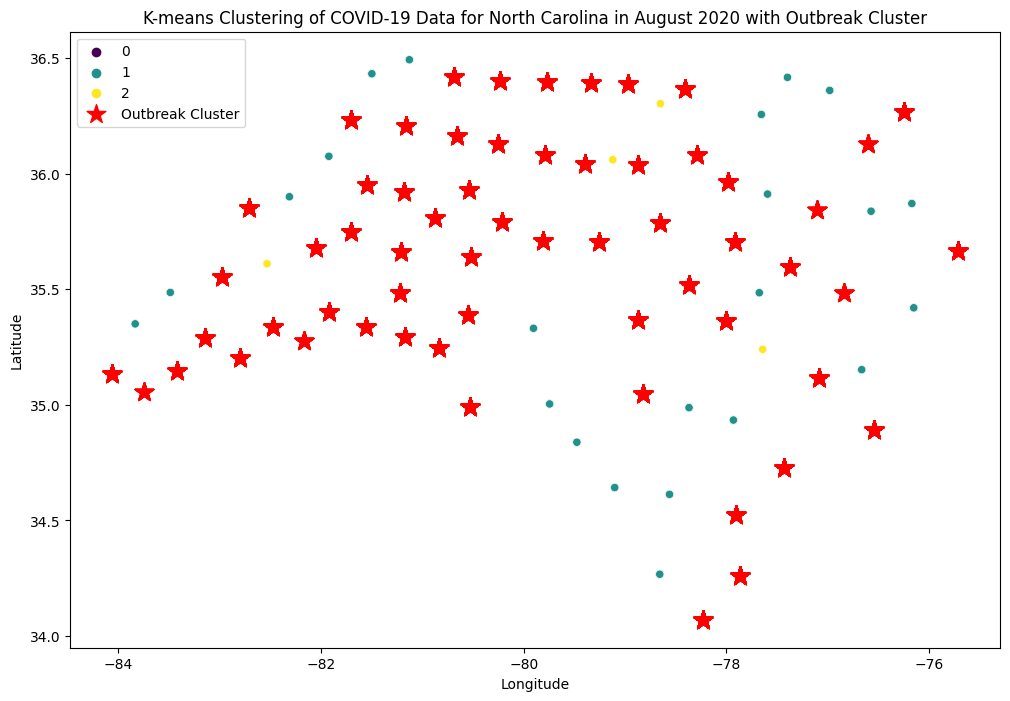

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        6.406832         0.127329             0.001616   
1                        0.451613         0.000000             0.000000   
2                       53.342949         1.102564             0.003877   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000188                   0.000175      24991.198137   
1              0.000000                   0.000000      25024.838710   
2              0.000612                   0.000650      25198.432692   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.756522        19.067019          12.7888

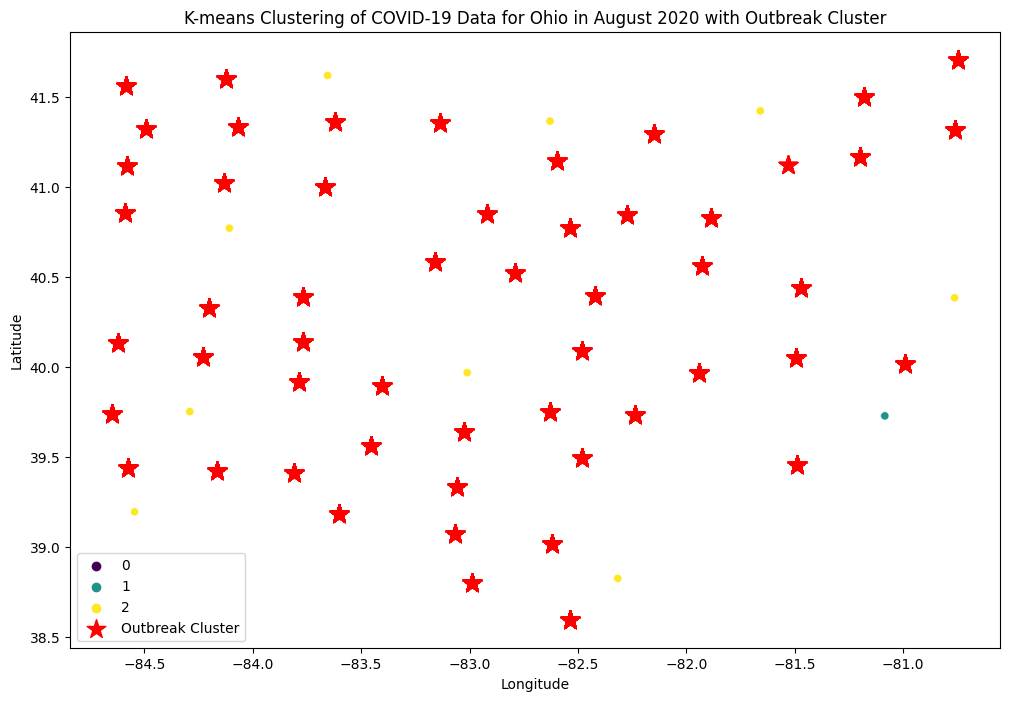

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.121076         0.079223             0.002166   
1                       37.771117         0.915531             0.003047   
2                        1.354839         0.032258             0.000560   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000184                   0.000179      14205.742900   
1              0.000485                   0.000511      14351.106267   
2              0.000083                   0.000083      14237.032258   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.713752        18.336773         

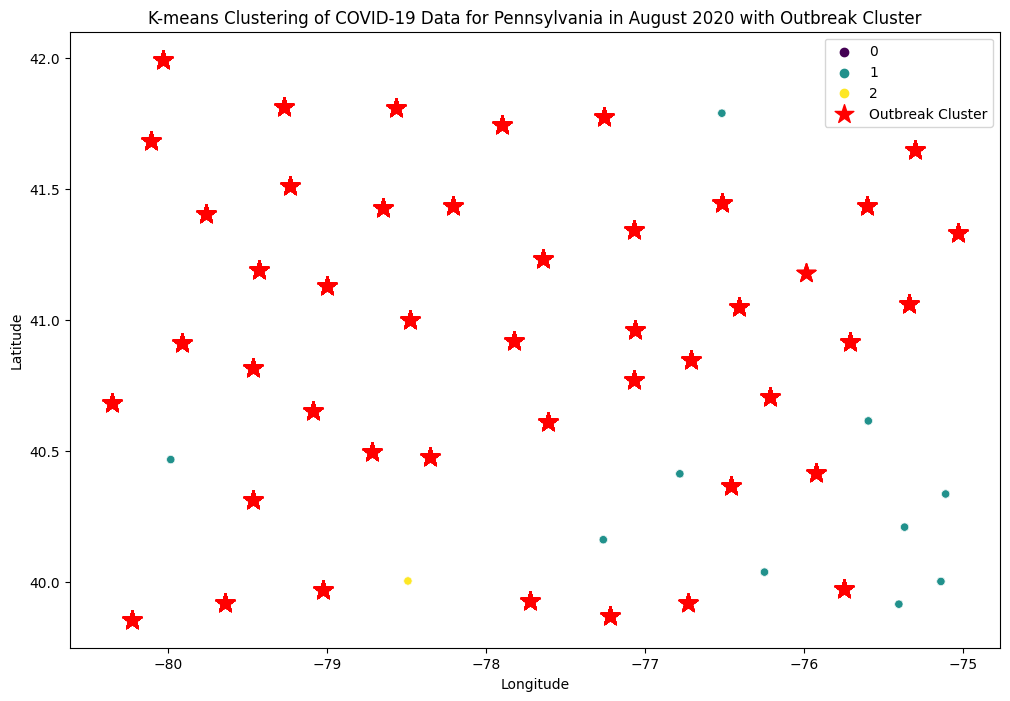

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       16.296612         0.478606             0.001476   
1                       11.979472         0.410557             0.007124   
2                      586.185629        18.688623             0.002156   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000253                   0.000256      41584.880155   
1              0.001479                   0.001578      41671.000000   
2              0.000415                   0.000443      44334.526946   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.561471        14.971474         11.5376

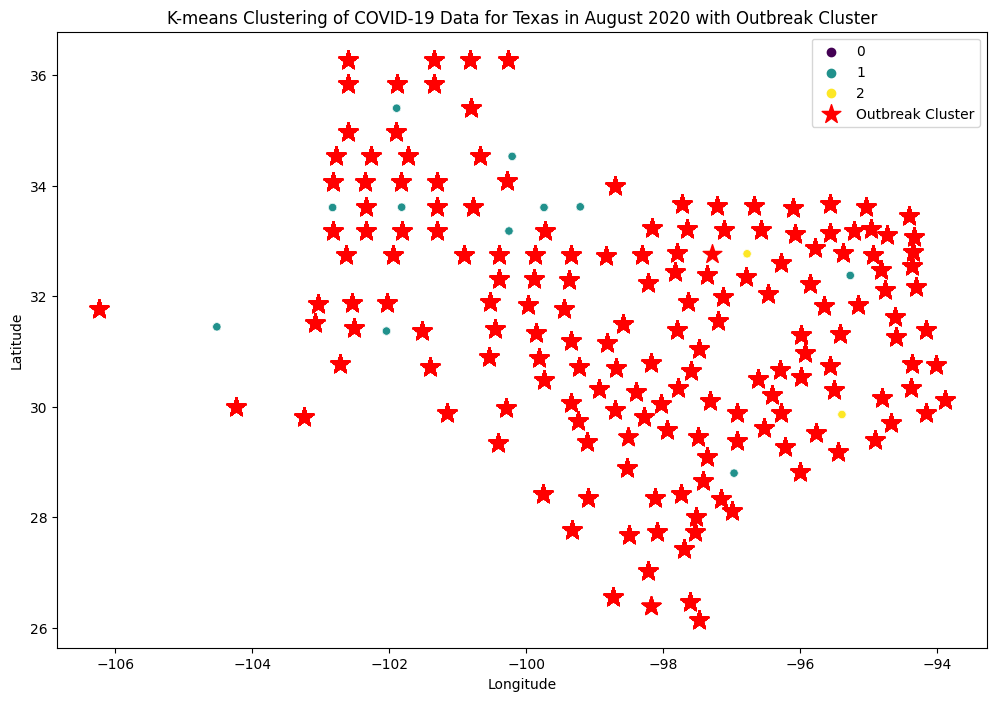

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                      958.666667        34.600000             0.001901   
1                       25.694794         0.619390             0.001772   
2                       93.771605         2.549383             0.001937   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000256                   0.000265     105401.533333   
1              0.000167                   0.000142     101871.071813   
2              0.000279                   0.000285     101237.475309   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            12.000000        10.847678          8

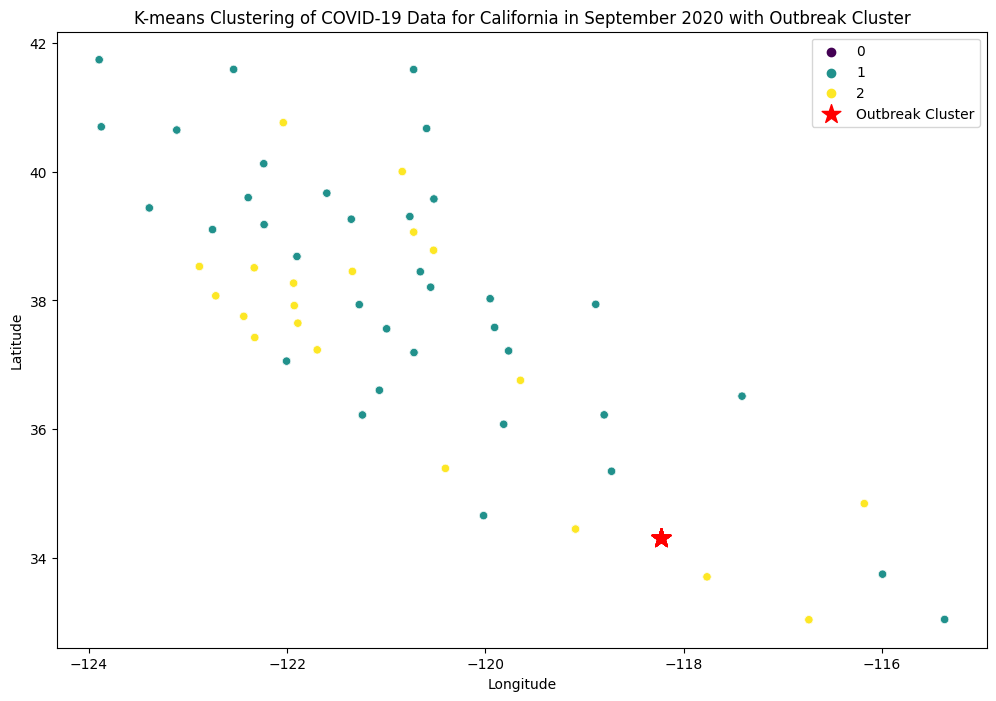

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       61.739048         2.047619             0.002375   
1                        9.278378         0.264865             0.000814   
2                      550.647059        30.647059             0.002353   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000385                   0.000398      22976.051429   
1              0.000110                   0.000103      23006.351351   
2              0.000460                   0.000490      25224.176471   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.763810        17.283773         11.36

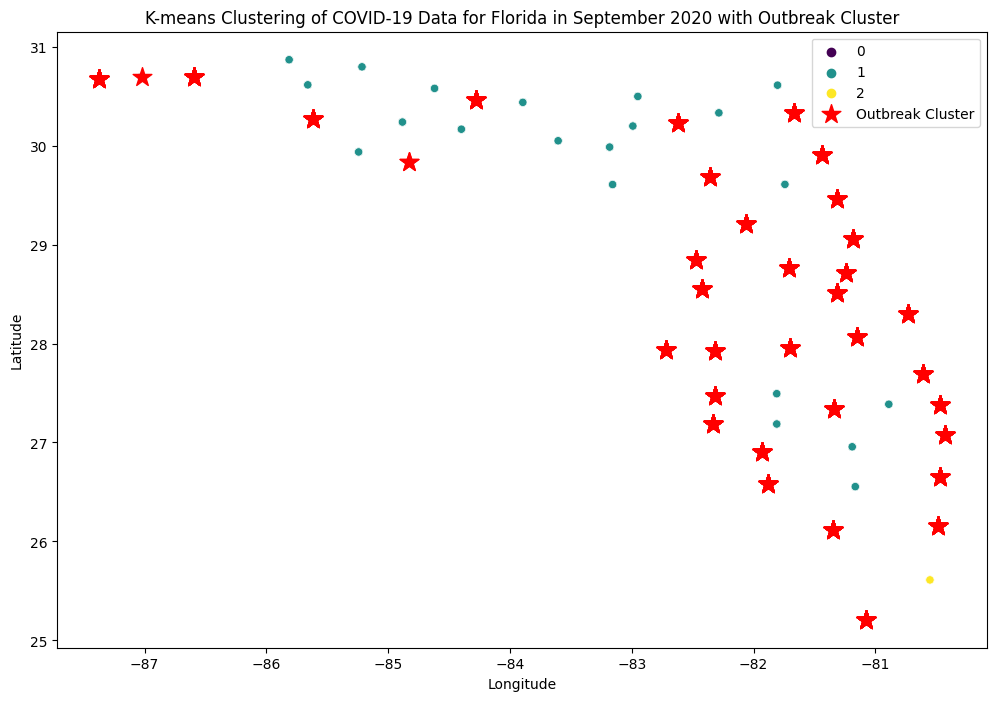

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       11.978134         0.304665             0.002071   
1                       62.801724         1.732759             0.004477   
2                        3.418848         0.159686             0.004449   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000165                   0.000157      19389.794461   
1              0.001027                   0.001142      19672.939655   
2              0.000347                   0.000379      19352.298429   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.814869        16.961606         13.30

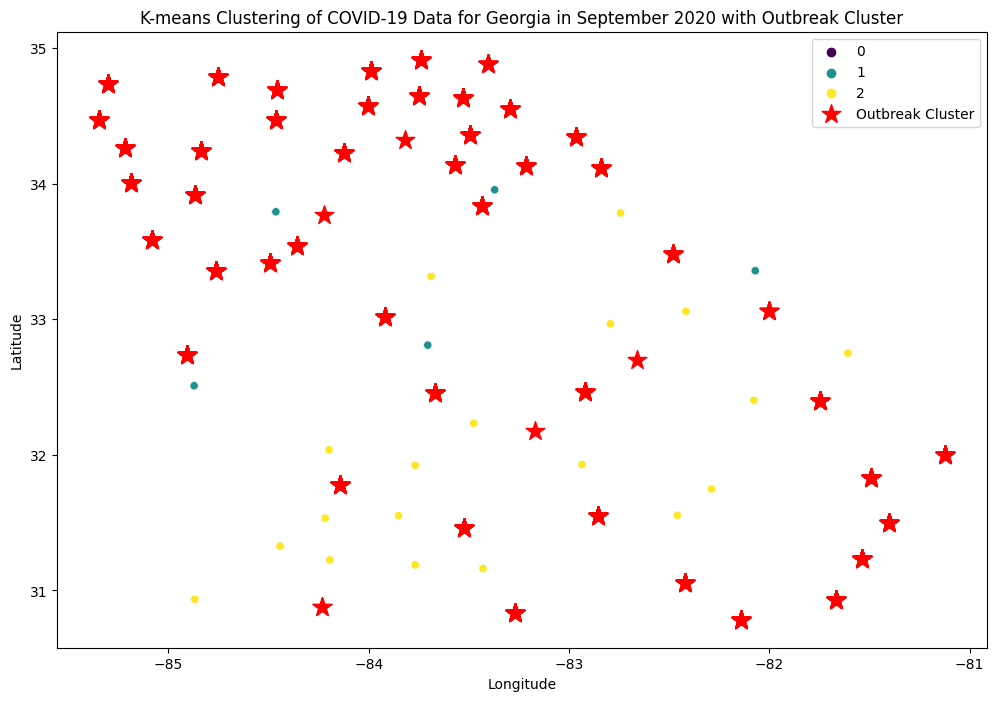

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        22.20250         0.312500             0.003865   
1                        13.87367         0.143617             0.001272   
2                       604.31250         5.500000             0.002785   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000412                   0.000406      50270.752500   
1              0.000151                   0.000146      49795.663564   
2              0.000590                   0.000645      49960.625000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.265000        16.925206         11.7

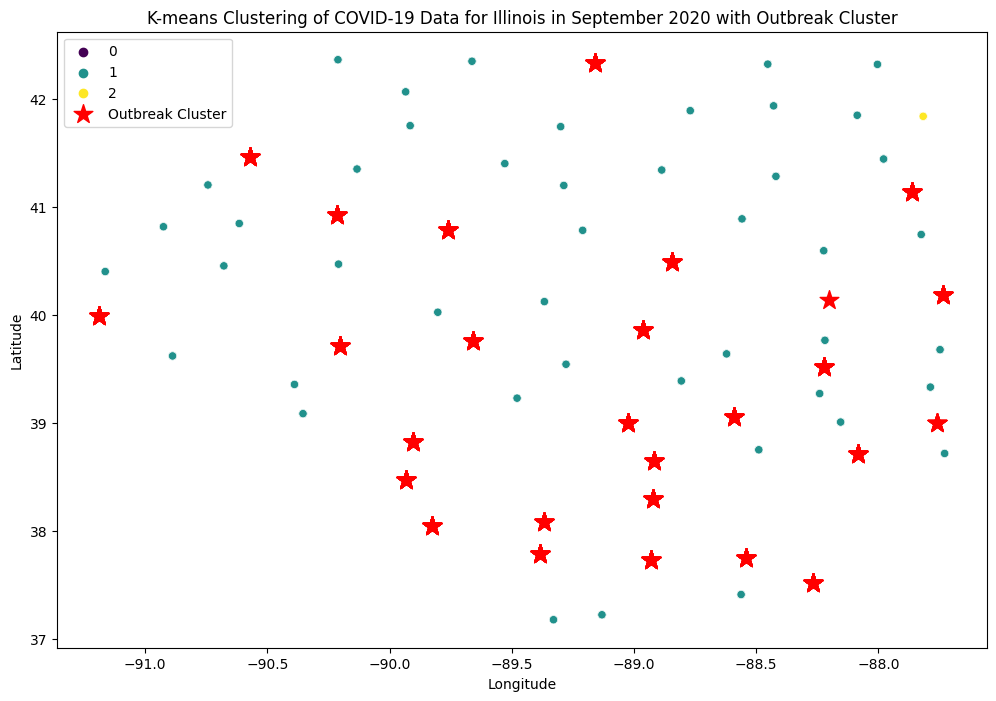

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Michigan in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        1.029126         0.012136             0.001657   
1                        8.686654         0.106383             0.001797   
2                       30.548117         0.527197             0.004580   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000154                   0.000147      28148.825243   
1              0.000185                   0.000176      28458.860735   
2              0.000550                   0.000572      28592.648536   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             7.686893        17.608349         14.8

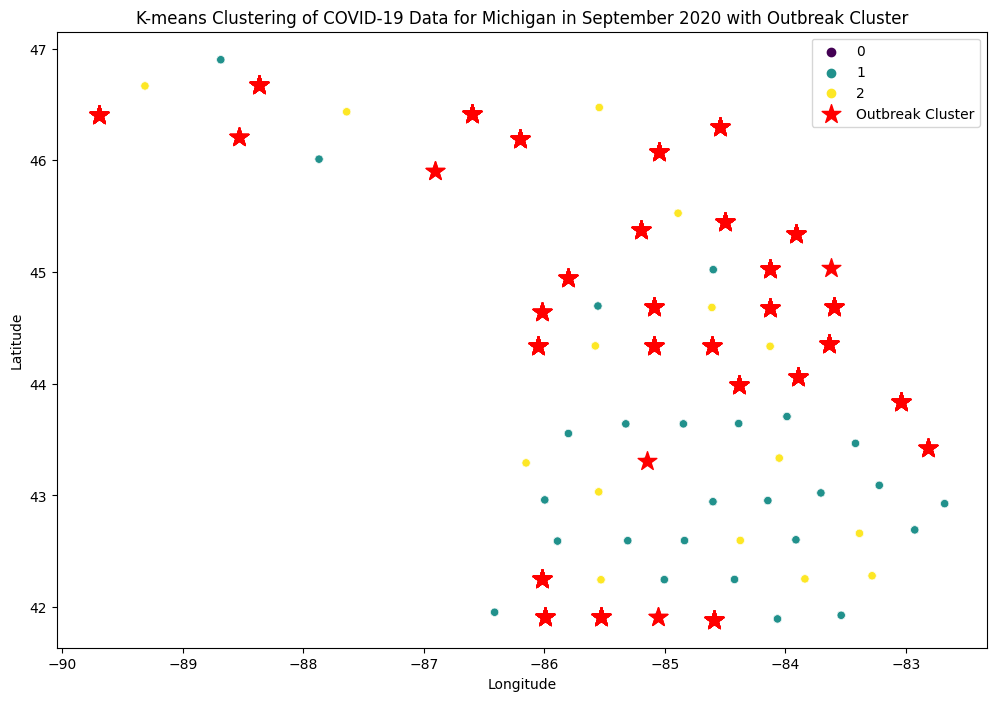

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        2.682812         0.020313             0.002304   
1                       27.586538         0.197115             0.003700   
2                       67.937500         0.812500             0.001053   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000159                   0.000156        79211.4375   
1              0.000449                   0.000475        79211.4375   
2              0.000124                   0.000124        79211.4375   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.309375        15.860658         11.4

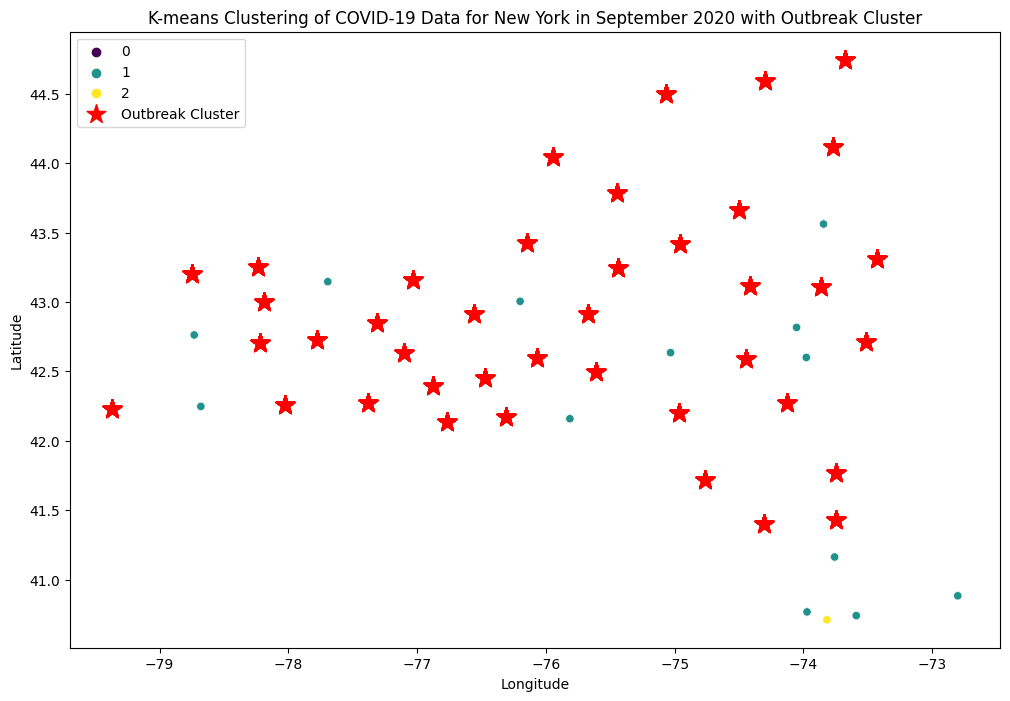

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.947761         0.151119             0.001163   
1                        7.593750         0.406250             0.002744   
2                       19.798544         0.383495             0.001856   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000167                   0.000167      26609.807836   
1              0.003061                   0.003733      26700.750000   
2              0.000271                   0.000277      26759.906553   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             8.845149        18.555134       

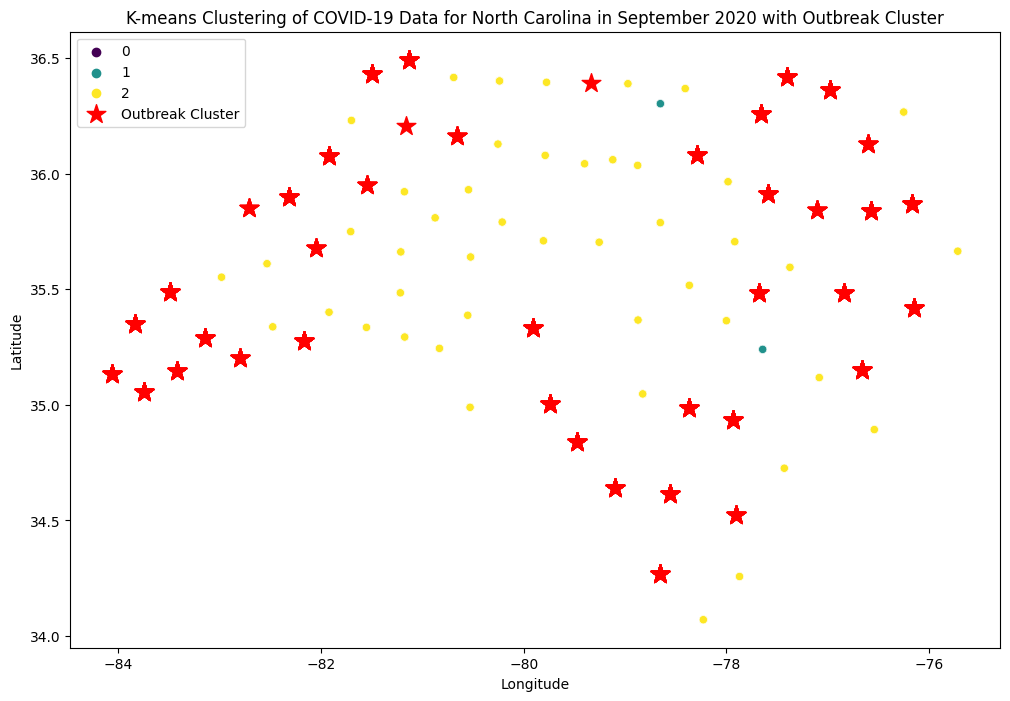

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        5.967431         0.161641             0.001619   
1                       59.368098         1.269939             0.003836   
2                        0.187500         0.000000             0.000000   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000189                   0.000176      27805.440290   
1              0.000602                   0.000639      27991.423313   
2              0.000000                   0.000000      27836.000000   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            11.492159        19.072107         12.79252

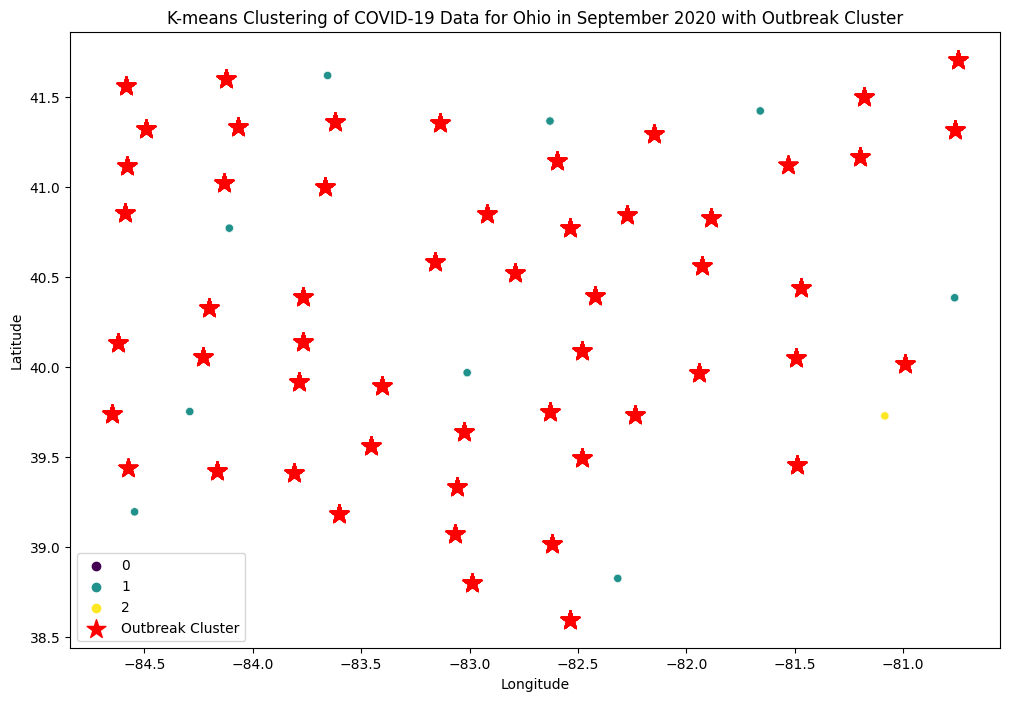

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                        4.105769         0.094551             0.002187   
1                        3.062500         0.062500             0.000560   
2                       37.910156         0.613281             0.002767   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000174                   0.000168      12186.363782   
1              0.000083                   0.000083      12306.312500   
2              0.000429                   0.000451      12598.687500   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                            10.068910        18.447049         

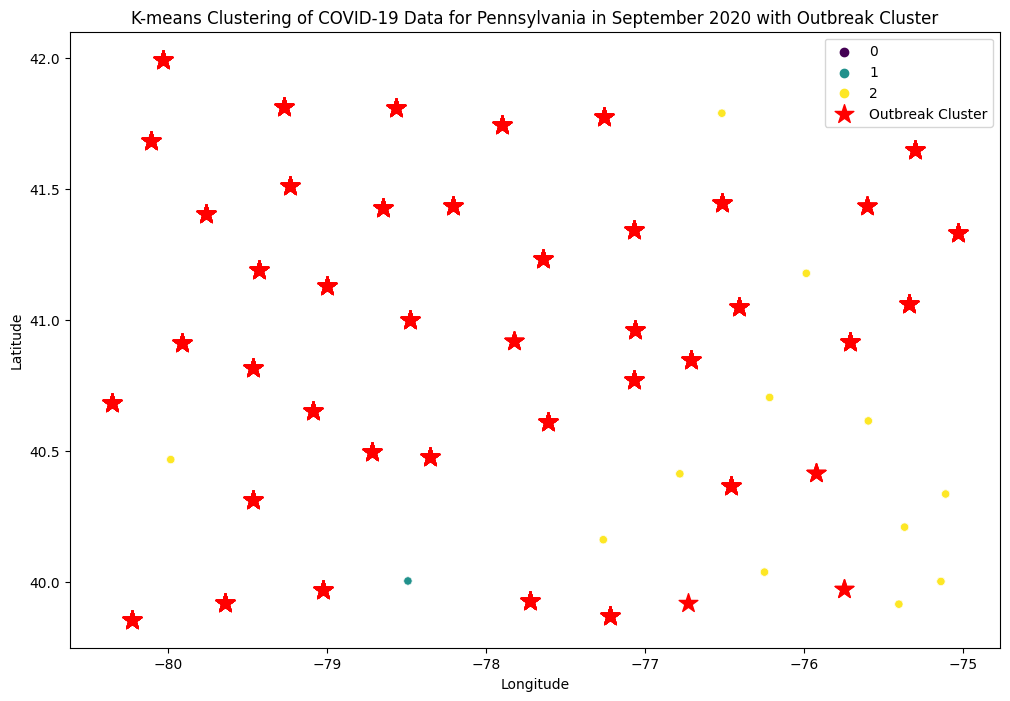

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\2046657037.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  hospital_beds_ratio  \
cluster                                                                   
0                       10.490079         0.339573             0.001477   
1                       19.113636         0.380682             0.007124   
2                      362.962963        10.827160             0.002152   

         icu_beds_ratio  ventilator_capacity_ratio  daily_state_test  \
cluster                                                                
0              0.000253                   0.000256      44942.594259   
1              0.001479                   0.001578      44935.857346   
2              0.000414                   0.000442      44713.705588   

         social_distancing_total_grade  percent_smokers  percent_diabetes  \
cluster                                                                     
0                             9.485586        14.960608         11.5418

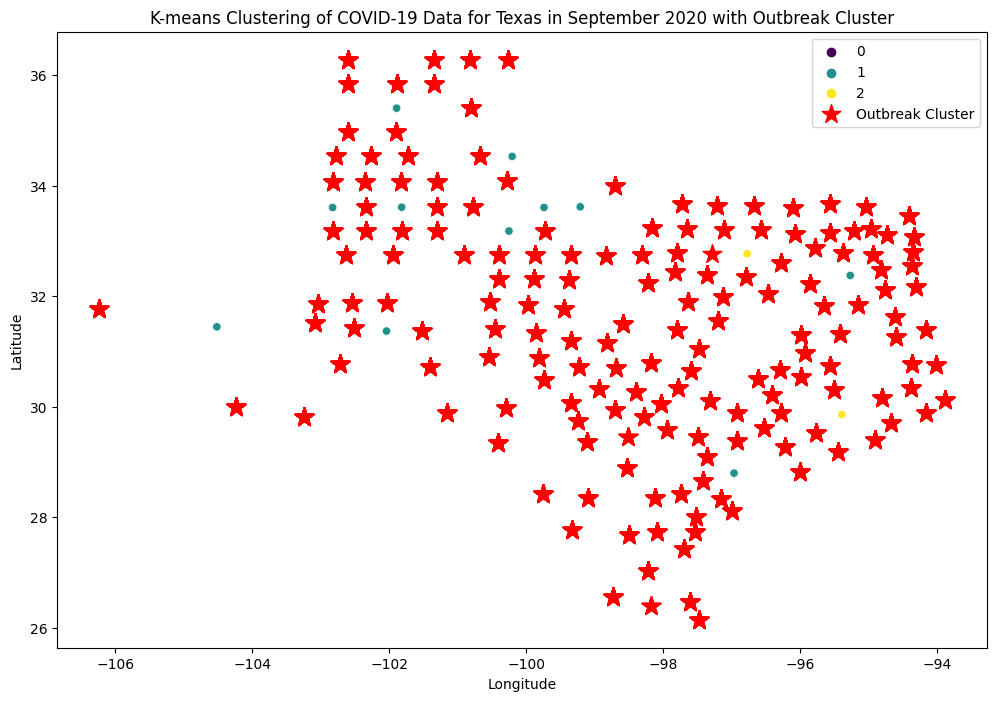

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded and preprocessed your dataset into 'df'

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Top 10 populated states
top_states = {
    6: 'California',
    12: 'Florida',
    13: 'Georgia',
    17: 'Illinois',
    26: 'Michigan',
    36: 'New York',
    37: 'North Carolina',
    39: 'Ohio',
    42: 'Pennsylvania',
    48: 'Texas'
}

for month_year in df['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = df[df['month_year'] == month_year]
    
    # Check if all selected features are present in the current month's data
    missing_features = [feat for feat in selected_features_iforest if feat not in df_month.columns]
    
    if missing_features:
        print(f"Skipping month {month_year}: Missing features - {missing_features}")
        continue
    
    for state_fips, state_name in top_states.items():
        # Filter data for the current state
        df_state = df_month[df_month['state_fips'] == state_fips]
        
        if df_state.empty:
            print(f"No data available for {state_name} in {month_year}.")
            continue
        
        # Create the dataset with selected features
        X_selected = df_state[selected_features_iforest]

        # Scaling the Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # K-means Clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)

        # Analyzing Clusters
        df_state['cluster'] = clusters
        cluster_summary = df_state.groupby('cluster')[selected_features_iforest].mean()

        # Identifying Clusters with High COVID-19 Cases or Deaths
        cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary.get('covid_19_deaths', 0)
        outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
        outbreak_cluster = outbreak_cluster.reset_index()

        print(f"Cluster Summary for {state_name} in {month_year}:")
        print(cluster_summary)
        print("-----------------------------------------------------------")

        # Plotting the clusters on a map
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_state, palette='viridis', legend='full')

        # Plot the outbreak cluster from the original DataFrame
        outbreak_cluster_indices = df_state[df_state['cluster'] == outbreak_cluster.index[0]].index
        outbreak_cluster_data = df_state.loc[outbreak_cluster_indices]
        plt.scatter(outbreak_cluster_data['longitude'], outbreak_cluster_data['latitude'], color='red', marker='*', s=200, label='Outbreak Cluster')

        # Adding labels and title
        plt.title(f'K-means Clustering of COVID-19 Data for {state_name} in {month_year.strftime("%B %Y")} with Outbreak Cluster')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        
        # Save or show the plot
        plt.savefig(f'cluster_plot_{state_name}_{month_year}.png')
        plt.show()


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for California in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
1                             1.0              0.0                 1.0
2                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Florida in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for Georgia in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Illinois in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
1                             1.0              0.0                 1.0
2                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for Michigan in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for New York in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for North Carolina in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Ohio in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for Pennsylvania in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Texas in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


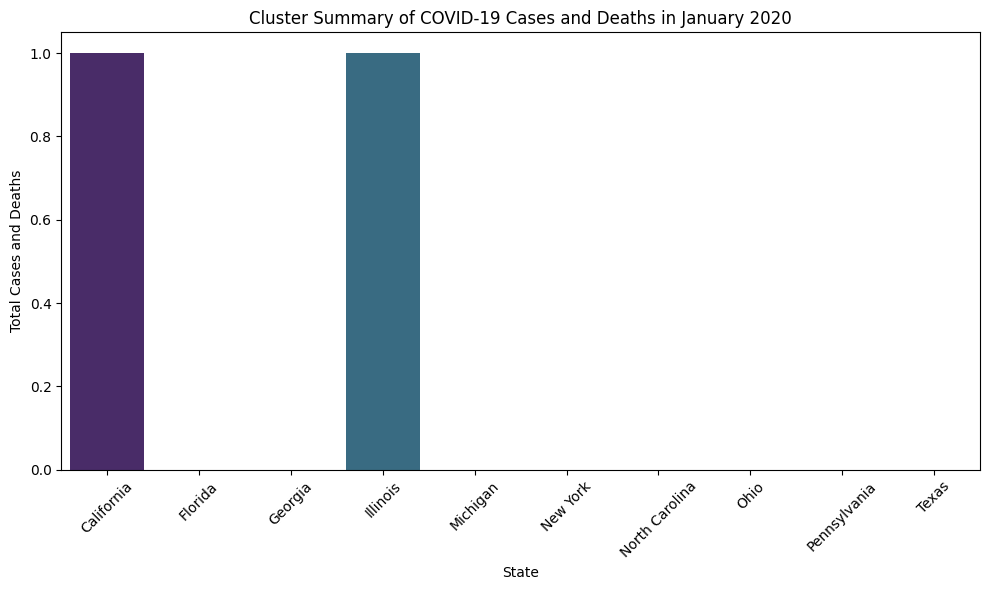

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

Cluster Summary for California in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
1                             0.0              1.0                 1.0
2                             1.5              0.0                 1.5
-----------------------------------------------------------
Cluster Summary for Florida in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for Georgia in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Illinois in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for New York in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Ohio in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning:

Cluster Summary for Pennsylvania in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Texas in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


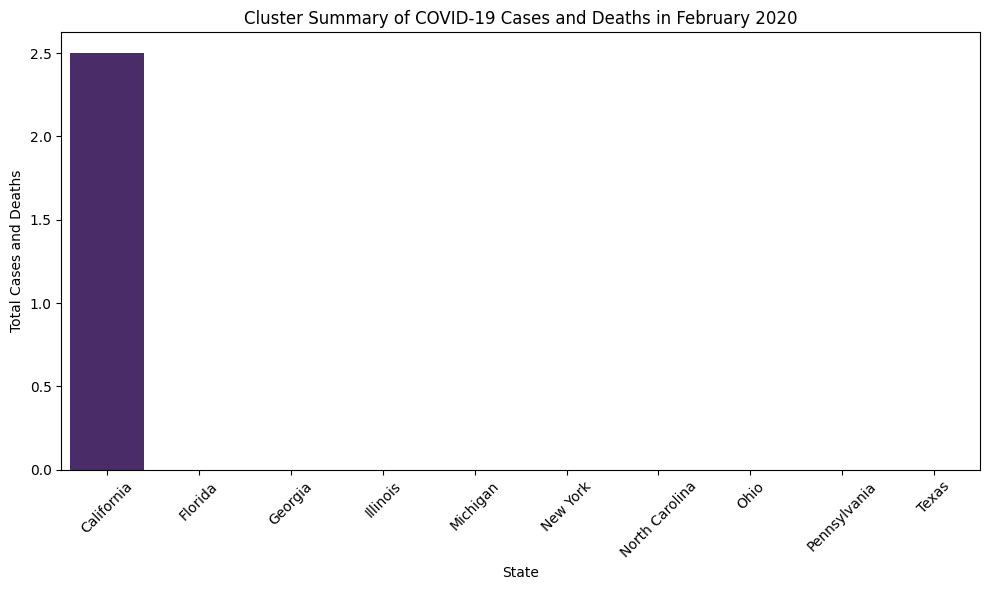

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       51.283019         1.905660           53.188679
1                        2.284436         0.024448            2.308885
2                      368.666667         6.833333          375.500000
-----------------------------------------------------------
Cluster Summary for Florida in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.922086         0.000000            1.922086
1                       22.274510         1.372549           23.647059
2                      240.666667         0.888889          241.555556
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Cluster Summary for Georgia in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.717937         0.011459            0.729396
1                      114.333333         7.666667          122.000000
2                       34.772727         1.863636           36.636364
-----------------------------------------------------------
Cluster Summary for Illinois in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.880995         0.015542            0.896536
1                      800.500000        14.500000          815.000000
2                      261.111111         3.666667          264.777778
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-03:
         covid_19_confirmed_cases  covid_19_deat

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.850709         0.041949            5.892659
1                      677.319149         7.234043          684.553191
2                     1442.166667        48.500000         1490.666667
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       27.750000              0.0           27.750000
1                        0.318471              0.0            0.318471
2                        7.250000              1.0            8.250000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.464958           0.0000            0.464958
1                        9.160000           1.2000           10.360000
2                       42.562500           0.1875           42.750000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.434577         0.000000            1.434577
1                      142.750000         1.375000          144.125000
2                       24.641026         1.153846           25.794872
-----------------------------------------------------------
Cluster Summary for Texas in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.378306         0.000000            0.378306
1                       82.923077         1.153846           84.076923
2                       12.888889         1.222222           14.111111
-----------------------------------------------------------


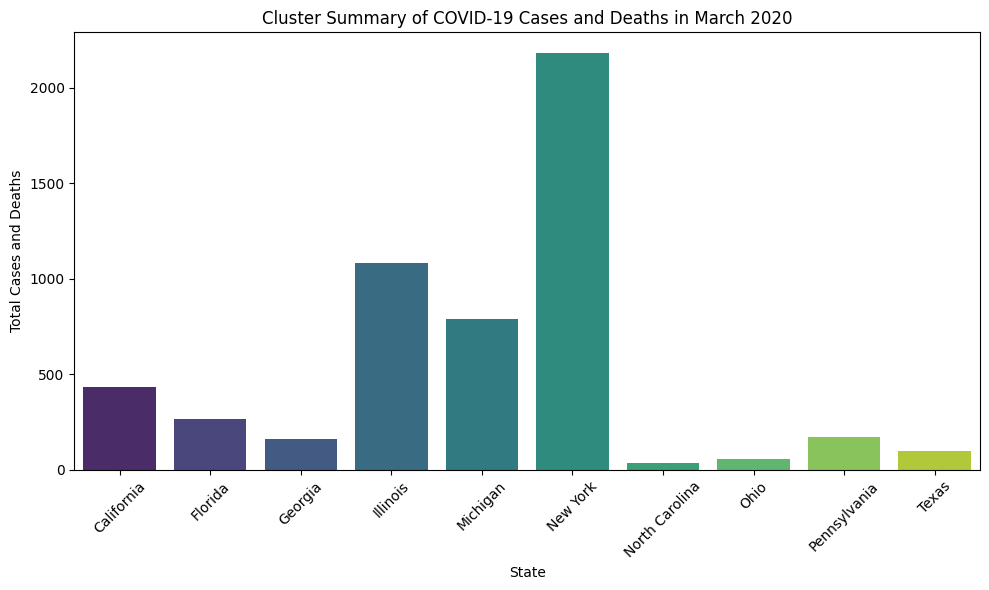

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       12.877502         0.463311           13.340813
1                     1063.444444        55.333333         1118.777778
2                      485.454545        26.454545          511.909091
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      108.250000         7.033333          115.283333
1                        6.863022         0.262285            7.125307
2                      388.818182        13.681818          402.500000
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       71.112903         1.016129           72.129032
1                        3.057656         0.137524            3.195180
2                       47.714286         5.333333           53.047619
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        6.547432         0.318834            6.866266
1                      993.000000        34.555556         1027.555556
2                     1247.272727        82.909091         1330.181818
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.592330         0.342330            4.934659
1                      506.380952        65.666667          572.047619
2                      207.561404        24.210526          231.771930
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       17.976510         1.013423           18.989933
1                      884.034783        51.921739          935.956522
2                     1251.733333       254.533333         1506.266667
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.164337         0.000000            2.164337
1                      104.083333         0.833333          104.916667
2                        7.270042         1.468354            8.738397
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.777964         0.154922            3.932886
1                      641.000000         0.250000          641.250000
2                       46.836735         4.775510           51.612245
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.566646         0.685059           14.251705
1                      254.612903         9.080645          263.693548
2                      193.000000        90.200000          283.200000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.940431         0.036876            1.977307
1                      195.033333         4.833333          199.866667
2                       45.011628         2.156977           47.168605
-----------------------------------------------------------


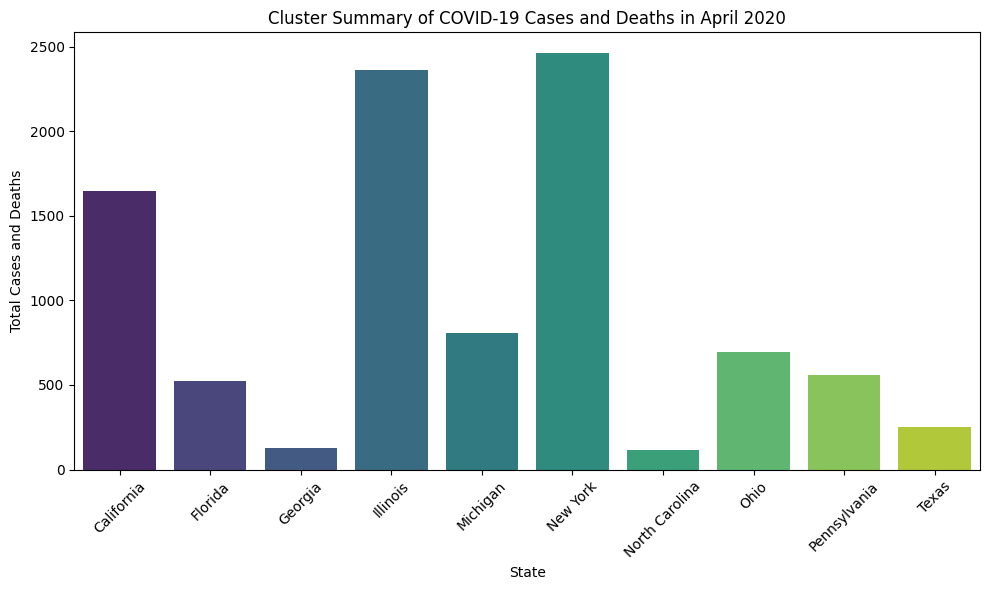

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.015470         0.198020           11.213490
1                     1064.034483        41.896552         1105.931034
2                      150.626374         6.648352          157.274725
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.108546         0.192764            5.301310
1                      191.903226        13.451613          205.354839
2                       58.187970         3.142857           61.330827
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.402240         0.061129            2.463369
1                       26.674419         1.868217           28.542636
2                      100.545455         5.227273          105.772727
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.083781         0.423835           11.507616
1                     1162.000000        42.312500         1204.312500
2                     1521.333333        90.533333         1611.866667
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.563134         0.249309            2.812442
1                       75.923077         7.012821           82.935897
2                      115.866667        38.066667          153.933333
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       10.282398         0.715667           10.998066
1                      440.833333        87.500000          528.333333
2                      200.801802        21.090090          221.891892
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.033141         0.076301            5.109441
1                      161.000000         1.285714          162.285714
2                       17.227273         2.965909           20.193182
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.611957         0.203804            3.815761
1                       77.324324         2.567568           79.891892
2                       62.974359        10.102564           73.076923
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.006143         0.651720            7.657862
1                      117.490385        14.759615          132.250000
2                      284.250000       126.250000          410.500000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.926635         0.050416            2.977051
1                      232.640625         3.390625          236.031250
2                       59.240000         4.720000           63.960000
-----------------------------------------------------------


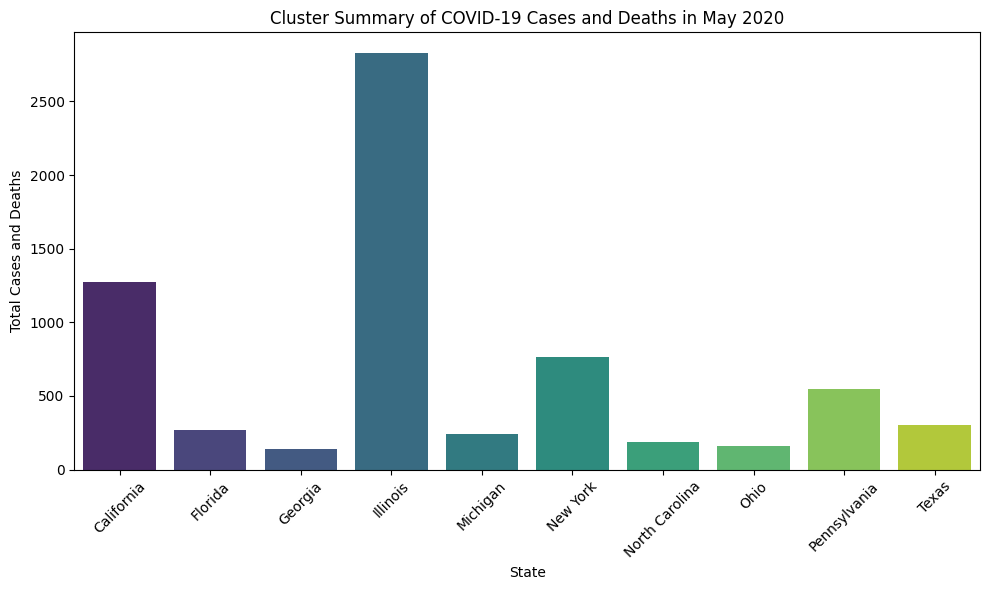

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       25.223575         0.259449           25.483024
1                     1730.500000        36.961538         1767.461538
2                      356.526882         5.838710          362.365591
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       23.965736         0.217640           24.183376
1                      627.576923        13.423077          641.000000
2                      365.981481         3.203704          369.185185
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      139.451613         1.000000          140.451613
1                       26.086957         3.376812           29.463768
2                        5.542453         0.076887            5.619340
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.546296         0.272685            4.818981
1                      490.583333        49.583333          540.166667
2                      373.555556        18.222222          391.777778
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.502742         0.243601            4.746344
1                     2421.000000        42.000000         2463.000000
2                      452.000000       121.000000          573.000000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.588753         0.235772            3.824526
1                       66.000000       448.000000          514.000000
2                       69.776224         5.510490           75.286713
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        9.822471         0.066773            9.889244
1                      227.972973         1.027027          229.000000
2                       36.791667         3.333333           40.125000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.485319         0.135734            3.621053
1                      102.175439         1.684211          103.859649
2                       75.642857         8.500000           84.142857
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.203766         0.160054            3.363820
1                       41.250000         2.860465           44.110465
2                      104.238095        14.666667          118.904762
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.724901         0.038656            7.763558
1                      255.801418         2.432624          258.234043
2                      824.650000         8.200000          832.850000
-----------------------------------------------------------


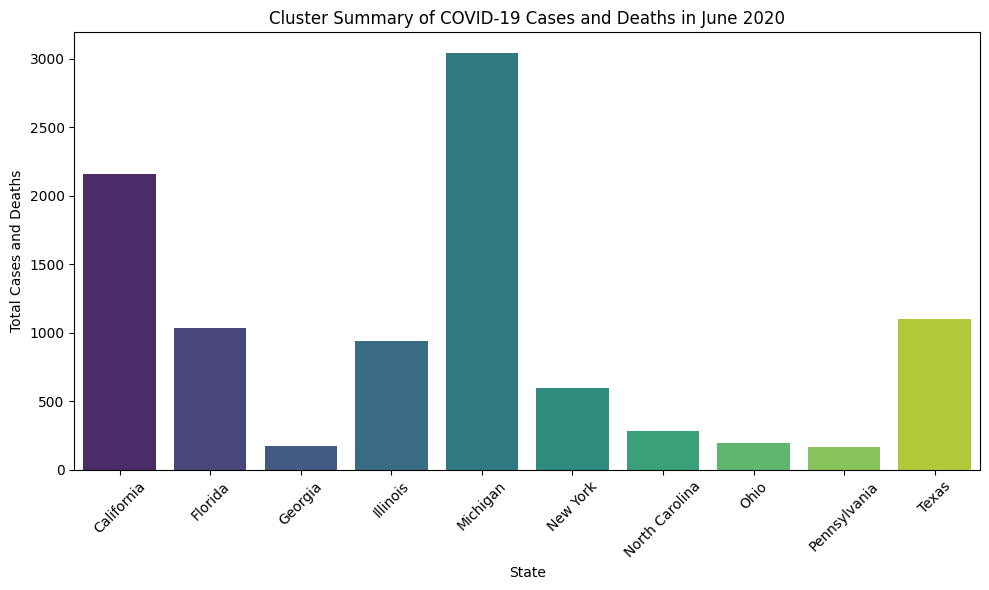

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       62.710280         0.573832           63.284112
1                     3226.450000        57.300000         3283.750000
2                      939.576577         9.666667          949.243243
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       86.139913         0.644597           86.784510
1                     2475.250000        21.750000         2497.000000
2                      621.569231        10.800000          632.369231
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.692452         0.117206           13.809658
1                      188.676471         5.735294          194.411765
2                      163.330709         0.755906          164.086614
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.507389         0.104344            8.611733
1                      523.187500        16.187500          539.375000
2                      470.428571         4.428571          474.857143
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       93.715909         0.670455           94.386364
1                        4.109310         0.043075            4.152385
2                      138.312500         5.937500          144.250000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.832877         0.050000            2.882877
1                       48.655738         0.524590           49.180328
2                       82.225806         5.322581           87.548387
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       59.171717         3.131313           62.303030
1                       14.640031         0.078339           14.718371
2                      271.444444         1.177778          272.622222
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.138678         0.115926            8.254605
1                      173.785714         6.285714          180.071429
2                      177.538462         0.938462          178.476923
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.515419         0.084959            7.600378
1                      176.434783         1.065217          177.500000
2                       38.356436         3.128713           41.485149
-----------------------------------------------------------
Cluster Summary for Texas in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       24.104741         0.348116           24.452857
1                     1236.000000       464.000000         1700.000000
2                      997.864000        13.000000         1010.864000
-----------------------------------------------------------


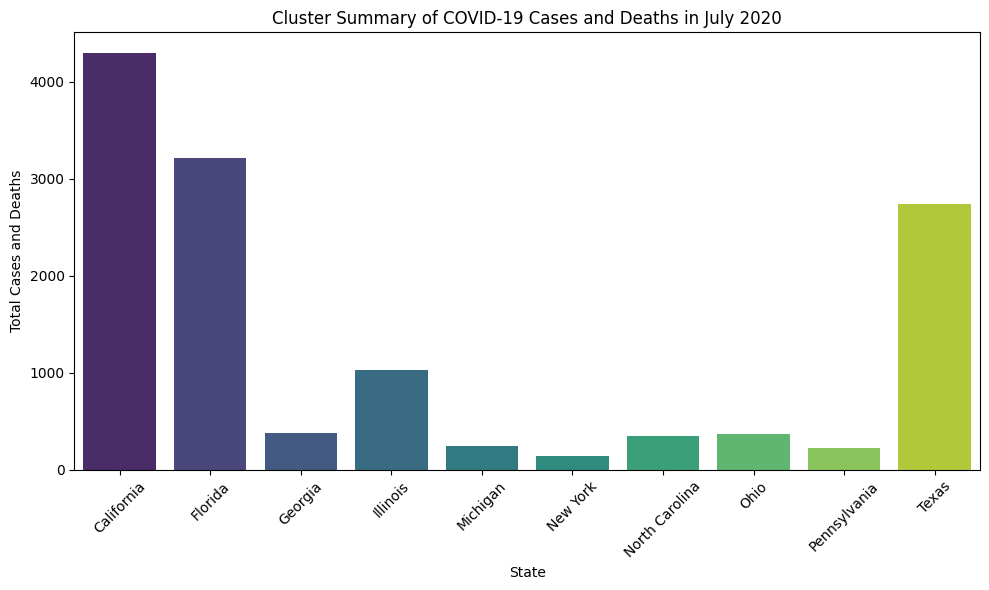

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       49.835696         0.605026           50.440722
1                     1817.440000        49.840000         1867.280000
2                      554.716981        10.100629          564.817610
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       47.783833         1.089406           48.873239
1                      321.044248        15.327434          336.371681
2                     1519.285714        32.047619         1551.333333
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Cluster Summary for Georgia in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       52.318182         2.417355           54.735537
1                      251.550000         4.850000          256.400000
2                       12.505964         0.156064           12.662028
-----------------------------------------------------------
Cluster Summary for Illinois in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       40.543210         1.419753           41.962963
1                       11.212563         0.000000           11.212563
2                      686.100000         5.733333          691.833333
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-08:
         covid_19_confirmed_cases  covid_19_deat

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       54.615385         2.923077           57.538462
1                        2.850000         0.033108            2.883108
2                       49.190476         0.297619           49.488095
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.411189         0.144757           11.555947
1                      129.961538         1.025641          130.987179
2                       57.222222         4.634921           61.857143
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.027793         0.119511            7.147304
1                       93.141667         1.225000           94.366667
2                       92.705882         5.500000           98.205882
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       46.296651         0.813397           47.110048
1                        5.160403         0.059732            5.220134
2                       91.648649         4.972973           96.621622
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.454112         0.388716           13.842828
1                     1247.270270        34.972973         1282.243243
2                      376.016949        13.090395          389.107345
-----------------------------------------------------------


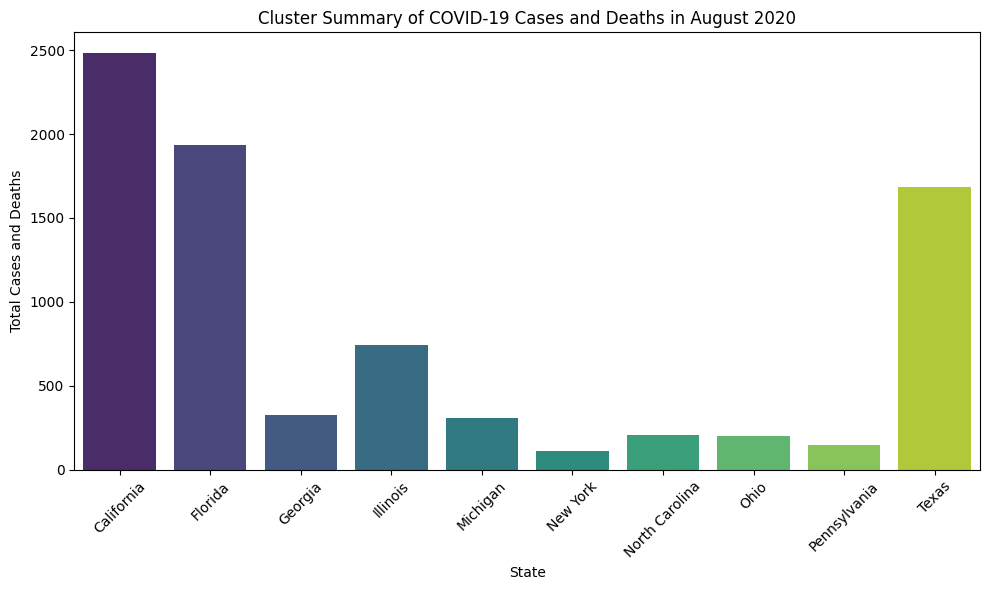

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      260.381818         8.700000          269.081818
1                       24.782216         0.365979           25.148196
2                     1120.100000        44.900000         1165.000000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       41.377086         1.309232           42.686318
1                      488.333333        34.750000          523.083333
2                     2149.000000       100.000000         2249.000000
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.538241         0.162524            8.700765
1                       96.461538         0.826923           97.288462
2                       33.267442         3.000000           36.267442
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       12.221203         0.000000           12.221203
1                      685.363636         7.181818          692.545455
2                       53.721591         1.375000           55.096591
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      125.531915         2.127660          127.659574
1                      245.000000        32.000000          277.000000
2                        5.420536         0.048214            5.468750
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.561828         0.000000            3.561828
1                       33.958333         1.375000           35.333333
2                       59.194444         0.013889           59.208333
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.656072         0.094540            8.750611
1                       34.290698         3.104651           37.395349
2                       78.164557         0.341772           78.506329
-----------------------------------------------------------
Cluster Summary for Ohio in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.785489         0.170347            7.955836
1                      163.857143         1.228571          165.085714
2                       67.636364         6.181818           73.818182
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\3796842069.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.548217         0.060766            5.608983
1                       66.615385         0.395604           67.010989
2                       42.791667         2.812500           45.604167
-----------------------------------------------------------
Cluster Summary for Texas in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       10.194454         0.260220           10.454675
1                      162.626263         8.161616          170.787879
2                     1000.375000        19.437500         1019.812500
-----------------------------------------------------------


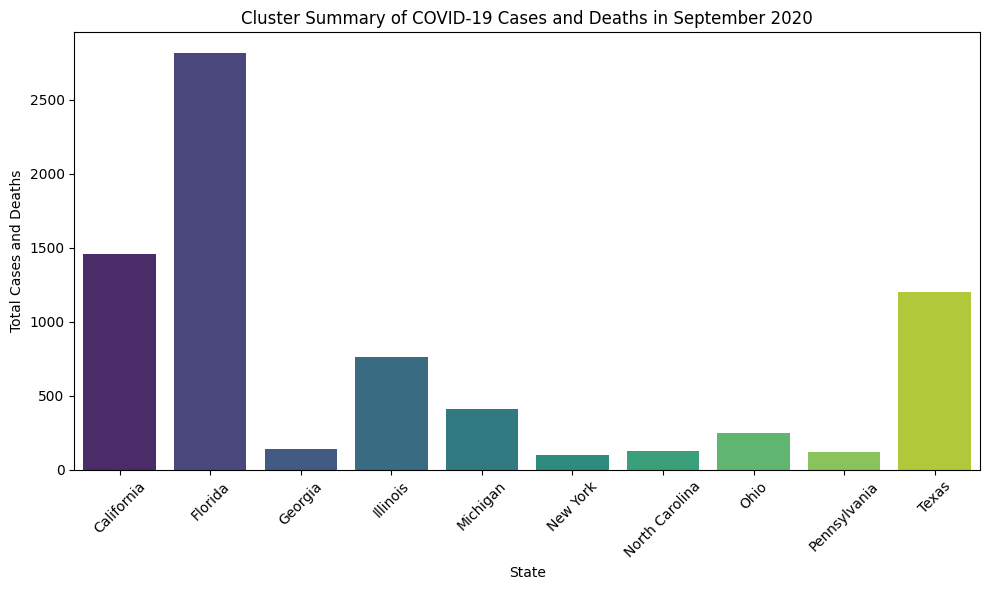

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded and preprocessed your dataset into 'df'

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Top 10 populated states
top_states = {
    6: 'California',
    12: 'Florida',
    13: 'Georgia',
    17: 'Illinois',
    26: 'Michigan',
    36: 'New York',
    37: 'North Carolina',
    39: 'Ohio',
    42: 'Pennsylvania',
    48: 'Texas'
}

# Selected features for clustering
selected_features_iforest = ['covid_19_confirmed_cases', 'covid_19_deaths']

for month_year in df['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = df[df['month_year'] == month_year]
    
    cluster_summary_data = []
    
    for state_fips, state_name in top_states.items():
        # Filter data for the current state
        df_state = df_month[df_month['state_fips'] == state_fips]
        
        if df_state.empty:
            print(f"No data available for {state_name} in {month_year}.")
            continue
        
        # Create the dataset with selected features
        X_selected = df_state[selected_features_iforest]

        # Scaling the Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # K-means Clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)

        # Analyzing Clusters
        df_state['cluster'] = clusters
        cluster_summary = df_state.groupby('cluster')[selected_features_iforest].mean()

        # Identifying Clusters with High COVID-19 Cases or Deaths
        cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary['covid_19_deaths']
        outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
        outbreak_cluster = outbreak_cluster.reset_index()

        cluster_summary_data.append({
            'State': state_name,
            'Total_Cases_Deaths': cluster_summary['total_cases_deaths'].sum()
        })

        print(f"Cluster Summary for {state_name} in {month_year}:")
        print(cluster_summary)
        print("-----------------------------------------------------------")

    # Creating DataFrame for cluster summary
    cluster_summary_df = pd.DataFrame(cluster_summary_data)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    sns.barplot(x='State', y='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis')
    plt.title(f'Cluster Summary of COVID-19 Cases and Deaths in {month_year.strftime("%B %Y")}')
    plt.xlabel('State')
    plt.ylabel('Total Cases and Deaths')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save or show the plot
    plt.savefig(f'cluster_plot_{month_year}.png')
    plt.show()


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
1                             1.0              0.0                 1.0
2                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning:

Cluster Summary for Illinois in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
1                             1.0              0.0                 1.0
2                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning:

Cluster Summary for Ohio in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Texas in 2020-01:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


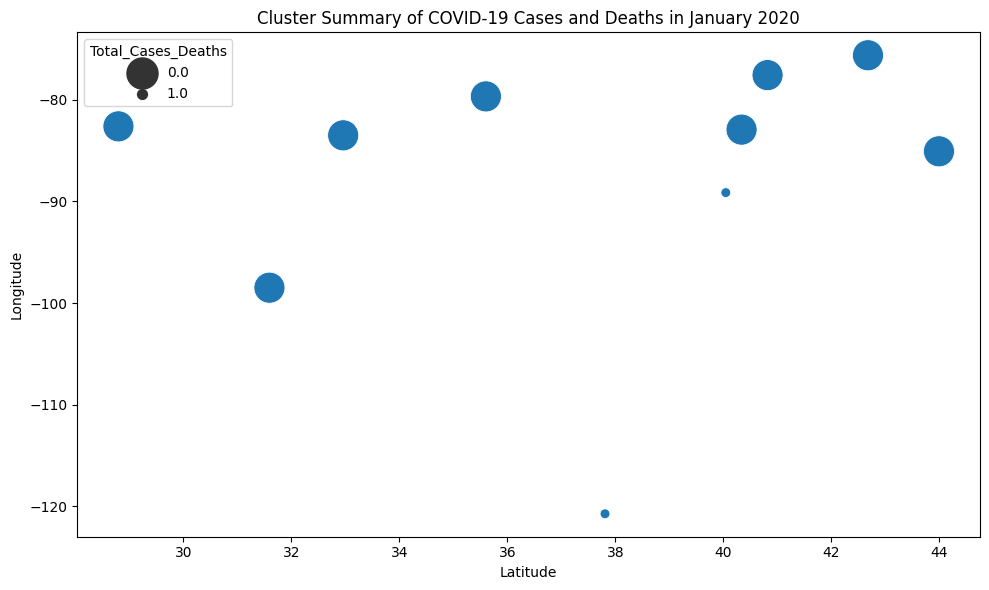

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

Cluster Summary for California in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
1                             0.0              1.0                 1.0
2                             1.5              0.0                 1.5
-----------------------------------------------------------
Cluster Summary for Florida in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning:

Cluster Summary for Georgia in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Illinois in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning:

Cluster Summary for New York in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning:

Cluster Summary for Pennsylvania in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------
Cluster Summary for Texas in 2020-02:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                             0.0              0.0                 0.0
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


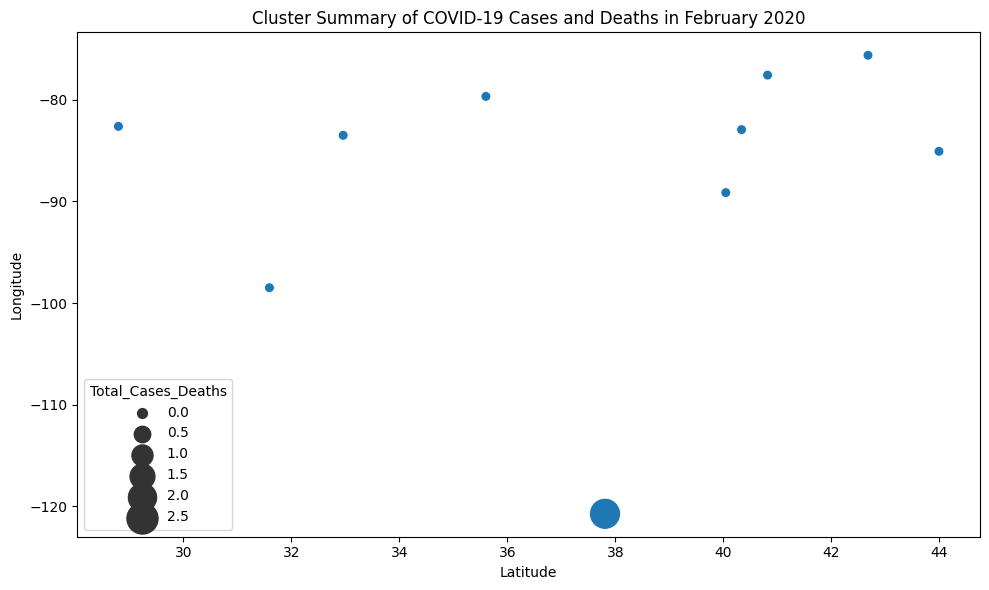

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       51.283019         1.905660           53.188679
1                        2.284436         0.024448            2.308885
2                      368.666667         6.833333          375.500000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.922086         0.000000            1.922086
1                       22.274510         1.372549           23.647059
2                      240.666667         0.888889          241.555556
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.717937         0.011459            0.729396
1                      114.333333         7.666667          122.000000
2                       34.772727         1.863636           36.636364
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.880995         0.015542            0.896536
1                      800.500000        14.500000          815.000000
2                      261.111111         3.666667          264.777778
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.328139         0.026714            1.354853
1                      515.500000        32.000000          547.500000
2                      231.400000         9.000000          240.400000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.850709         0.041949            5.892659
1                      677.319149         7.234043          684.553191
2                     1442.166667        48.500000         1490.666667
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       27.750000              0.0           27.750000
1                        0.318471              0.0            0.318471
2                        7.250000              1.0            8.250000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.464958           0.0000            0.464958
1                        9.160000           1.2000           10.360000
2                       42.562500           0.1875           42.750000
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        1.434577         0.000000            1.434577
1                      142.750000         1.375000          144.125000
2                       24.641026         1.153846           25.794872
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


Cluster Summary for Texas in 2020-03:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        0.378306         0.000000            0.378306
1                       82.923077         1.153846           84.076923
2                       12.888889         1.222222           14.111111
-----------------------------------------------------------


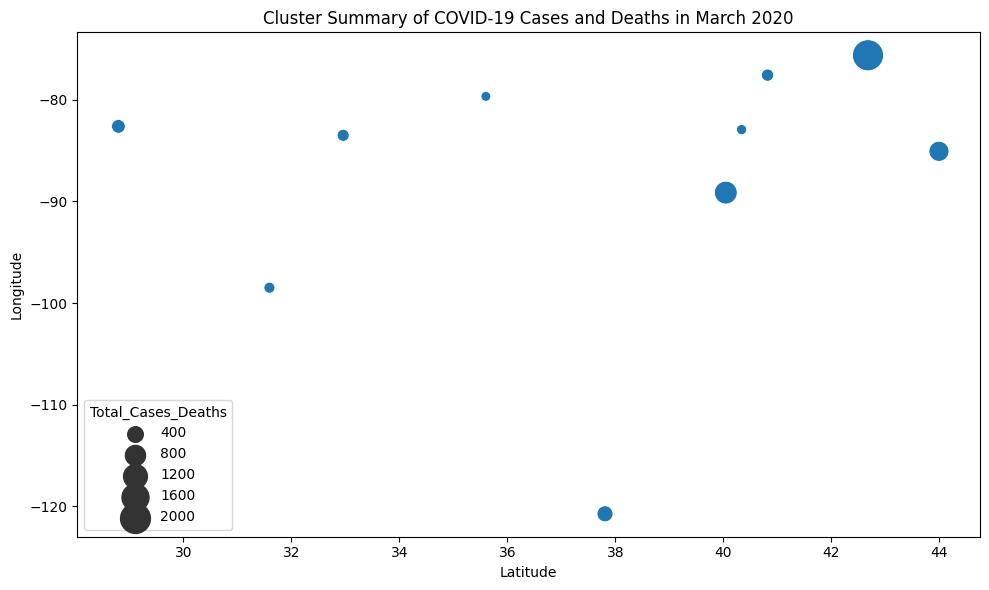

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       12.877502         0.463311           13.340813
1                     1063.444444        55.333333         1118.777778
2                      485.454545        26.454545          511.909091
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      108.250000         7.033333          115.283333
1                        6.863022         0.262285            7.125307
2                      388.818182        13.681818          402.500000
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       71.112903         1.016129           72.129032
1                        3.057656         0.137524            3.195180
2                       47.714286         5.333333           53.047619
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        6.547432         0.318834            6.866266
1                      993.000000        34.555556         1027.555556
2                     1247.272727        82.909091         1330.181818
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.592330         0.342330            4.934659
1                      506.380952        65.666667          572.047619
2                      207.561404        24.210526          231.771930
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       17.976510         1.013423           18.989933
1                      884.034783        51.921739          935.956522
2                     1251.733333       254.533333         1506.266667
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.164337         0.000000            2.164337
1                      104.083333         0.833333          104.916667
2                        7.270042         1.468354            8.738397
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.777964         0.154922            3.932886
1                      641.000000         0.250000          641.250000
2                       46.836735         4.775510           51.612245
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.566646         0.685059           14.251705
1                      254.612903         9.080645          263.693548
2                      193.000000        90.200000          283.200000
-----------------------------------------------------------
Cluster Summary for Texas in 2020-04:
         covid_19_confirmed_cases  covid_19_deaths

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


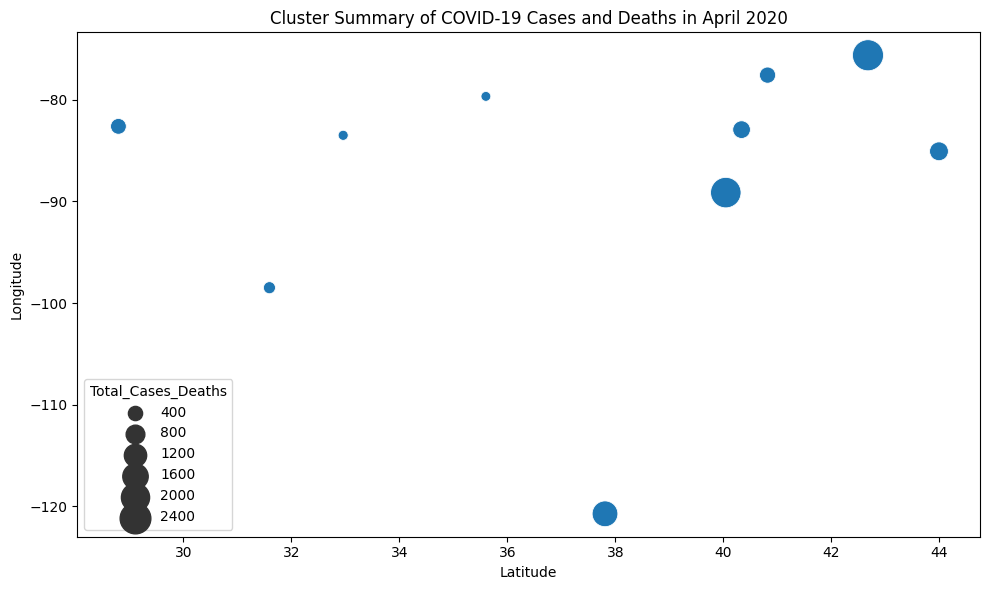

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.015470         0.198020           11.213490
1                     1064.034483        41.896552         1105.931034
2                      150.626374         6.648352          157.274725
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.108546         0.192764            5.301310
1                      191.903226        13.451613          205.354839
2                       58.187970         3.142857           61.330827
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.402240         0.061129            2.463369
1                       26.674419         1.868217           28.542636
2                      100.545455         5.227273          105.772727
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.083781         0.423835           11.507616
1                     1162.000000        42.312500         1204.312500
2                     1521.333333        90.533333         1611.866667
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.563134         0.249309            2.812442
1                       75.923077         7.012821           82.935897
2                      115.866667        38.066667          153.933333
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       10.282398         0.715667           10.998066
1                      440.833333        87.500000          528.333333
2                      200.801802        21.090090          221.891892
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.033141         0.076301            5.109441
1                      161.000000         1.285714          162.285714
2                       17.227273         2.965909           20.193182
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.611957         0.203804            3.815761
1                       77.324324         2.567568           79.891892
2                       62.974359        10.102564           73.076923
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Pennsylvania in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.006143         0.651720            7.657862
1                      117.490385        14.759615          132.250000
2                      284.250000       126.250000          410.500000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


Cluster Summary for Texas in 2020-05:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.926635         0.050416            2.977051
1                      232.640625         3.390625          236.031250
2                       59.240000         4.720000           63.960000
-----------------------------------------------------------


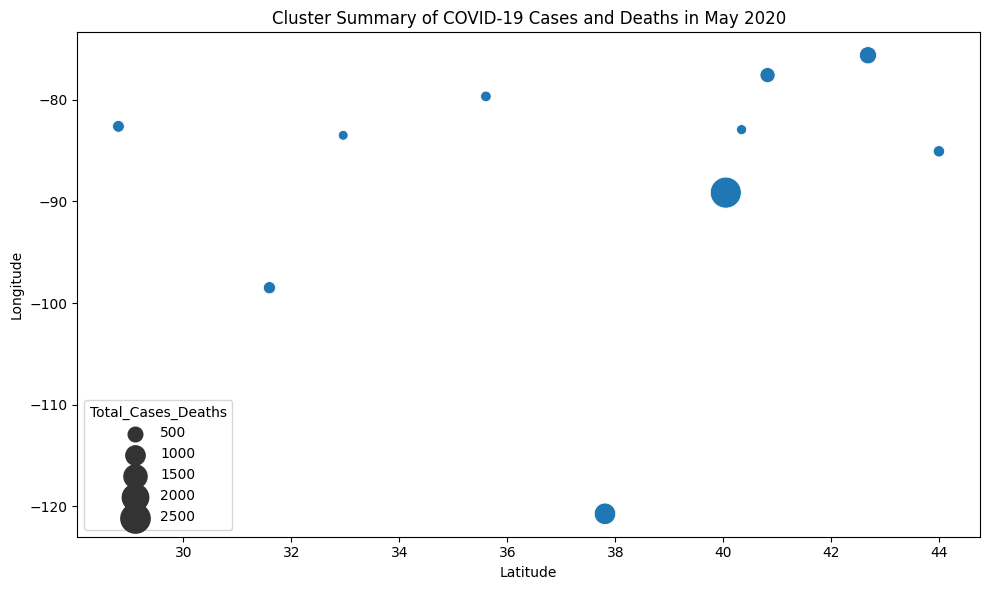

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       25.223575         0.259449           25.483024
1                     1730.500000        36.961538         1767.461538
2                      356.526882         5.838710          362.365591
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       23.965736         0.217640           24.183376
1                      627.576923        13.423077          641.000000
2                      365.981481         3.203704          369.185185
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      139.451613         1.000000          140.451613
1                       26.086957         3.376812           29.463768
2                        5.542453         0.076887            5.619340
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.546296         0.272685            4.818981
1                      490.583333        49.583333          540.166667
2                      373.555556        18.222222          391.777778
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.502742         0.243601            4.746344
1                     2421.000000        42.000000         2463.000000
2                      452.000000       121.000000          573.000000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.588753         0.235772            3.824526
1                       66.000000       448.000000          514.000000
2                       69.776224         5.510490           75.286713
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        9.822471         0.066773            9.889244
1                      227.972973         1.027027          229.000000
2                       36.791667         3.333333           40.125000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.485319         0.135734            3.621053
1                      102.175439         1.684211          103.859649
2                       75.642857         8.500000           84.142857
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.203766         0.160054            3.363820
1                       41.250000         2.860465           44.110465
2                      104.238095        14.666667          118.904762
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


Cluster Summary for Texas in 2020-06:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.724901         0.038656            7.763558
1                      255.801418         2.432624          258.234043
2                      824.650000         8.200000          832.850000
-----------------------------------------------------------


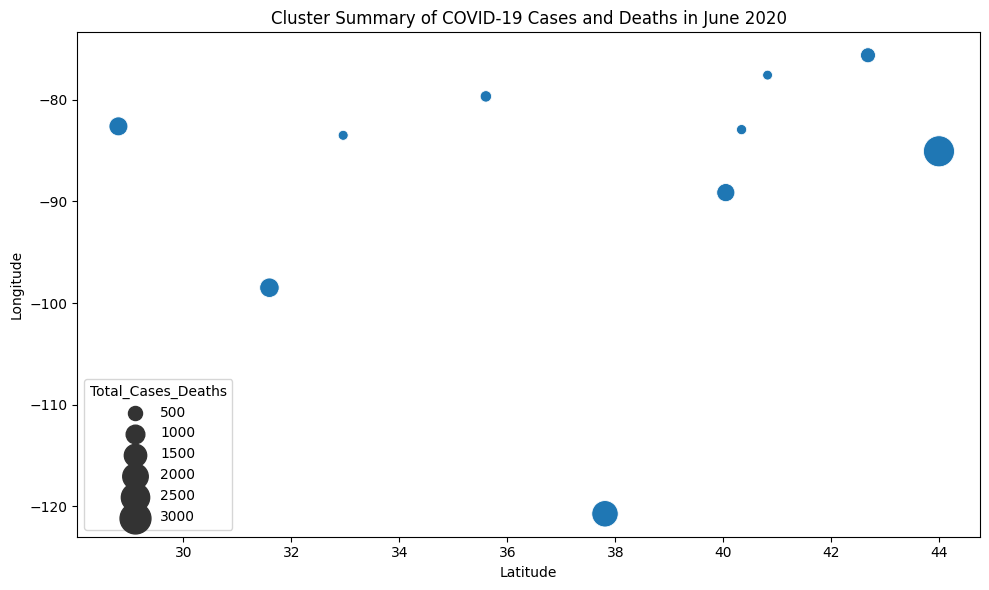

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       62.710280         0.573832           63.284112
1                     3226.450000        57.300000         3283.750000
2                      939.576577         9.666667          949.243243
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       86.139913         0.644597           86.784510
1                     2475.250000        21.750000         2497.000000
2                      621.569231        10.800000          632.369231
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.692452         0.117206           13.809658
1                      188.676471         5.735294          194.411765
2                      163.330709         0.755906          164.086614
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.507389         0.104344            8.611733
1                      523.187500        16.187500          539.375000
2                      470.428571         4.428571          474.857143
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       93.715909         0.670455           94.386364
1                        4.109310         0.043075            4.152385
2                      138.312500         5.937500          144.250000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        2.832877         0.050000            2.882877
1                       48.655738         0.524590           49.180328
2                       82.225806         5.322581           87.548387
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       59.171717         3.131313           62.303030
1                       14.640031         0.078339           14.718371
2                      271.444444         1.177778          272.622222
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.138678         0.115926            8.254605
1                      173.785714         6.285714          180.071429
2                      177.538462         0.938462          178.476923
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', dat

Cluster Summary for Pennsylvania in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.515419         0.084959            7.600378
1                      176.434783         1.065217          177.500000
2                       38.356436         3.128713           41.485149
-----------------------------------------------------------
Cluster Summary for Texas in 2020-07:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       24.104741         0.348116           24.452857
1                     1236.000000       464.000000         1700.000000
2                      997.864000        13.000000         1010.864000
-----------------------------------------------------------


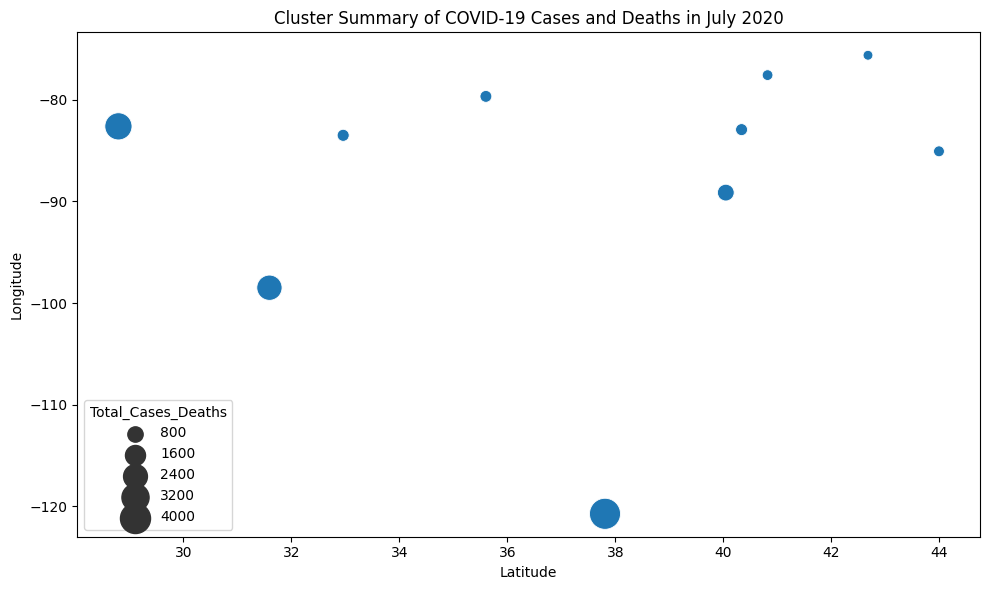

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       49.835696         0.605026           50.440722
1                     1817.440000        49.840000         1867.280000
2                      554.716981        10.100629          564.817610
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Florida in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       47.783833         1.089406           48.873239
1                      321.044248        15.327434          336.371681
2                     1519.285714        32.047619         1551.333333
-----------------------------------------------------------
Cluster Summary for Georgia in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       52.318182         2.417355           54.735537
1                      251.550000         4.850000          256.400000
2                       12.505964         0.156064           12.662028
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       40.543210         1.419753           41.962963
1                       11.212563         0.000000           11.212563
2                      686.100000         5.733333          691.833333
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        4.451954         0.061149            4.513103
1                      117.527027         1.135135          118.662162
2                      177.071429         5.857143          182.928571
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       54.615385         2.923077           57.538462
1                        2.850000         0.033108            2.883108
2                       49.190476         0.297619           49.488095
-----------------------------------------------------------
Cluster Summary for North Carolina in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       11.411189         0.144757           11.555947
1                      129.961538         1.025641          130.987179
2                       57.222222         4.634921           61.857143
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.027793         0.119511            7.147304
1                       93.141667         1.225000           94.366667
2                       92.705882         5.500000           98.205882
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', dat

Cluster Summary for Pennsylvania in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       46.296651         0.813397           47.110048
1                        5.160403         0.059732            5.220134
2                       91.648649         4.972973           96.621622
-----------------------------------------------------------
Cluster Summary for Texas in 2020-08:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       13.454112         0.388716           13.842828
1                     1247.270270        34.972973         1282.243243
2                      376.016949        13.090395          389.107345
-----------------------------------------------------------


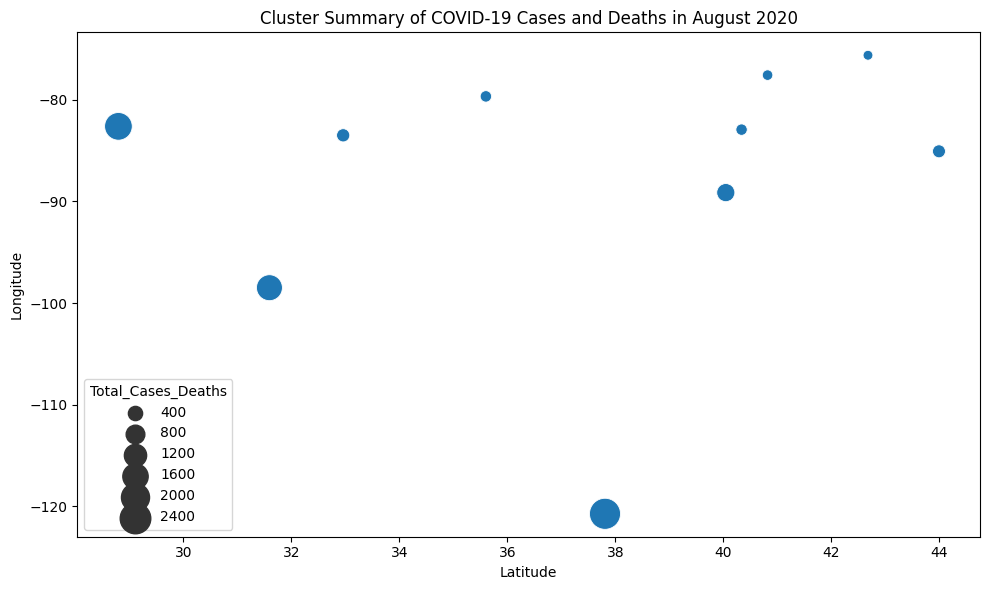

C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for California in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      260.381818         8.700000          269.081818
1                       24.782216         0.365979           25.148196
2                     1120.100000        44.900000         1165.000000
-----------------------------------------------------------
Cluster Summary for Florida in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       41.377086         1.309232           42.686318
1                      488.333333        34.750000          523.083333
2                     2149.000000       100.000000         2249.000000
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Georgia in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.538241         0.162524            8.700765
1                       96.461538         0.826923           97.288462
2                       33.267442         3.000000           36.267442
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Illinois in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       12.221203         0.000000           12.221203
1                      685.363636         7.181818          692.545455
2                       53.721591         1.375000           55.096591
-----------------------------------------------------------
Cluster Summary for Michigan in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                      125.531915         2.127660          127.659574
1                      245.000000        32.000000          277.000000
2                        5.420536         0.048214            5.468750
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for New York in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        3.561828         0.000000            3.561828
1                       33.958333         1.375000           35.333333
2                       59.194444         0.013889           59.208333
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for North Carolina in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        8.656072         0.094540            8.750611
1                       34.290698         3.104651           37.395349
2                       78.164557         0.341772           78.506329
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters


Cluster Summary for Ohio in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        7.785489         0.170347            7.955836
1                      163.857143         1.228571          165.085714
2                       67.636364         6.181818           73.818182
-----------------------------------------------------------
Cluster Summary for Pennsylvania in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                        5.548217         0.060766            5.608983
1                       66.615385         0.395604           67.010989
2                       42.791667         2.812500           45.604167
-----------------------------------------------------------


C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['cluster'] = clusters
C:\Users\sugan\AppData\Local\Temp\ipykernel_20568\1618579918.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')


Cluster Summary for Texas in 2020-09:
         covid_19_confirmed_cases  covid_19_deaths  total_cases_deaths
cluster                                                               
0                       10.194454         0.260220           10.454675
1                      162.626263         8.161616          170.787879
2                     1000.375000        19.437500         1019.812500
-----------------------------------------------------------


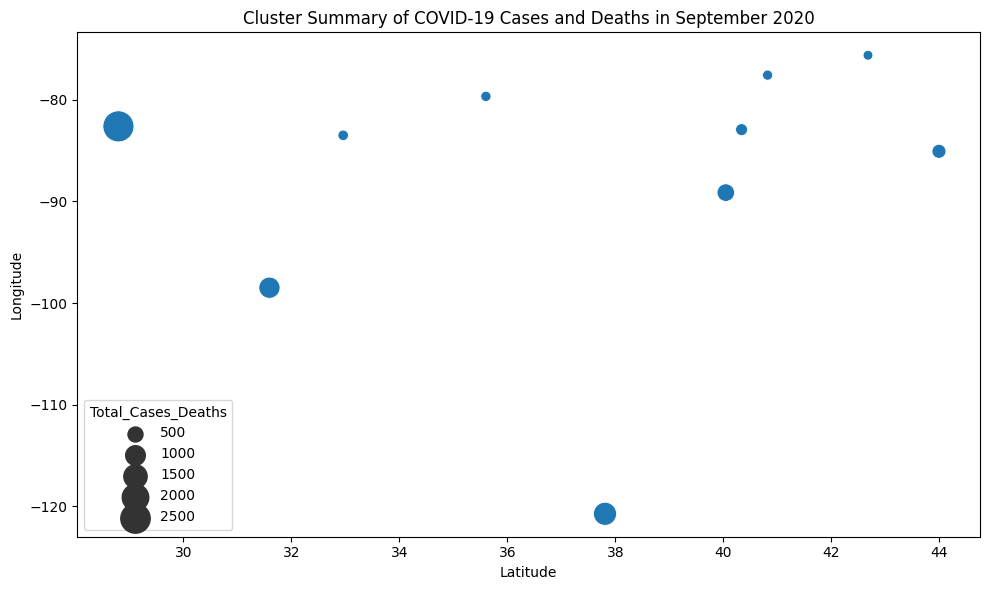

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded and preprocessed your dataset into 'df'

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Top 10 populated states
top_states = {
    6: 'California',
    12: 'Florida',
    13: 'Georgia',
    17: 'Illinois',
    26: 'Michigan',
    36: 'New York',
    37: 'North Carolina',
    39: 'Ohio',
    42: 'Pennsylvania',
    48: 'Texas'
}

# Selected features for clustering
selected_features_iforest = ['covid_19_confirmed_cases', 'covid_19_deaths']

for month_year in df['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = df[df['month_year'] == month_year]
    
    cluster_summary_data = []
    
    for state_fips, state_name in top_states.items():
        # Filter data for the current state
        df_state = df_month[df_month['state_fips'] == state_fips]
        
        if df_state.empty:
            print(f"No data available for {state_name} in {month_year}.")
            continue
        
        # Create the dataset with selected features
        X_selected = df_state[selected_features_iforest]

        # Scaling the Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # K-means Clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)

        # Analyzing Clusters
        df_state['cluster'] = clusters
        cluster_summary = df_state.groupby('cluster')[selected_features_iforest].mean()

        # Identifying Clusters with High COVID-19 Cases or Deaths
        cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary['covid_19_deaths']
        outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
        outbreak_cluster = outbreak_cluster.reset_index()

        cluster_summary_data.append({
            'Latitude': df_state['latitude'].mean(),
            'Longitude': df_state['longitude'].mean(),
            'Total_Cases_Deaths': cluster_summary['total_cases_deaths'].sum()
        })

        print(f"Cluster Summary for {state_name} in {month_year}:")
        print(cluster_summary)
        print("-----------------------------------------------------------")

    # Creating DataFrame for cluster summary
    cluster_summary_df = pd.DataFrame(cluster_summary_data)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Latitude', y='Longitude', size='Total_Cases_Deaths', data=cluster_summary_df, palette='viridis', sizes=(50, 500), legend='brief')
    plt.title(f'Cluster Summary of COVID-19 Cases and Deaths in {month_year.strftime("%B %Y")}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.tight_layout()
    
    # Save or show the plot
    plt.savefig(f'cluster_plot_{month_year}.png')
    plt.show()


## DBSCAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have already loaded and preprocessed your dataset into 'df'

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month_year'] = df['date'].dt.to_period('M')

# Top 10 populated states
top_states = {
    6: 'California',
    12: 'Florida',
    13: 'Georgia',
    17: 'Illinois',
    26: 'Michigan',
    36: 'New York',
    37: 'North Carolina',
    39: 'Ohio',
    42: 'Pennsylvania',
    48: 'Texas'
}

for month_year in df['month_year'].sort_values().unique():
    # Filter the data for the current month
    df_month = df[df['month_year'] == month_year]
    
    # Check if all selected features are present in the current month's data
    missing_features = [feat for feat in selected_features_iforest if feat not in df_month.columns]
    
    if missing_features:
        print(f"Skipping month {month_year}: Missing features - {missing_features}")
        continue
    
    for state_fips, state_name in top_states.items():
        # Filter data for the current state
        df_state = df_month[df_month['state_fips'] == state_fips]
        
        if df_state.empty:
            print(f"No data available for {state_name} in {month_year}.")
            continue
        
        # Create the dataset with selected features
        X_selected = df_state[selected_features_iforest]

        # Scaling the Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_selected)

        # DBSCAN Clustering
        dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
        clusters = dbscan.fit_predict(X_scaled)

        # Analyzing Clusters
        df_state['cluster'] = clusters
        cluster_summary = df_state.groupby('cluster')[selected_features_iforest].mean()

        # Calculating Silhouette Score
        silhouette_avg = silhouette_score(X_scaled, clusters)
        print(f"Silhouette Score for {state_name} in {month_year}: {silhouette_avg}")

        # Identifying Clusters with High COVID-19 Cases or Deaths
        cluster_summary['total_cases_deaths'] = cluster_summary['covid_19_confirmed_cases'] + cluster_summary.get('covid_19_deaths', 0)
        outbreak_cluster = cluster_summary[cluster_summary['total_cases_deaths'] == cluster_summary['total_cases_deaths'].max()]
        outbreak_cluster = outbreak_cluster.reset_index()

        print(f"Cluster Summary for {state_name} in {month_year}:")
        print(cluster_summary)
        print("-----------------------------------------------------------")

        # Plotting the clusters on a map
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df_state, palette='viridis', legend='full')

        # Plot the outbreak cluster from the original DataFrame
        outbreak_cluster_indices = df_state[df_state['cluster'] == outbreak_cluster.index[0]].index
        outbreak_cluster_data = df_state.loc[outbreak_cluster_indices]
        plt.scatter(outbreak_cluster_data['longitude'], outbreak_cluster_data['latitude'], color='red', marker='*', s=200, label='Outbreak Cluster')

        # Adding labels and title
        plt.title(f'DBSCAN Clustering of COVID-19 Data for {state_name} in {month_year.strftime("%B %Y")} with Outbreak Cluster')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        
        # Save or show the plot
        plt.savefig(f'dbscan_cluster_plot_{state_name}_{month_year}.png')
        plt.show()
